In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
## Importing from statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
## datetime
from datetime import datetime

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_excel('Time_series_data_updated.xlsx')
df.head()

DATE    Vol        Val
0  June 1, 2020  476.97  10413.11
1  June 2, 2020  476.78   9951.30
2  June 3, 2020  456.26   9622.38
3  June 4, 2020  463.05   9639.50
4  June 5, 2020  464.79   9539.52

In [9]:
df.tail()

DATE     Vol        Val
1159  August 04, 2023  3447.93  57716.61
1160  August 05, 2023  3562.42  57820.12
1161  August 06, 2023  2988.15  36438.50
1162  August 07, 2023  3591.07  63298.71
1163  August 08, 2023  3492.43  55950.61

In [27]:
Df_copy = df.copy()

In [28]:
df1 = Df_copy[30:1125]

In [29]:
df1.head()

DATE    Vol        Val
30  July 1, 2020  515.18  11611.71
31  July 2, 2020  481.96  10494.44
32  July 3, 2020  507.41  10735.45
33  July 4, 2020  498.77  10114.58
34  July 5, 2020  432.52   7115.05

In [30]:
df1.rename(columns={'Vol ': 'Vol'}, inplace=True)

In [31]:
df1['Vol']= df1['Vol']/100

In [32]:
df1

DATE      Vol       Val
30     July 1, 2020   5.1518  11611.71
31     July 2, 2020   4.8196  10494.44
32     July 3, 2020   5.0741  10735.45
33     July 4, 2020   4.9877  10114.58
34     July 5, 2020   4.3252   7115.05
...             ...      ...       ...
1120  June 26, 2023  30.2221  48619.69
1121  June 27, 2023  29.9957  47516.37
1122  June 28, 2023  31.3701  49897.31
1123  June 29, 2023  28.0597  37961.22
1124  June 30, 2023  31.2903  57747.14

[1095 rows x 3 columns]

In [39]:
df_copy = df1.copy()


In [40]:
df_copy

DATE      Vol       Val
30     July 1, 2020   5.1518  11611.71
31     July 2, 2020   4.8196  10494.44
32     July 3, 2020   5.0741  10735.45
33     July 4, 2020   4.9877  10114.58
34     July 5, 2020   4.3252   7115.05
...             ...      ...       ...
1120  June 26, 2023  30.2221  48619.69
1121  June 27, 2023  29.9957  47516.37
1122  June 28, 2023  31.3701  49897.31
1123  June 29, 2023  28.0597  37961.22
1124  June 30, 2023  31.2903  57747.14

[1095 rows x 3 columns]

In [41]:
df_copy.DATE = pd.to_datetime(df_copy.DATE,dayfirst=True)

In [42]:
df_copy.set_index('DATE',inplace = True)


In [43]:
df_copy

Vol       Val
DATE                         
2020-07-01   5.1518  11611.71
2020-07-02   4.8196  10494.44
2020-07-03   5.0741  10735.45
2020-07-04   4.9877  10114.58
2020-07-05   4.3252   7115.05
...             ...       ...
2023-06-26  30.2221  48619.69
2023-06-27  29.9957  47516.37
2023-06-28  31.3701  49897.31
2023-06-29  28.0597  37961.22
2023-06-30  31.2903  57747.14

[1095 rows x 2 columns]

In [44]:
### 

In [45]:
df_copy2 = df_copy.copy()

In [46]:
def create_features(df_copy2):
    """
    Create time Series features based on the time series index
    
    """
    df_copy2['dayofweek'] = df_copy2.index.dayofweek
    df_copy2['dayofmonth']= df_copy2.index.day
    df_copy2['month']     = df_copy2.index.month
    df_copy2['quarter']   = df_copy2.index.quarter
    df_copy2['year']      = df_copy2.index.year
    return df_copy2

df_copy2 = create_features(df_copy2)

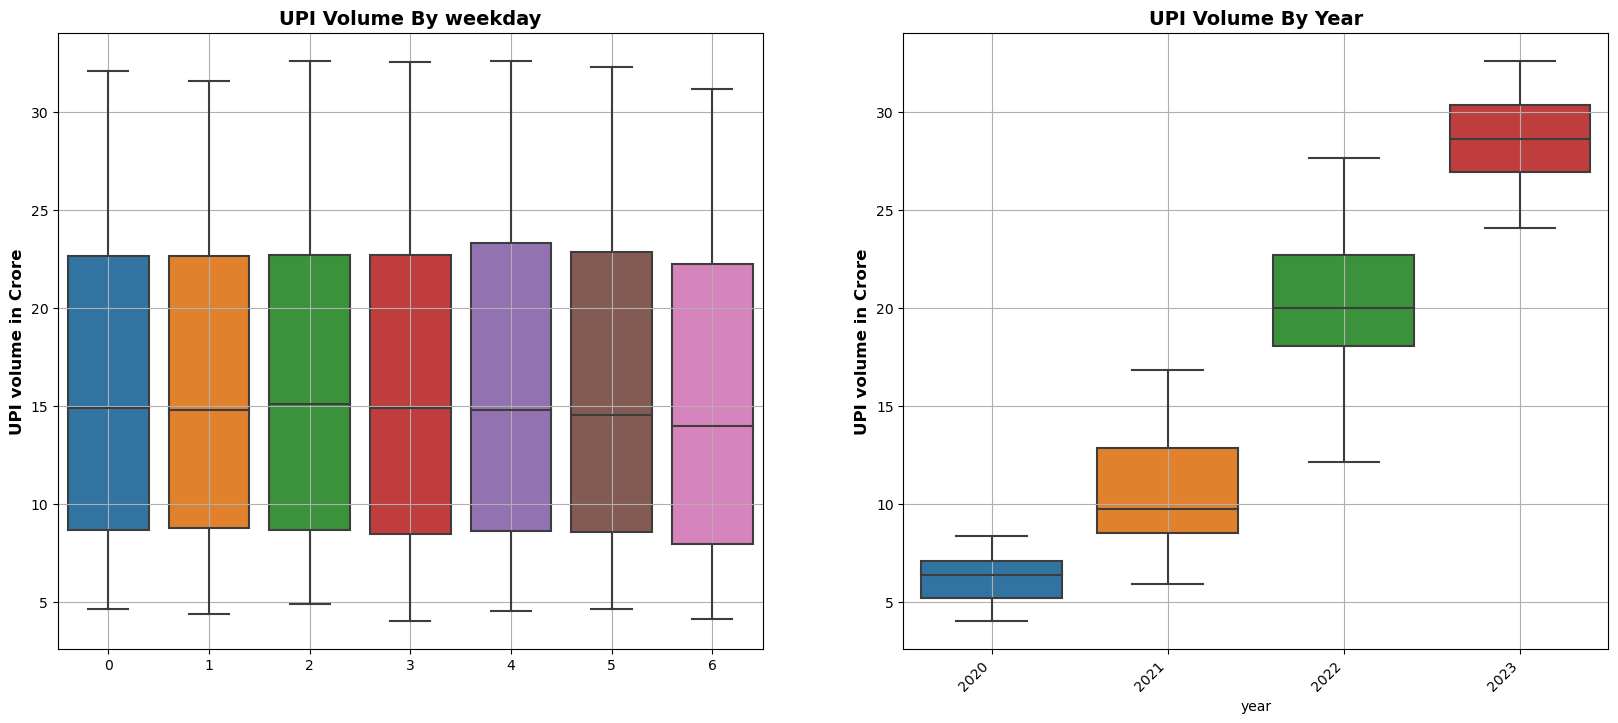

In [52]:
## Visulization
fig = plt.figure(figsize = (20,8))

##1
ax = fig.add_subplot(1, 2, 1)
sns.boxplot(data = df_copy2,x='dayofweek',y= 'Vol')
ax.set_title('UPI Volume By weekday',fontsize = 14,fontweight = 'bold')
plt.xlabel('')
plt.ylabel('UPI volume in Crore',fontsize = 12,fontweight = 'bold')
plt.grid()
# ##2
# ax = fig.add_subplot(2, 2, 2)
# sns.boxplot(data = df_copy2,x='quarter',y= 'Vol' )
# ax.set_title('UPI Volume By Quarter',fontsize = 14)
# plt.xlabel('')
# plt.ylabel('UPI volume in Crore',fontsize = 12)
# plt.grid()
##3
# ax = fig.add_subplot(2, 2, 3)
# sns.boxplot(data = df_copy2,x='month',y= 'Vol' )
# ax.set_title('UPI Volume By Month',fontsize = 14)
# plt.ylabel('UPI volume in Crore',fontsize = 12)
# plt.grid()

##4
ax = fig.add_subplot(1, 2, 2)
sns.boxplot(data = df_copy2,x='year',y= 'Vol' )
ax.set_title('UPI Volume By Year',fontsize = 14,fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('UPI volume in Crore',fontsize = 12,fontweight = 'bold')
plt.grid()
plt.show()

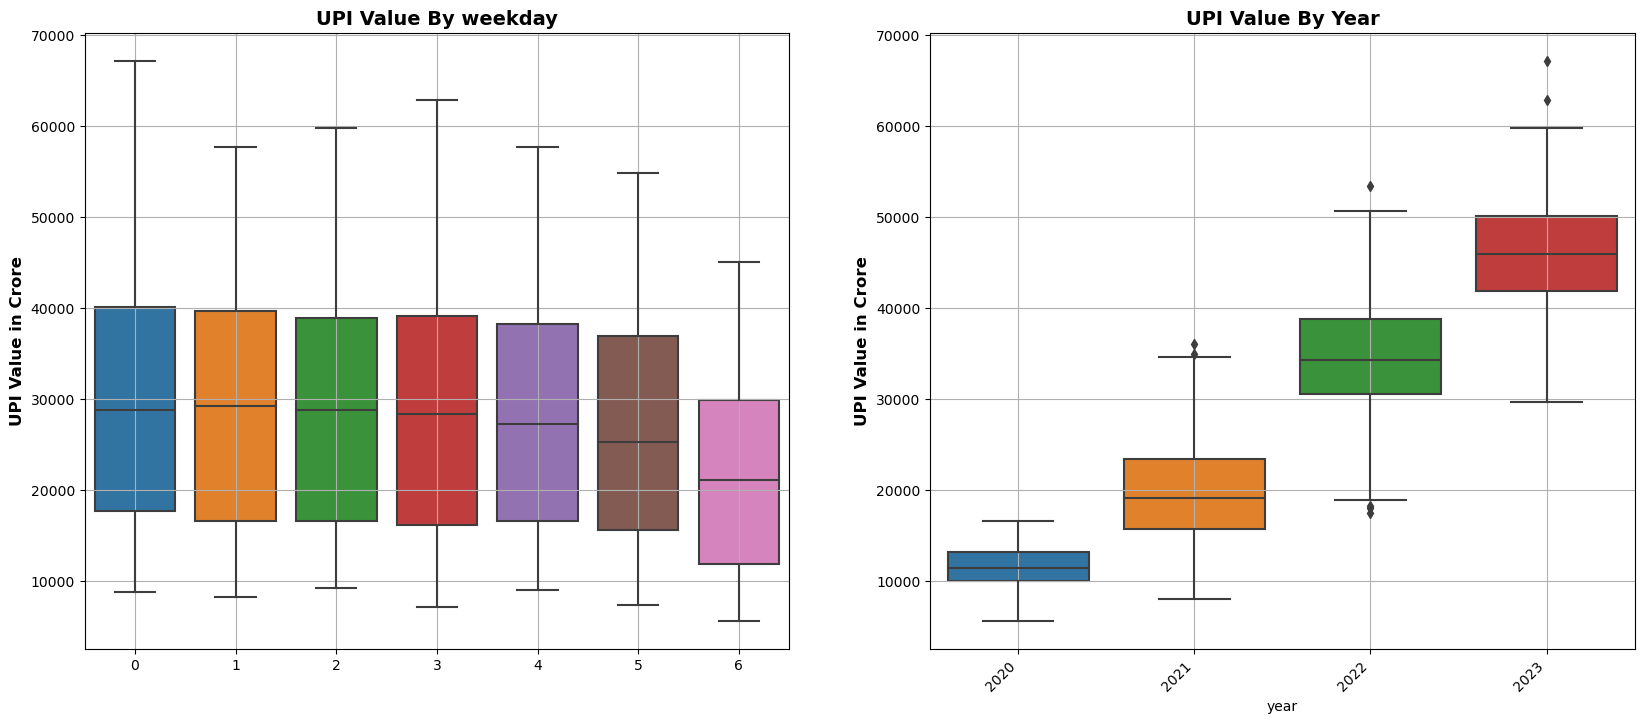

In [53]:
## Visulization
fig = plt.figure(figsize = (20,8))

##1
ax = fig.add_subplot(1, 2, 1)
sns.boxplot(data = df_copy2,x='dayofweek',y= 'Val')
ax.set_title('UPI Value By weekday',fontsize = 14,fontweight = 'bold')
plt.xlabel('')
plt.ylabel('UPI Value in Crore',fontsize = 12,fontweight = 'bold')
plt.grid()
# ##2
# ax = fig.add_subplot(2, 2, 2)
# sns.boxplot(data = df_copy2,x='quarter',y= 'Vol' )
# ax.set_title('UPI Volume By Quarter',fontsize = 14)
# plt.xlabel('')
# plt.ylabel('UPI volume in Crore',fontsize = 12)
# plt.grid()
##3
# ax = fig.add_subplot(2, 2, 3)
# sns.boxplot(data = df_copy2,x='month',y= 'Vol' )
# ax.set_title('UPI Volume By Month',fontsize = 14)
# plt.ylabel('UPI volume in Crore',fontsize = 12)
# plt.grid()

##4
ax = fig.add_subplot(1, 2, 2)
sns.boxplot(data = df_copy2,x='year',y= 'Val' )
ax.set_title('UPI Value By Year',fontsize = 14,fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('UPI Value in Crore',fontsize = 12,fontweight = 'bold')
plt.grid()
plt.show()

In [54]:
### Test and train split

In [55]:
size = int(len(df_copy)*0.8)
df_train = df_copy.iloc[:size]
df_test = df_copy.iloc[size:]

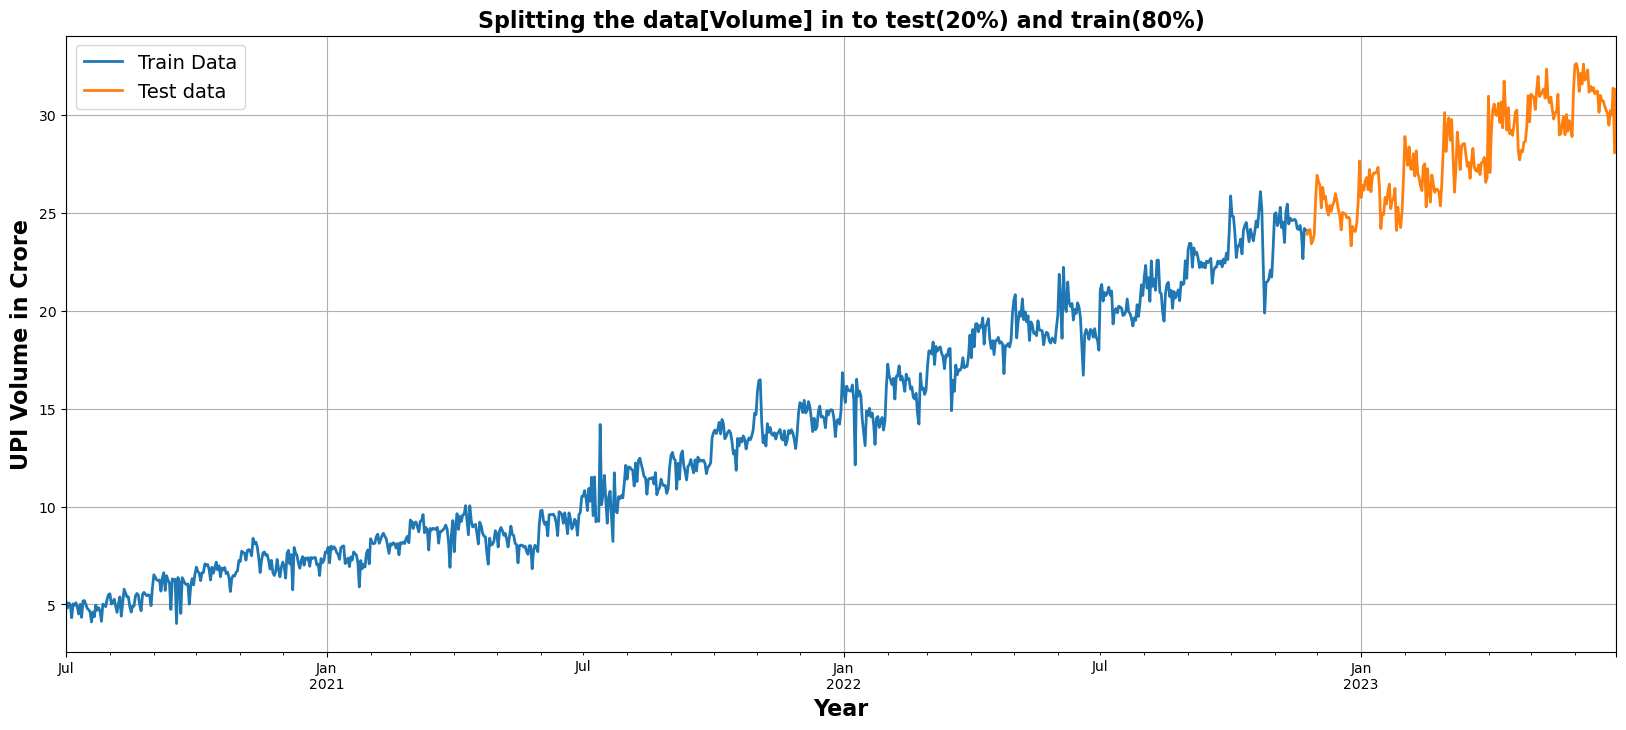

In [63]:

## Visulaization
fig,ax= plt.subplots(figsize=(20,8))
df_train['Vol'].plot(kind='line',ax =ax,linewidth = 2)
# ## 
df_test['Vol'].plot(kind='line',linewidth=2,ax=ax)

plt.xlabel('Year',fontsize=16,fontweight = 'bold')
plt.ylabel("UPI Volume in Crore",fontsize=16,fontweight = 'bold')
plt.legend(['Train Data','Test data'],loc='upper left',fontsize=14)
#plt.ylim(35,80)
plt.title('Splitting the data[Volume] in to test(20%) and train(80%)',fontsize=16,fontweight = 'bold')
plt.grid()
plt.show()

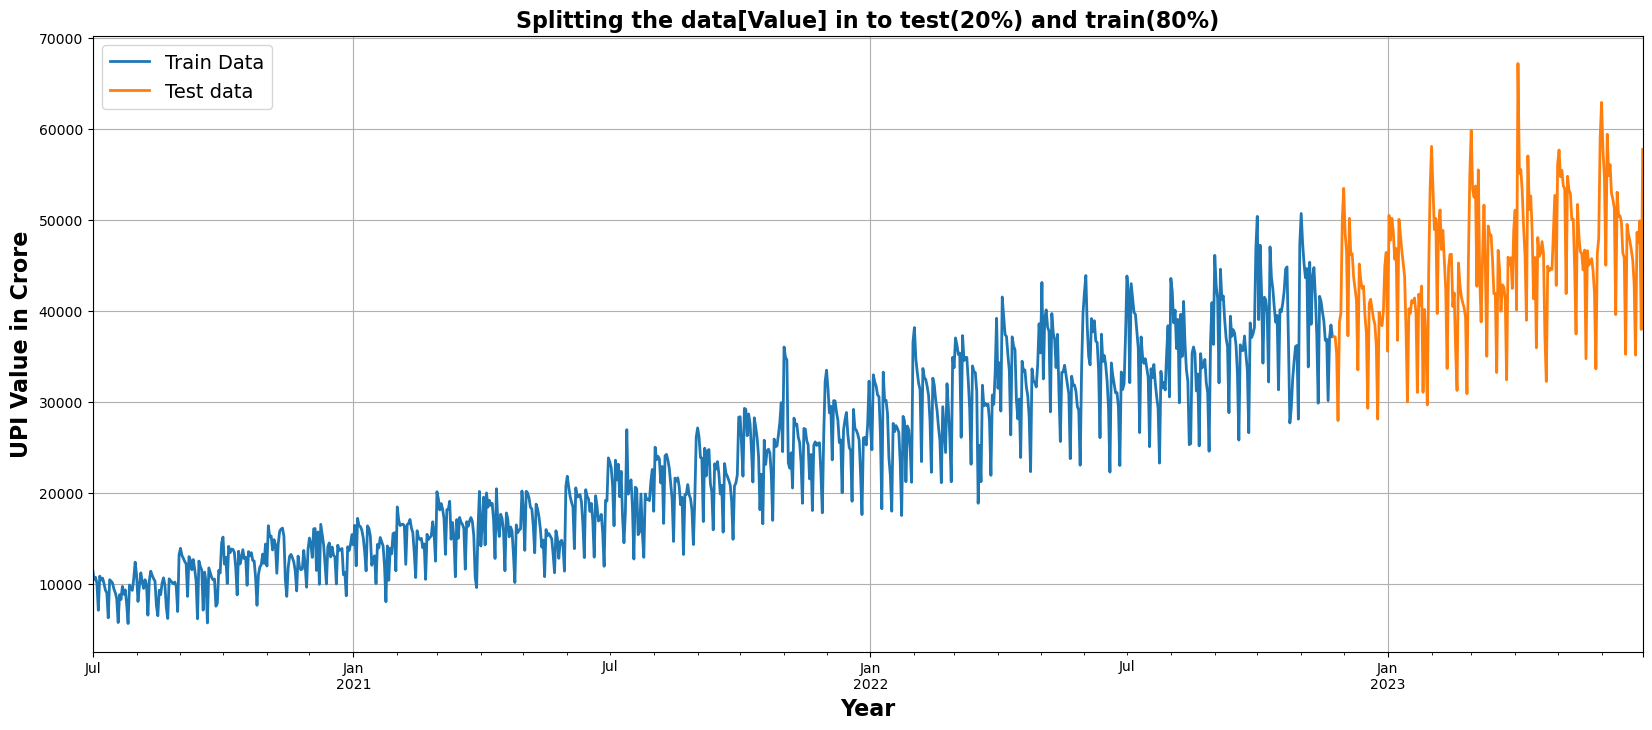

In [62]:
## Visulaization
fig,ax= plt.subplots(figsize=(20,8))
df_train['Val'].plot(kind='line',ax =ax,linewidth = 2)
# ## 
df_test['Val'].plot(kind='line',linewidth=2,ax=ax)

plt.xlabel('Year',fontsize=16,fontweight = 'bold')
plt.ylabel("UPI Value in Crore",fontsize=16,fontweight = 'bold')
plt.legend(['Train Data','Test data'],loc='upper left',fontsize=14)
#plt.ylim(35,80)
plt.title('Splitting the data[Value] in to test(20%) and train(80%)',fontsize=16,fontweight = 'bold')
plt.grid()
plt.show()

In [64]:
df_test.tail()

Vol       Val
DATE                         
2023-06-26  30.2221  48619.69
2023-06-27  29.9957  47516.37
2023-06-28  31.3701  49897.31
2023-06-29  28.0597  37961.22
2023-06-30  31.2903  57747.14

### Polynomial fitting

In [65]:
from sklearn.linear_model import LinearRegression


In [126]:
df_cop = df1.copy()

In [127]:
data = {'date': df_cop['DATE'],
        'Value': df_cop['Val']}


df_copy_Val = pd.DataFrame(data)

In [128]:
df_copy_Val.head()

date     Value
30  July 1, 2020  11611.71
31  July 2, 2020  10494.44
32  July 3, 2020  10735.45
33  July 4, 2020  10114.58
34  July 5, 2020   7115.05

In [129]:
df_copy_Val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 30 to 1124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1095 non-null   object 
 1   Value   1095 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [130]:
df_copy_Val['time'] = np.arange(1,1096,1)
df_copy_Val.head()

date     Value  time
30  July 1, 2020  11611.71     1
31  July 2, 2020  10494.44     2
32  July 3, 2020  10735.45     3
33  July 4, 2020  10114.58     4
34  July 5, 2020   7115.05     5

In [131]:
#df_copy_Vol['mont_name'] = df_copy_Vol['date'] .dt.month_name()

In [132]:
## Splitting the Data into dependent and independent 
size = int(len(df_copy_Val)*0.8)
df_train_val = df_copy_Val.iloc[:size]
df_test_val = df_copy_Val.iloc[size:]

In [133]:
df_train_val.tail()

date     Value  time
901  November 19, 2022  36893.00   872
902  November 20, 2022  30141.80   873
903  November 21, 2022  37029.58   874
904  November 22, 2022  38450.98   875
905  November 23, 2022  37158.59   876

In [134]:
x_train = df_train_val['time'].values
x_train.shape

(876,)

In [135]:
time_sq = x_train**2

In [136]:
X_train = pd.DataFrame({'time' : x_train, 'time_sq' : time_sq})

In [137]:
x_test = df_test_vol['time'].values

In [138]:
X_test = pd.DataFrame({'time' : x_test, 'time_sq' :  x_test**2})
X_test.shape

(219, 2)

In [139]:
y_train = df_train_val['Value'].values
y_train.shape

(876,)

In [140]:
y_test = df_test_val['Value'].values
y_test.shape

(219,)

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
model_trend = LinearRegression()
model_trend.fit(X_train,y_train)

LinearRegression()

In [143]:
y_fittedvalue = model_trend.predict(X_train)
y_fittedvalue

array([ 8603.35822379,  8629.76660901,  8656.19879665,  8682.6547867 ,
        8709.13457916,  8735.63817404,  8762.16557133,  8788.71677103,
        8815.29177315,  8841.89057768,  8868.51318463,  8895.15959399,
        8921.82980577,  8948.52381995,  8975.24163656,  9001.98325557,
        9028.748677  ,  9055.53790084,  9082.3509271 ,  9109.18775577,
        9136.04838686,  9162.93282035,  9189.84105627,  9216.77309459,
        9243.72893533,  9270.70857848,  9297.71202405,  9324.73927203,
        9351.79032243,  9378.86517524,  9405.96383046,  9433.0862881 ,
        9460.23254815,  9487.40261061,  9514.59647549,  9541.81414278,
        9569.05561248,  9596.3208846 ,  9623.60995914,  9650.92283608,
        9678.25951544,  9705.61999722,  9733.00428141,  9760.41236801,
        9787.84425702,  9815.29994845,  9842.7794423 ,  9870.28273855,
        9897.80983723,  9925.36073831,  9952.93544181,  9980.53394772,
       10008.15625605, 10035.80236679, 10063.47227994, 10091.16599551,
      

In [144]:
y_forecastedvalue = model_trend.predict(X_test)

In [145]:
y_forecastedvalue

array([40859.37876842, 40906.63806813, 40953.92117026, 41001.2280748 ,
       41048.55878175, 41095.91329112, 41143.2916029 , 41190.6937171 ,
       41238.11963371, 41285.56935273, 41333.04287417, 41380.54019802,
       41428.06132429, 41475.60625297, 41523.17498406, 41570.76751757,
       41618.38385349, 41666.02399182, 41713.68793257, 41761.37567573,
       41809.08722131, 41856.8225693 , 41904.5817197 , 41952.36467252,
       42000.17142775, 42048.0019854 , 42095.85634545, 42143.73450793,
       42191.63647281, 42239.56224011, 42287.51180983, 42335.48518195,
       42383.4823565 , 42431.50333345, 42479.54811282, 42527.6166946 ,
       42575.7090788 , 42623.82526541, 42671.96525443, 42720.12904587,
       42768.31663972, 42816.52803599, 42864.76323467, 42913.02223576,
       42961.30503927, 43009.61164519, 43057.94205352, 43106.29626427,
       43154.67427744, 43203.07609301, 43251.501711  , 43299.9511314 ,
       43348.42435422, 43396.92137945, 43445.4422071 , 43493.98683716,
      

In [94]:
### Visulaization

In [146]:
df_train_new = df_train.copy()
df_test_new = df_test.copy()

In [147]:
df_train_new['fitted_vl'] = y_fittedvalue
df_test_new['predicted_vl']=y_forecastedvalue

In [150]:
df_train_new.tail()

Vol       Val     fitted_vl
DATE                                       
2022-11-19  24.3564  36893.00  40623.439306
2022-11-20  23.9196  30141.80  40670.579594
2022-11-21  22.6549  37029.58  40717.743684
2022-11-22  24.2050  38450.98  40764.931576
2022-11-23  24.1147  37158.59  40812.143271

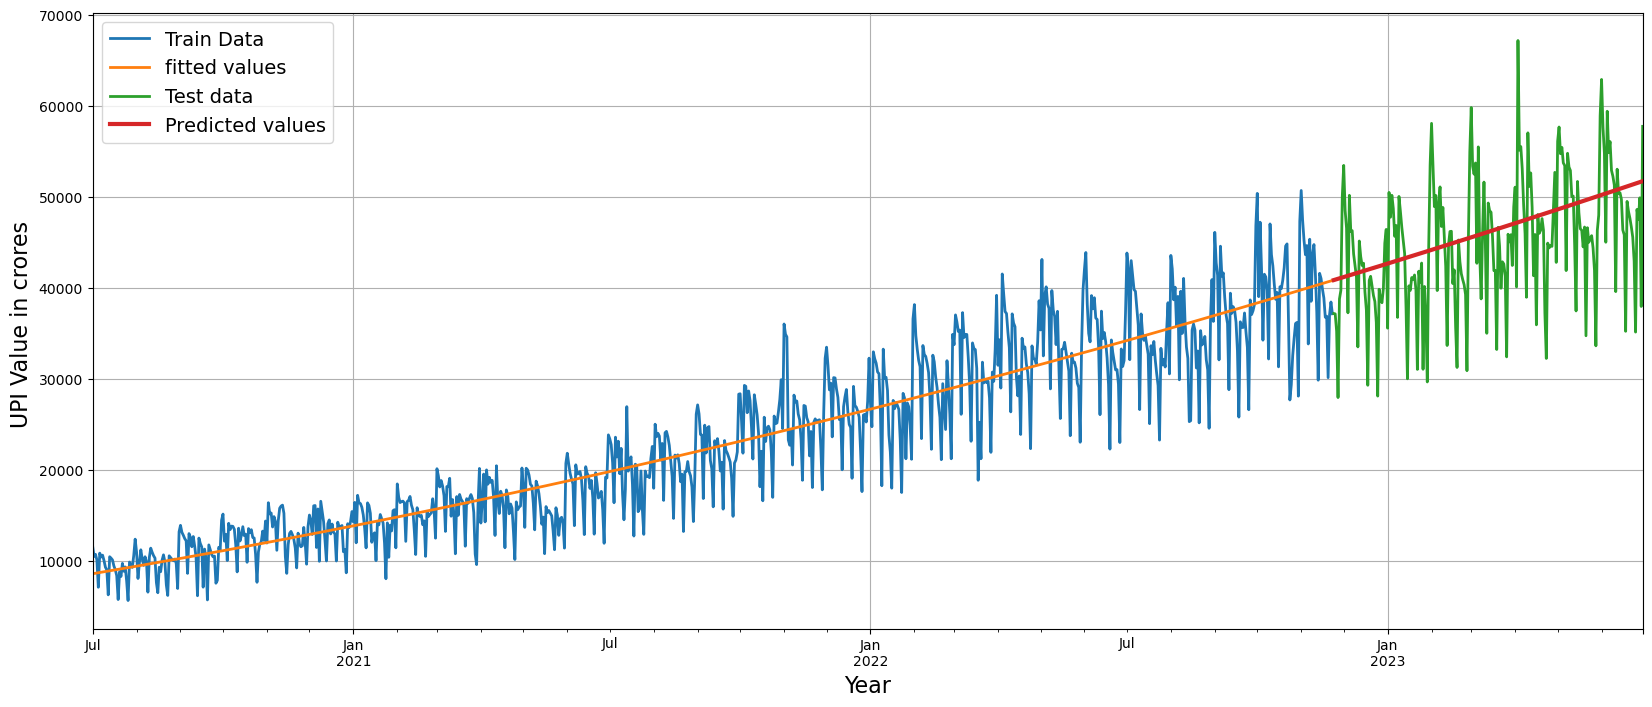

In [149]:
## with ## Confidence Interval
## Visulaization
fig,ax= plt.subplots(figsize=(20,8))
df_train_new['Val'].plot(kind='line',ax =ax,linewidth = 2)
df_train_new['fitted_vl'].plot(kind='line',ax =ax,linewidth = 2)

## 
df_test_new['Val'].plot(kind='line',linewidth=2,ax=ax)
df_test_new['predicted_vl'].plot(kind='line',linewidth=3,ax=ax)



plt.xlabel('Year',fontsize=16)
plt.ylabel("UPI Value in crores ",fontsize=16)
plt.legend(['Train Data','fitted values','Test data','Predicted values'],loc='upper left',fontsize=14)

#plt.title("Visualising  the Results of Triple Exponential Smoothing Method[Trend = Additive,seasonality = Multiplicative] (α = 0.04, β = 0.010 & γ = 0.58 )",fontsize=16)
plt.grid()
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error

In [152]:
rmse = np.sqrt(mean_squared_error(df_test_new['Val'],df_test_new['predicted_vl'])).round(4)

## MAE
mae = np.round(np.mean(np.abs(df_test_new['Val']-df_test_new['predicted_vl'])),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(df_test_new['Val']-df_test_new['predicted_vl'])/df_test_new['Val'])*100,4)


tempResults = pd.DataFrame({'Method': [' Polynomial fitting for Value '], 'RMSE':[rmse],'MAE': mae , 'MAPE': [mape]})
#concatenating it to the existing result dataframe

tempResults

Method       RMSE        MAE     MAPE
0   Polynomial fitting for Value   6602.7598  5223.1367  12.4358

### Arima Fitting

In [153]:
import statsmodels.api as statsmodels
from statsmodels.tsa.arima_model import ARIMA

In [155]:
df_train.tail()

Vol       Val
DATE                         
2022-11-19  24.3564  36893.00
2022-11-20  23.9196  30141.80
2022-11-21  22.6549  37029.58
2022-11-22  24.2050  38450.98
2022-11-23  24.1147  37158.59

In [168]:
df_test_ar.tail()

Vol       Val
DATE                         
2023-06-26  30.2221  48619.69
2023-06-27  29.9957  47516.37
2023-06-28  31.3701  49897.31
2023-06-29  28.0597  37961.22
2023-06-30  31.2903  57747.14

In [158]:
df_train_ar = df_train.copy()
df_test_ar =df_test.copy()

### For UPI Vaolume

In [173]:
diff1 = df_train_ar['Vol'].diff().dropna()

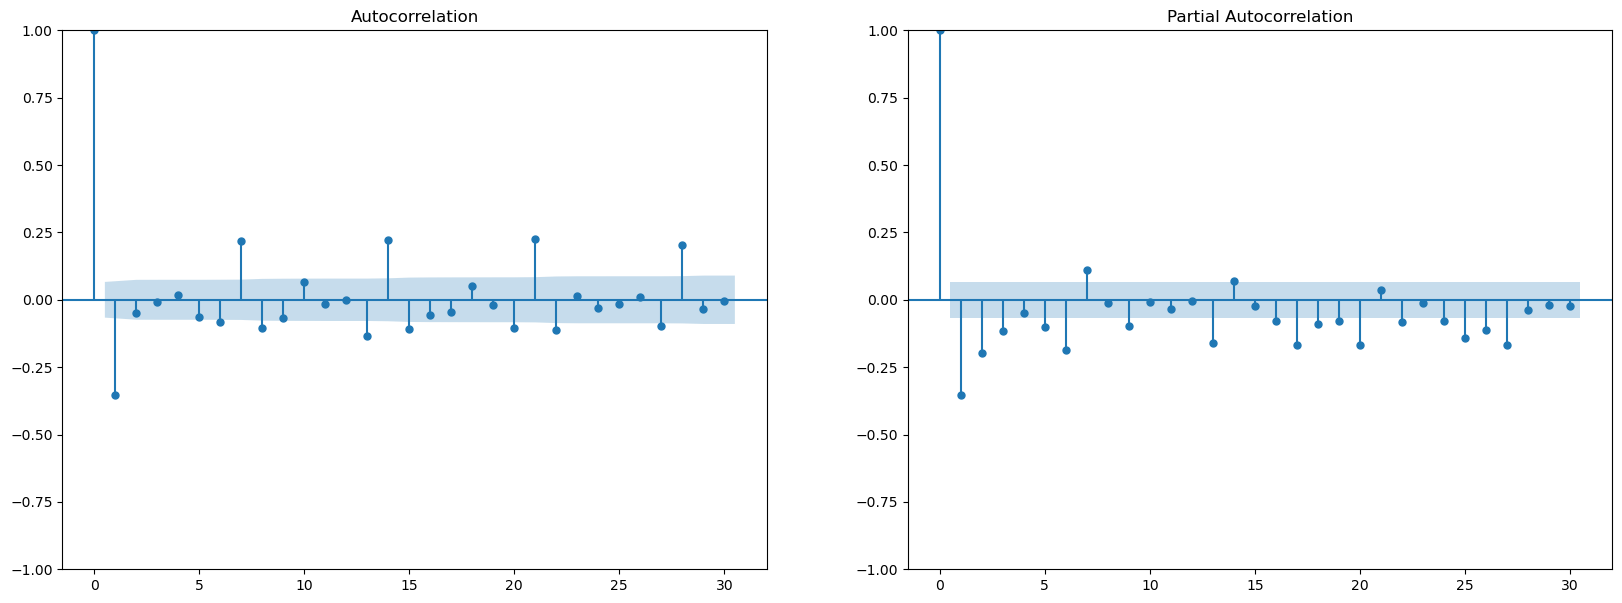

In [174]:
fig,ax = plt.subplots(nrows = 1,ncols = 2 ,figsize =(20,7))
fig = plot_acf(diff1, ax=ax[0])
fig = plot_pacf(diff1,ax= ax[1])

In [175]:
## ARIMA(3,1,1)
model_arima_vol = statsmodels.tsa.arima.ARIMA(diff1, order=(3,0, 1)).fit()
print(model_arima_vol.summary())

                               SARIMAX Results                                
Dep. Variable:                    Vol   No. Observations:                  875
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -905.108
Date:                Mon, 14 Aug 2023   AIC                           1822.216
Time:                        18:07:09   BIC                           1850.861
Sample:                    07-02-2020   HQIC                          1833.173
                         - 11-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0226      0.003      7.697      0.000       0.017       0.028
ar.L1          0.4537      0.026     17.316      0.000       0.402       0.505
ar.L2          0.1392      0.039      3.559      0.0

In [176]:
### 
start_date = datetime.strptime('2022-11-24','%Y-%m-%d')
end_date = datetime.strptime('2023-06-30','%Y-%m-%d')

In [177]:
df_train_ar.iloc[-1]

Vol       24.1147
Val    37158.5900
Name: 2022-11-23 00:00:00, dtype: float64

In [178]:
forecasted_volume_ar =   24.1147 + np.cumsum(model_arima_vol.predict(start = start_date,end=end_date))
forecasted_volume_ar.tail()

2023-06-26    29.167370
2023-06-27    29.189947
2023-06-28    29.212524
2023-06-29    29.235102
2023-06-30    29.257679
Freq: D, Name: predicted_mean, dtype: float64

In [179]:
x = statsmodels.tsa.arima.ARIMA(df_train_ar['Vol'], order=(3,1,1)).fit().fittedvalues

In [181]:
rmse = np.sqrt(mean_squared_error(df_train_ar['Vol'],x)).round(2)
## MAE
mae = np.round(np.mean(np.abs(df_train_ar['Vol']-x)),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(df_train_ar['Vol']-x)/df_train_ar['Vol'])*100,2)

tempResults = pd.DataFrame({'Method': [' ARIMA(3,1,1) '], 'RMSE':[rmse],'MAE':[mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
tempResults 

Method  RMSE     MAE  MAPE
0   ARIMA(3,1,1)   0.71  0.4818  4.33

### ARIMA Modelling to the uP Value

In [183]:
diff2 = df_train_ar['Val'].diff().dropna()
diff3 = diff2.diff(7).dropna()

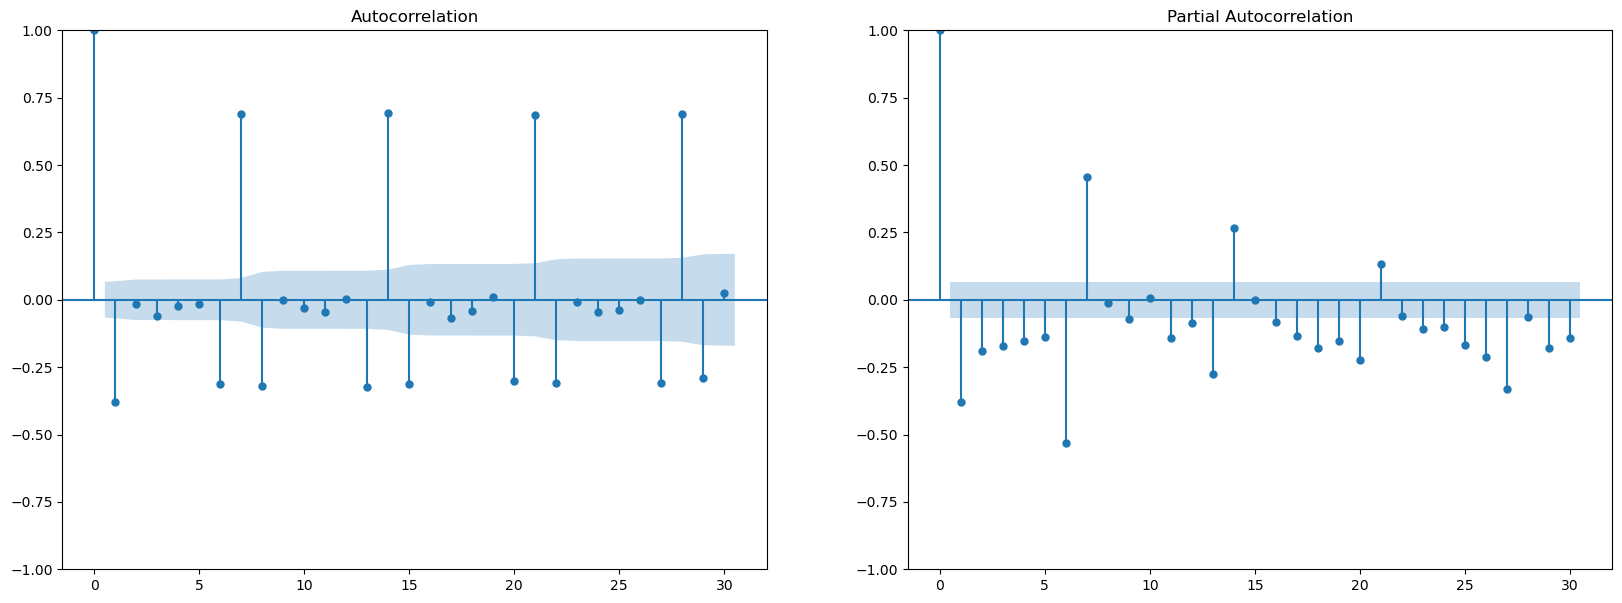

In [171]:
###
fig,ax = plt.subplots(nrows = 1,ncols = 2 ,figsize =(20,7))
fig = plot_acf(diff2, ax=ax[0])
fig = plot_pacf(diff2,ax= ax[1])

In [185]:
from pmdarima import auto_arima

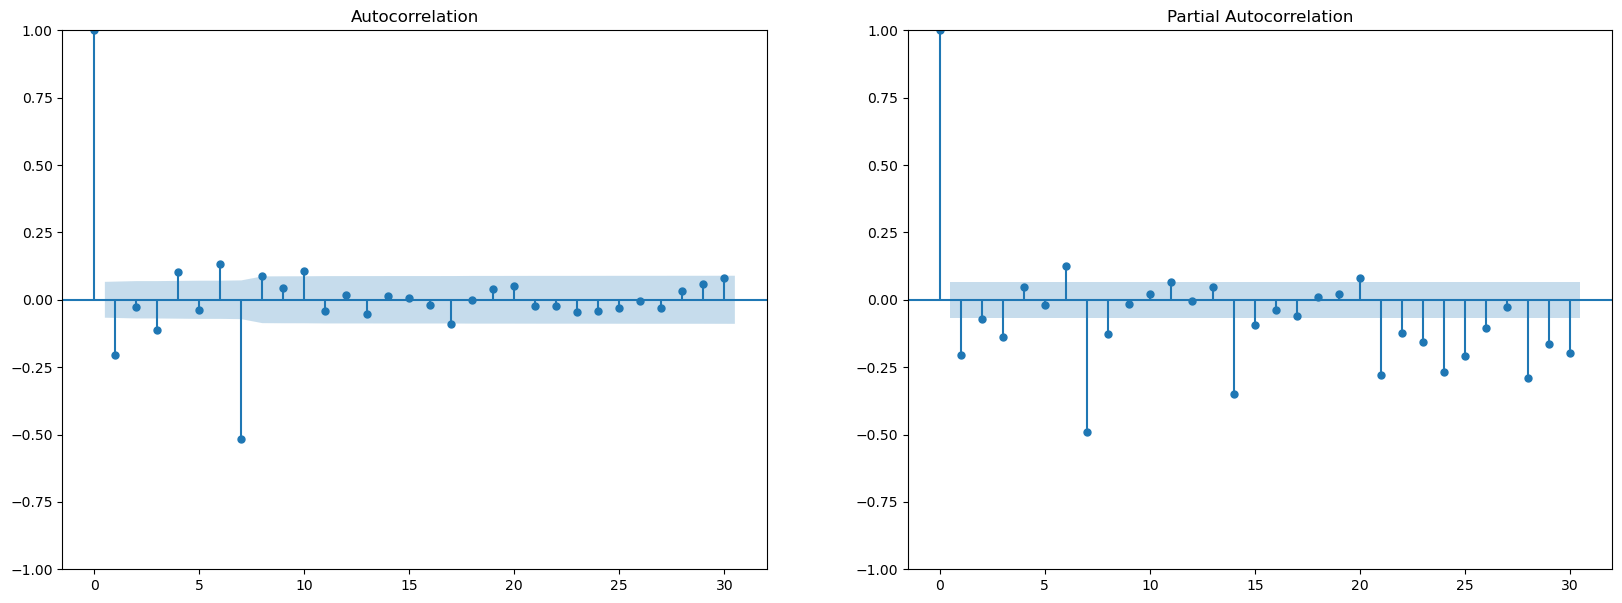

In [184]:
fig,ax = plt.subplots(nrows = 1,ncols = 2 ,figsize =(20,7))
fig = plot_acf(diff3, ax=ax[0])
fig = plot_pacf(diff3,ax= ax[1])

In [186]:
## ARIMA(1,1,1)

In [187]:
## ARIMA(3,1,1)
model_arima_val = statsmodels.tsa.arima.ARIMA(diff2, order=(2,0, 1)).fit()
print(model_arima_val.summary())

                               SARIMAX Results                                
Dep. Variable:                    Val   No. Observations:                  875
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -8397.817
Date:                Mon, 14 Aug 2023   AIC                          16805.634
Time:                        18:20:48   BIC                          16829.505
Sample:                    07-02-2020   HQIC                         16814.765
                         - 11-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6674      3.896      9.155      0.000      28.031      43.304
ar.L1          0.3472      0.031     11.052      0.000       0.286       0.409
ar.L2          0.1085      0.037      2.916      0.0

In [188]:
forecasted_value_ar =    37158.5900 + np.cumsum(model_arima_val.predict(start = start_date,end=end_date))
forecasted_value_ar.tail()

2023-06-26    47250.846550
2023-06-27    47286.513966
2023-06-28    47322.181383
2023-06-29    47357.848799
2023-06-30    47393.516216
Freq: D, Name: predicted_mean, dtype: float64

In [190]:
x = statsmodels.tsa.arima.ARIMA(df_train_ar['Val'], order=(1,1,1)).fit().fittedvalues

In [192]:
rmse = np.sqrt(mean_squared_error(df_train_ar['Val'],x)).round(2)
## MAE
mae = np.round(np.mean(np.abs(df_train_ar['Val']-x)),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(df_train_ar['Val']-x)/df_train_ar['Val'])*100,2)

tempResults = pd.DataFrame({'Method': [' ARIMA(1,1,1) '], 'RMSE':[rmse],'MAE':[mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
tempResults 

Method     RMSE        MAE   MAPE
0   ARIMA(1,1,1)   3631.17  2661.0734  12.72

In [193]:
rmse = np.sqrt(mean_squared_error(df_test_ar['Val'],forecasted_value_ar.values)).round(2)
## MAE
mae = np.round(np.mean(np.abs(df_test_ar['Val']-forecasted_value_ar.values)),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(df_test_ar['Val']-forecasted_value_ar.values)/df_test_ar['Val'])*100,2)

tempResults = pd.DataFrame({'Method': [' ARIMA(1,1,1) '], 'RMSE':[rmse],'MAE':[mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
tempResults 

Method     RMSE        MAE   MAPE
0   ARIMA(1,1,1)   6668.49  5138.4154  11.57

### SARIMA

### EXPONENTIAL SMOOTHING

In [1052]:
df_copy

Vol       Val
DATE                         
2020-07-01   5.1518  11611.71
2020-07-02   4.8196  10494.44
2020-07-03   5.0741  10735.45
2020-07-04   4.9877  10114.58
2020-07-05   4.3252   7115.05
...             ...       ...
2023-06-26  30.2221  48619.69
2023-06-27  29.9957  47516.37
2023-06-28  31.3701  49897.31
2023-06-29  28.0597  37961.22
2023-06-30  31.2903  57747.14

[1095 rows x 2 columns]

In [2224]:
DF = df_copy.copy()

### SPLITTING (70:10:20)

In [2225]:
size = int(len(DF)*0.7)
size2 = int(len(DF)*0.10)
DF_train = DF.iloc[:size]
DF_vd = DF.iloc[size:size+size2]
DF_test = DF.iloc[size+size2:]

## Hyper-parameter tuning for alpha

In [1150]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [1151]:
# create class
model = SimpleExpSmoothing(DF_train['Vol'])

In [1152]:
for i in np.arange(0,1,0.05):
    model_fit = model.fit(smoothing_level=i,optimized=False)
    y_hat_avg = DF_vd.copy()
    y_hat_avg['SES'] = model_fit.forecast(len(DF_vd['Vol']))
    rmse = np.sqrt(mean_squared_error(DF_vd.Vol, y_hat_avg.SES))
    rmse = round(rmse, 4)
    abs_error = np.abs(DF_vd['Vol']-y_hat_avg.SES)
    actual = DF_vd['Vol']
    mape = np.round(np.mean(abs_error/actual),6)*100
    print('smoothing_level : ',np.round(i,3),'RMSE : ' ,np.round(rmse,4) ,'MAPE : ',mape)

smoothing_level :  0.0 RMSE :  17.8214 MAPE :  77.4216
smoothing_level :  0.05 RMSE :  2.9863 MAPE :  11.150400000000001
smoothing_level :  0.1 RMSE :  2.6881 MAPE :  9.7648
smoothing_level :  0.15 RMSE :  2.5198 MAPE :  8.9986
smoothing_level :  0.2 RMSE :  2.4126 MAPE :  8.5382
smoothing_level :  0.25 RMSE :  2.35 MAPE :  8.2829
smoothing_level :  0.3 RMSE :  2.3212 MAPE :  8.17
smoothing_level :  0.35 RMSE :  2.317 MAPE :  8.1532
smoothing_level :  0.4 RMSE :  2.33 MAPE :  8.2046
smoothing_level :  0.45 RMSE :  2.355 MAPE :  8.3024
smoothing_level :  0.5 RMSE :  2.3881 MAPE :  8.4359
smoothing_level :  0.55 RMSE :  2.4264 MAPE :  8.5957
smoothing_level :  0.6 RMSE :  2.4679 MAPE :  8.7733
smoothing_level :  0.65 RMSE :  2.5114 MAPE :  8.960899999999999
smoothing_level :  0.7 RMSE :  2.556 MAPE :  9.1615
smoothing_level :  0.75 RMSE :  2.6012 MAPE :  9.3677
smoothing_level :  0.8 RMSE :  2.647 MAPE :  9.575899999999999
smoothing_level :  0.85 RMSE :  2.6933 MAPE :  9.7886
smoothing_l

### Best alpha = 0.35

In [1059]:
## Model fitting

In [1153]:
len(df_train)

876

In [1154]:
size_new = int(len(DF)*0.80)
DF_train_new = DF.iloc[:size_new]
#DF_vd = DF.iloc[size:size+size2]
DF_test = DF.iloc[size_new:]

In [1155]:
simple_exp = SimpleExpSmoothing(DF_train_new['Vol'])
simple_exp_model = simple_exp.fit(smoothing_level = 0.35, optimized = False)
simple_exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                    Vol   No. Observations:                  876
Model:             SimpleExpSmoothing   SSE                            439.708
Optimized:                      False   AIC                           -599.787
Trend:                           None   BIC                           -590.236
Seasonal:                        None   AICC                          -599.741
Seasonal Periods:                None   Date:                 Tue, 15 Aug 2023
Box-Cox:                        False   Time:                         00:51:15
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3500000                alpha                False
initial_level              5.1518000                  l.0                False
------------------------------------------------------------------------------
"""

In [1156]:
fitted_vl = simple_exp_model.fittedvalues

In [1157]:
DF_test['Predicted_Values_vol']= simple_exp_model.forecast(len(DF_test))
DF_test.tail()

Vol       Val  Predicted_Values_vol
DATE                                               
2023-06-26  30.2221  48619.69             23.944937
2023-06-27  29.9957  47516.37             23.944937
2023-06-28  31.3701  49897.31             23.944937
2023-06-29  28.0597  37961.22             23.944937
2023-06-30  31.2903  57747.14             23.944937

In [1158]:
rmse = np.sqrt(mean_squared_error(DF_test['Vol'],DF_test['Predicted_Values_vol'])).round(2)
## MAE
mae = np.round(np.mean(np.abs(DF_test['Vol']-DF_test['Predicted_Values_vol'])),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(DF_test['Vol']-DF_test['Predicted_Values_vol'])/DF_test['Vol'])*100,2)

tempResults = pd.DataFrame({'Method': [' Simple Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method  RMSE     MAE   MAPE
0   Simple Exponential Smoothing Method   4.72  4.0923  13.99

In [1159]:
rmse = np.sqrt(mean_squared_error(DF_train_new['Vol'],fitted_vl)).round(2)
## MAE
mae = np.round(np.mean(np.abs(DF_train_new['Vol']-fitted_vl)),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(DF_train_new['Vol']-fitted_vl)/DF_train_new['Vol'])*100,2)

tempResults = pd.DataFrame({'Method': [' Simple Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method  RMSE     MAE  MAPE
0   Simple Exponential Smoothing Method   0.71  0.4843  4.26

## DOUBLE EXP

In [1160]:
## TUNING 

In [1375]:
DF_d = df_copy.copy()
DF_d.head()

Vol       Val
DATE                        
2020-07-01  5.1518  11611.71
2020-07-02  4.8196  10494.44
2020-07-03  5.0741  10735.45
2020-07-04  4.9877  10114.58
2020-07-05  4.3252   7115.05

In [1376]:
size = int(len(DF_d)*0.7)
size2 = int(len(DF_d)*0.10)
DF_train = DF.iloc[:size]
DF_vd = DF.iloc[size:size+size2]
DF_test = DF.iloc[size+size2:]

In [1163]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [1164]:
# create class
model_double_exp = ExponentialSmoothing(np.array(DF_train['Vol']),seasonal_periods = 7, trend ='multiplicative', seasonal = None )

In [1165]:
min_mape = float('inf')  # Initialize minimum MAPE to a large value
best_alpha_n = None
best_beta_n = None

for i in np.arange(0.01, 1, 0.1):
    for j in np.arange(0.01, 1, 0.1):
        
        alpha_n = i
        beta_n = j
    
        triple_exp_model = ExponentialSmoothing(DF_train['Vol'], trend='mul', seasonal=None)
        triple_exp_fit = triple_exp_model.fit(smoothing_level=alpha_n, smoothing_slope=beta_n)

        y_hat_avg = DF_vd.copy()
        y_hat_avg['TES'] = triple_exp_fit.forecast(len(DF_vd['Vol']))

        abs_error = np.abs(DF_vd['Vol'] - y_hat_avg.TES)
        actual = DF_vd['Vol']
        mape = np.round(np.mean(abs_error / actual), 6) * 100

        if mape < min_mape:
            min_mape = mape
            best_alpha_n = alpha_n
            best_beta_n = beta_n

            #print('alpha:', np.round(i, 3), 'beta:', np.round(j, 3), 'gamma:', np.round(k, 3), 'MAPE:', mape)

print('Best alpha:', best_alpha_n, 'Best beta:', best_beta_n, 'Min MAPE:', min_mape)

Best alpha: 0.21000000000000002 Best beta: 0.01 Min MAPE: 3.4659000000000004


### Best(alpha, beta) = (0.21,0.01)

In [1166]:
size_new = int(len(DF)*0.80)
DF_train_new = DF.iloc[:size_new]
#DF_vd = DF.iloc[size:size+size2]
DF_test = DF.iloc[size_new:]

In [1167]:
# create class
model_double_exp = ExponentialSmoothing(np.array(DF_train_new['Vol']),seasonal_periods = 7, trend ='multiplicative', seasonal = None )

In [1168]:
model_double_exp_fit_new = model_double_exp.fit(smoothing_level = 0.21, smoothing_slope = 0.01, optimized = False)
model_double_exp_fit_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    endog   No. Observations:                  876
Model:             ExponentialSmoothing   SSE                            487.159
Optimized:                        False   AIC                           -506.015
Trend:                   Multiplicative   BIC                           -486.913
Seasonal:                          None   AICC                          -505.918
Seasonal Periods:                  None   Date:                 Tue, 15 Aug 2023
Box-Cox:                          False   Time:                         00:53:53
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2100000                alpha                False
smoothing_trend            0.0100000                 beta                False
initial_level              5.0408800                  l.0                False
initial_trend              0.9942315                  b.0                False
------------------------------------------------------------------------------
"""

In [1169]:
len(DF_train_new)

876

In [1170]:
fitted_valu = model_double_exp_fit_new.fittedvalues

In [1171]:
DF_test['Predicted_values_vol'] = model_double_exp_fit_new.forecast(len(DF_test))

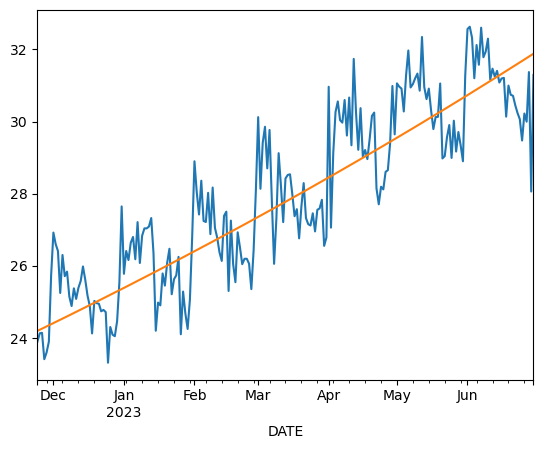

In [1172]:
DF_test['Vol'].plot(kind='line')
DF_test['Predicted_values_vol'].plot(kind='line')
plt.show()

In [1173]:
rmse = np.sqrt(mean_squared_error(DF_train_new['Vol'],fitted_valu)).round(2)
## MAE
mae = np.round(np.mean(np.abs(DF_train_new['Vol']-fitted_valu)),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(DF_train_new['Vol']-fitted_valu)/DF_train_new['Vol'])*100,2)

tempResults = pd.DataFrame({'Method': [' Double Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method  RMSE     MAE  MAPE
0   Double Exponential Smoothing Method   0.75  0.5181  4.51

In [1174]:
rmse = np.sqrt(mean_squared_error(DF_test['Vol'],DF_test['Predicted_values_vol'])).round(2)
## MAE
mae = np.round(np.mean(np.abs(DF_test['Vol']-DF_test['Predicted_values_vol'])),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(DF_test['Vol']-DF_test['Predicted_values_vol'])/DF_test['Vol'])*100,2)

tempResults = pd.DataFrame({'Method': [' Double Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method  RMSE     MAE  MAPE
0   Double Exponential Smoothing Method   1.18  0.9812  3.49

### Triple Exponential

## parameter tuning for gamma

In [1377]:
size = int(len(DF_d)*0.7)
size2 = int(len(DF_d)*0.10)
DF_train = DF.iloc[:size]
DF_vd = DF.iloc[size:size+size2]
DF_test = DF.iloc[size+size2:]

In [1378]:
model_triple_exp = ExponentialSmoothing(DF_train['Vol'], seasonal_periods=30, trend = 'mul', seasonal= 'add')

In [1420]:
min_mape = float('inf')  # Initialize minimum MAPE to a large value
best_alpha = None
best_beta = None
best_gamma = None

for i in np.arange(0.01, 1, 0.1):
    for j in np.arange(0.01, 1, 0.1):
        for k in np.arange(0.01, 1, 0.15):

            alpha = i
            beta = j
            gamma = k

            seasonal_period = 30  # Assuming monthly seasonality

            triple_exp_model = ExponentialSmoothing(DF_train['Vol'], trend='mul', seasonal='add', seasonal_periods=seasonal_period)
            triple_exp_fit = triple_exp_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

            y_hat_avg = DF_vd.copy()
            y_hat_avg['TES'] = triple_exp_fit.forecast(len(DF_vd['Vol']))

            abs_error = np.abs(DF_vd['Vol'] - y_hat_avg.TES)
            actual = DF_vd['Vol']
            mape = np.round(np.mean(abs_error / actual), 6) * 100

            if mape < min_mape:
                min_mape = mape
                best_alpha = alpha
                best_beta = beta
                best_gamma = gamma

            #print('alpha:', np.round(i, 3), 'beta:', np.round(j, 3), 'gamma:', np.round(k, 3), 'MAPE:', mape)

print('Best alpha:', best_alpha, 'Best beta:', best_beta, 'Best gamma:', best_gamma, 'Min MAPE:', min_mape)

Best alpha: 0.01 Best beta: 0.01 Best gamma: 0.16 Min MAPE: 3.2465


## best(alpha,beta, gamma) = (0.01,0.01,0.16)

In [1380]:
### Model Fitting

In [2226]:
size_new = int(len(DF)*0.80)
DF_train_new = DF.iloc[:size_new]
#DF_vd = DF.iloc[size:size+size2]
DF_test = DF.iloc[size_new:]

In [2227]:
alpha = 0.01
beta = 0.01
gamma = 0.16
seasonal_period = 30  # Assuming monthly seasonality
triple_exp_model = ExponentialSmoothing(DF_train_new['Vol'], trend='mul', seasonal='add', seasonal_periods=seasonal_period)
triple_exp_fit = triple_exp_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
triple_exp_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                      Vol   No. Observations:                  876
Model:             ExponentialSmoothing   SSE                            632.417
Optimized:                         True   AIC                           -217.416
Trend:                   Multiplicative   BIC                            -55.054
Seasonal:                      Additive   AICC                          -214.241
Seasonal Periods:                    30   Date:                 Tue, 15 Aug 2023
Box-Cox:                          False   Time:                         22:39:30
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0100000                alpha                False
smoothing_trend               0.0100000                 beta                False
smoothing_seasonal            0.1600000                gamma                False
initial_level                 17.663133                  l.0                 True
initial_trend                 1.0007526                  b.0                 True
initial_seasons.0            -13.034047                  s.0                 True
initial_seasons.1            -13.035058                  s.1                 True
initial_seasons.2            -12.783670                  s.2                 True
initial_seasons.3            -12.700454                  s.3                 True
initial_seasons.4            -12.841122                  s.4                 True
initial_seasons.5            -12.755933                  s.5                 True
initial_seasons.6            -12.664570                  s.6                 True
initial_seasons.7            -12.638565                  s.7                 True
initial_seasons.8            -12.503300                  s.8                 True
initial_seasons.9            -12.621374                  s.9                 True
initial_seasons.10           -12.658036                 s.10                 True
initial_seasons.11           -12.538052                 s.11                 True
initial_seasons.12           -12.460511                 s.12                 True
initial_seasons.13           -12.526146                 s.13                 True
initial_seasons.14           -12.739301                 s.14                 True
initial_seasons.15           -12.674116                 s.15                 True
initial_seasons.16           -12.836256                 s.16                 True
initial_seasons.17           -12.892935                 s.17                 True
initial_seasons.18           -13.270094                 s.18                 True
initial_seasons.19           -12.856823                 s.19                 True
initial_seasons.20           -12.902567                 s.20                 True
initial_seasons.21           -13.031287                 s.21                 True
initial_seasons.22           -12.960079                 s.22                 True
initial_seasons.23           -13.069834                 s.23                 True
initial_seasons.24           -13.009561                 s.24                 True
initial_seasons.25           -13.171296                 s.25                 True
initial_seasons.26           -13.168475                 s.26                 True
initial_seasons.27           -13.334316                 s.27                 True
initial_seasons.28           -13.202959                 s.28                 True
initial_seasons.29           -13.123326                 s.29                 True
--------------------------

In [2228]:
fitted_valu = triple_exp_fit.fittedvalues
fitted_valu

DATE
2020-07-01     4.642380
2020-07-02     4.659822
2020-07-03     4.926194
2020-07-04     5.024301
2020-07-05     4.896685
                ...    
2022-11-19    24.076555
2022-11-20    24.244780
2022-11-21    24.596434
2022-11-22    24.400891
2022-11-23    23.991311
Length: 876, dtype: float64

In [2229]:
DF_test['Predicted_values_vol'] = triple_exp_fit.forecast(len(DF_test))

In [2230]:
####calculating the margin of error 
error_tes = DF_test['Vol']-DF_test['Predicted_values_vol']
mean_tes = error_tes.mean()
se_tes = error_tes.std()
ME_tes = 1.96*se_tes
ME_tes

2.18533827782801

In [2231]:
DF_test.head()

Vol       Val  Predicted_values_vol
DATE                                               
2022-11-24  23.9062  37188.36             23.687235
2022-11-25  24.1307  37146.94             24.101419
2022-11-26  24.1445  35261.16             24.398540
2022-11-27  23.4136  27955.44             24.658927
2022-11-28  23.5987  38785.39             25.159114

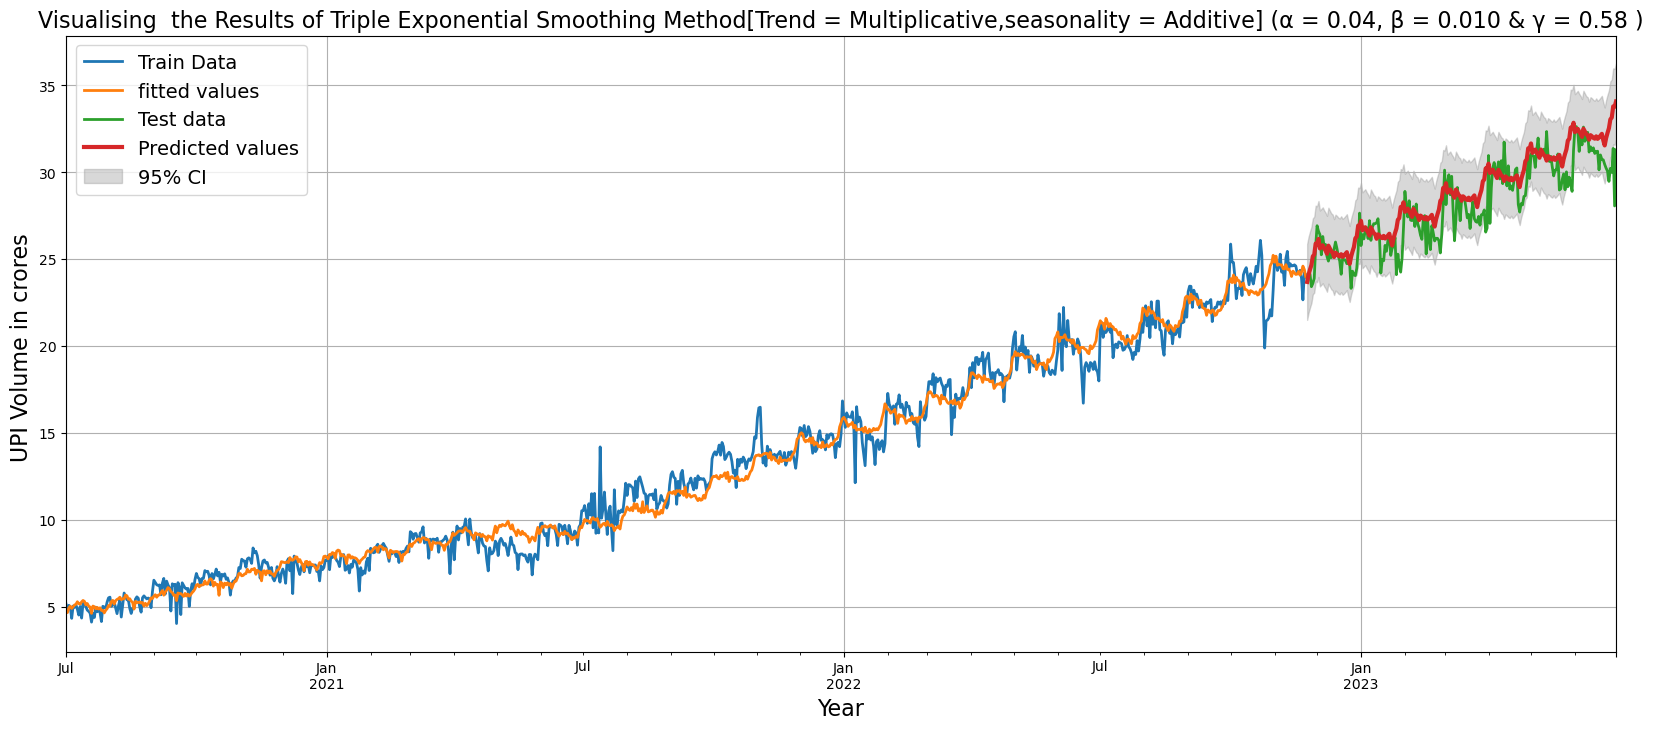

In [2232]:
### 
## with ## Confidence Interval
## Visulaization
fig,ax= plt.subplots(figsize=(20,8))
DF_train_new['Vol'].plot(kind='line',ax =ax,linewidth = 2)
triple_exp_fit.fittedvalues.plot(kind='line',ax = ax,linewidth = 2)
## 
DF_test['Vol'].plot(kind='line',linewidth=2,ax=ax)
DF_test['Predicted_values_vol'].plot(kind='line',linewidth=3,ax=ax)
## margin of error
ci_plus = DF_test['Predicted_values_vol'].values + ME_tes
ci_minus = DF_test['Predicted_values_vol'].values - ME_tes
plt.fill_between(DF_test.index,(ci_plus),(ci_minus),alpha = 0.3,color = 'gray')



plt.xlabel('Year',fontsize=16)
plt.ylabel("UPI Volume in crores ",fontsize=16)
plt.legend(['Train Data','fitted values','Test data','Predicted values','95% CI'],loc='upper left',fontsize=14)

plt.title("Visualising  the Results of Triple Exponential Smoothing Method[Trend = Multiplicative,seasonality = Additive] (α = 0.04, β = 0.010 & γ = 0.58 )",fontsize=16)
plt.grid()
plt.show()

In [2233]:
DF_train_new['error_tes'] = DF_train_new['Vol'] - fitted_valu
DF_train_new.head()

Vol       Val  error_tes
DATE                                   
2020-07-01  5.1518  11611.71   0.509420
2020-07-02  4.8196  10494.44   0.159778
2020-07-03  5.0741  10735.45   0.147906
2020-07-04  4.9877  10114.58  -0.036601
2020-07-05  4.3252   7115.05  -0.571485

In [2234]:
# Performing the Ljung-Box test on residuals of TES model
import statsmodels.api as sm
lags = 10  # Number of lags to test
results2 = sm.stats.acorr_ljungbox(DF_train_new['error_tes'], lags=lags)
print(results2)

        lb_stat      lb_pvalue
1    269.032720   1.843848e-60
2    439.247212   4.156041e-96
3    571.610537  1.437464e-123
4    676.679085  3.905153e-145
5    752.456794  2.225127e-160
6    834.753729  4.760348e-177
7    970.244914  3.230616e-205
8   1034.073310  6.588231e-218
9   1082.263307  3.113421e-227
10  1147.838319  2.560353e-240


## Modelling th residuals 

In [2235]:
err_vol = DF_train_new['error_tes']


In [2236]:
## test for stationary on the Residuals of the TES model for UPI Value
import statsmodels.tsa.stattools as sts
sts.adfuller(err_vol)

(-3.2530824679480133,
 0.017110454978716053,
 21,
 854,
 {'1%': -3.43803040357387,
  '5%': -2.864930295955726,
  '10%': -2.568575256706284},
 1717.3617992729774)

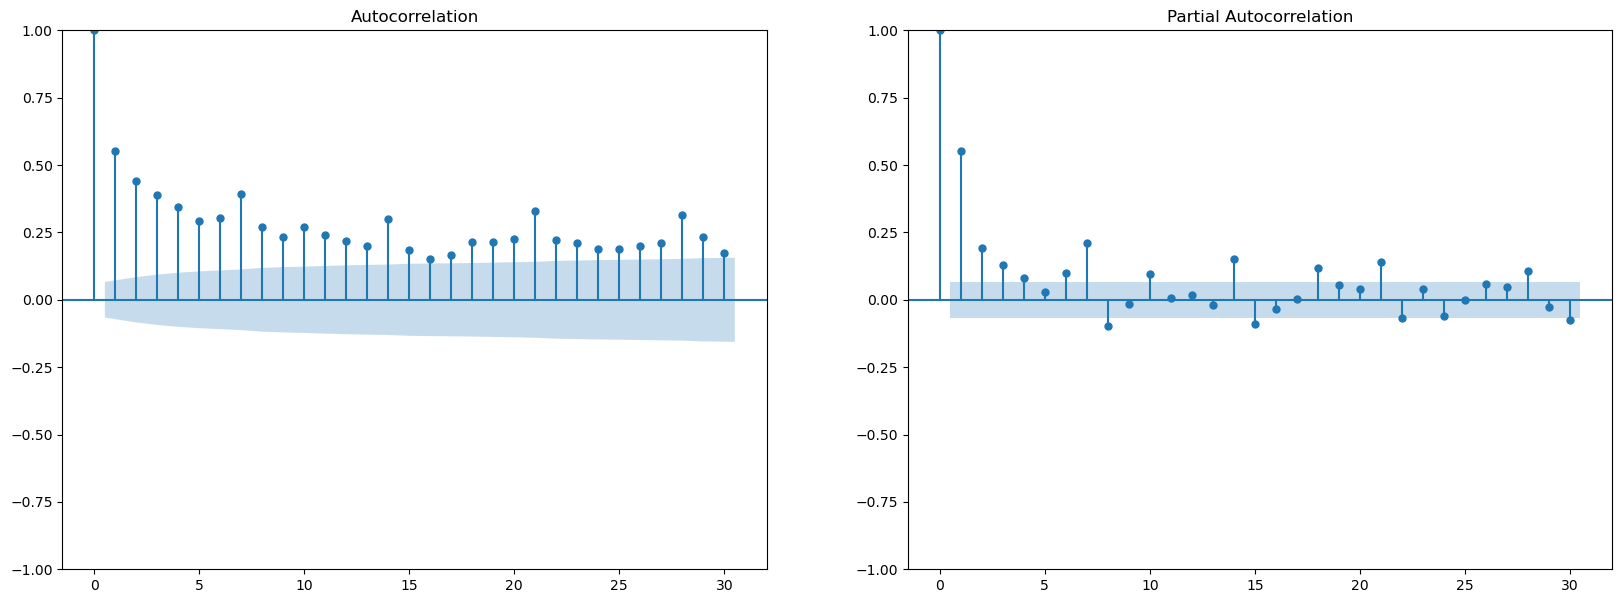

In [2237]:
###
fig,ax = plt.subplots(nrows = 1,ncols = 2 ,figsize =(20,7))
fig = plot_acf(err_vol, ax=ax[0])
fig = plot_pacf(err_vol,ax= ax[1])

In [2238]:
err_tr_diff = err_vol.diff().dropna()

In [2202]:
## test for stationary on the Residuals of the TES model for UPI Value
import statsmodels.tsa.stattools as sts
sts.adfuller(err_tr_diff)

(-10.127978483261186,
 9.074801131147836e-18,
 21,
 853,
 {'1%': -3.438039434877692,
  '5%': -2.8649342774762423,
  '10%': -2.5685773775887872},
 1725.0374395781257)

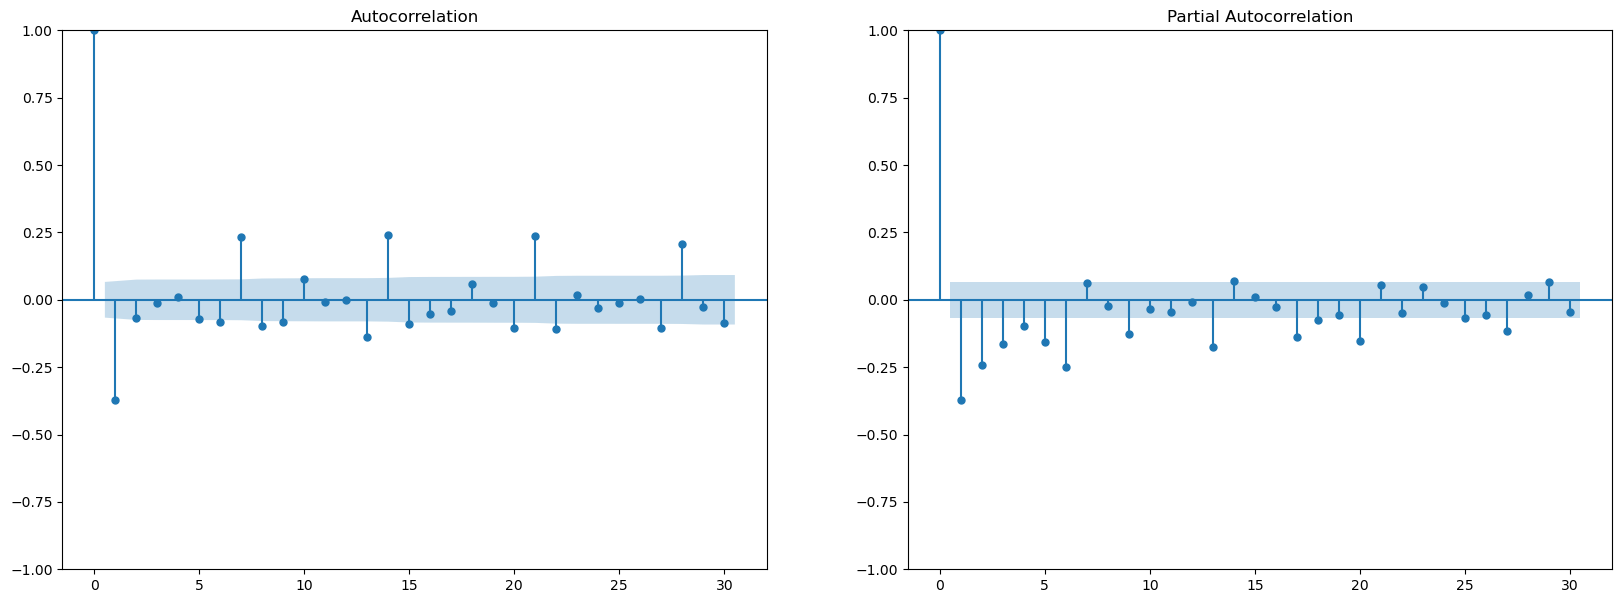

In [2203]:
fig,ax = plt.subplots(nrows = 1,ncols = 2 ,figsize =(20,7))
fig = plot_acf(err_tr_diff, ax=ax[0])
fig = plot_pacf(err_tr_diff,ax= ax[1])

In [2204]:
err_ses_diff = err_tr_diff.diff(7).dropna()

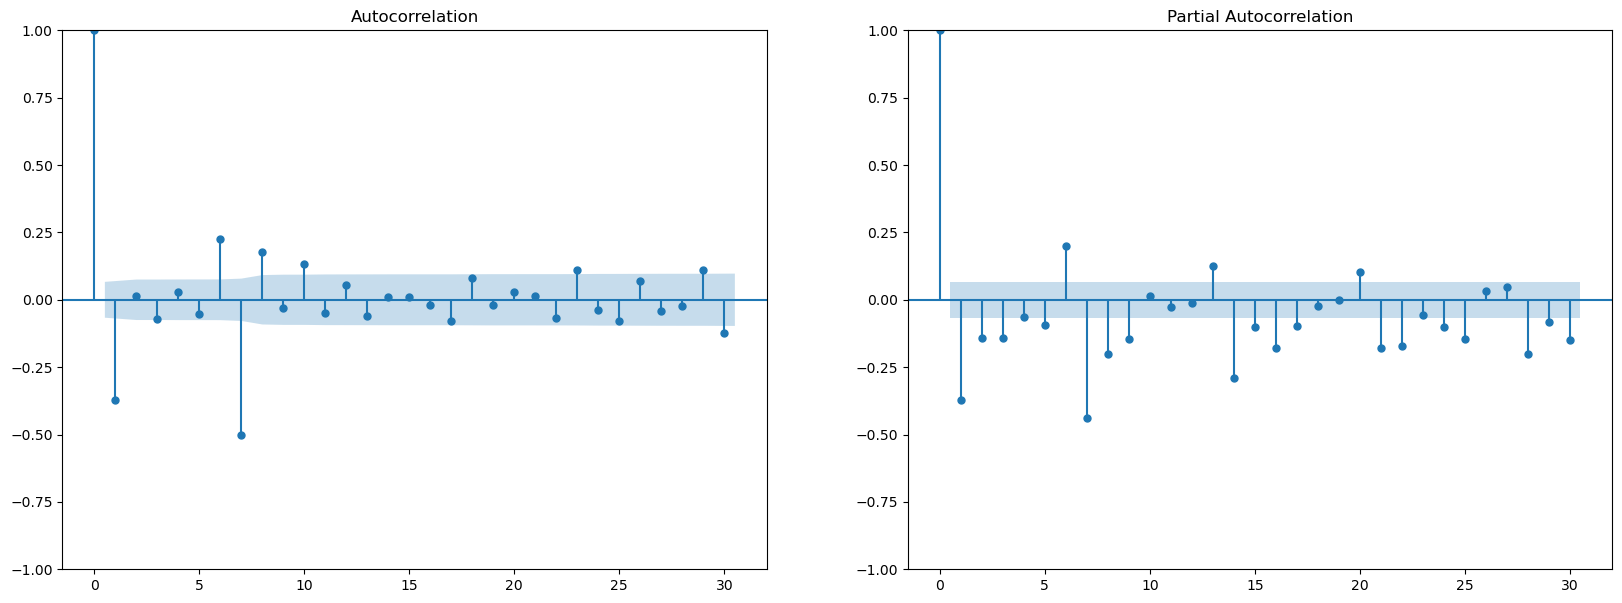

In [2205]:
fig,ax = plt.subplots(nrows = 1,ncols = 2 ,figsize =(20,7))
fig = plot_acf(err_ses_diff, ax=ax[0])
fig = plot_pacf(err_ses_diff,ax= ax[1])

## SARIMA(3,1,1)(0,1,1)[7]

In [2206]:
## FItting the model

In [2207]:
import statsmodels.api as statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2239]:
DF_train_new.head()

Vol       Val  error_tes
DATE                                   
2020-07-01  5.1518  11611.71   0.509420
2020-07-02  4.8196  10494.44   0.159778
2020-07-03  5.0741  10735.45   0.147906
2020-07-04  4.9877  10114.58  -0.036601
2020-07-05  4.3252   7115.05  -0.571485

In [2240]:
### Model Building for residuals
model_error_ar1 = SARIMAX(DF_train_new['error_tes'], order = (3,1,2),seasonal_order = (0, 1, 1, 7))
model_fit_x = model_error_ar1.fit()
model_fit_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           error_tes   No. Observations:                  876
Model:             SARIMAX(3, 1, 2)x(0, 1, [1], 7)   Log Likelihood                -838.267
Date:                             Tue, 15 Aug 2023   AIC                           1690.533
Time:                                     22:40:42   BIC                           1723.896
Sample:                                 07-01-2020   HQIC                          1703.300
                                      - 11-23-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0624      0.401      2.647      0.008       0.276       1.849
ar.L2         -0.1648      0.147     -1.120      0.263      -0.453       0.124
ar.L3         -0.0354      0.064     -0.551      0.582      -0.161       0.090
ma.L1         -1.6136      0.402     -4.013      0.000      -2.402      -0.826
ma.L2          0.6315      0.374      1.690      0.091      -0.101       1.364
ma.S.L7       -0.9612      0.012    -81.456      0.000      -0.984      -0.938
sigma2         0.3950      0.009     42.050      0.000       0.377       0.413
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2556.65
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               3.85   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2241]:
final_fitted = model_fit_x.fittedvalues + fitted_valu

In [2242]:
err2 = model_fit_x.resid
err2

DATE
2020-07-01    0.509420
2020-07-02   -0.349641
2020-07-03   -0.011872
2020-07-04   -0.184507
2020-07-05   -0.534884
                ...   
2022-11-19    0.058381
2022-11-20    0.090308
2022-11-21   -1.984920
2022-11-22    0.659706
2022-11-23    0.313205
Length: 876, dtype: float64

In [2243]:
# Performing the Ljung-Box test on residuals of residuals of TES model for UPI Volume 
import statsmodels.api as sm
lags = 15  # Number of lags to test
results3 = sm.stats.acorr_ljungbox(err2, lags=lags)
print(results3)

      lb_stat  lb_pvalue
1    0.030309   0.861791
2    0.129249   0.937419
3    0.729821   0.866168
4    1.109136   0.892820
5    3.989593   0.550915
6    4.054270   0.669332
7    4.183240   0.758446
8    4.352888   0.823964
9    8.015327   0.532602
10  14.179962   0.164940
11  14.507061   0.206194
12  14.509159   0.269382
13  16.565347   0.219943
14  16.612898   0.277394
15  17.366361   0.297439


In [2245]:
DF_test.tail()

Vol       Val  Predicted_values_vol
DATE                                               
2023-06-26  30.2221  48619.69             33.042481
2023-06-27  29.9957  47516.37             33.147575
2023-06-28  31.3701  49897.31             33.790927
2023-06-29  28.0597  37961.22             33.762179
2023-06-30  31.2903  57747.14             34.071330

In [2213]:
## Predicting the errors

In [2246]:
start_date = '2022-11-24'
end_date = '2023-06-30'

In [2247]:
forecasted_error_ar1 = model_fit_x.predict(start = start_date,end=end_date)
forecasted_error_ar1

2022-11-24   -0.019753
2022-11-25   -0.192290
2022-11-26    0.087320
2022-11-27   -0.587116
2022-11-28   -0.241577
                ...   
2023-06-26   -0.329238
2023-06-27   -0.252957
2023-06-28   -0.100743
2023-06-29   -0.130168
2023-06-30   -0.285403
Freq: D, Name: predicted_mean, Length: 219, dtype: float64

In [2248]:
#DF_train_new['predicted_resid_vol'] = (err2.values*DF_train_new['error_tes'].std())+np.mean(DF_train_new['error_tes'])

In [2249]:
fitted_resid = model_fit_x.resid

In [2250]:
DF_train_new.head()

Vol       Val  error_tes
DATE                                   
2020-07-01  5.1518  11611.71   0.509420
2020-07-02  4.8196  10494.44   0.159778
2020-07-03  5.0741  10735.45   0.147906
2020-07-04  4.9877  10114.58  -0.036601
2020-07-05  4.3252   7115.05  -0.571485

In [2251]:
DF_train_new['Final_fitted'] = DF_train_new['error_tes']+fitted_resid

In [2252]:
DF_test.head()

Vol       Val  Predicted_values_vol
DATE                                               
2022-11-24  23.9062  37188.36             23.687235
2022-11-25  24.1307  37146.94             24.101419
2022-11-26  24.1445  35261.16             24.398540
2022-11-27  23.4136  27955.44             24.658927
2022-11-28  23.5987  38785.39             25.159114

In [2253]:
DF_test.head()

Vol       Val  Predicted_values_vol
DATE                                               
2022-11-24  23.9062  37188.36             23.687235
2022-11-25  24.1307  37146.94             24.101419
2022-11-26  24.1445  35261.16             24.398540
2022-11-27  23.4136  27955.44             24.658927
2022-11-28  23.5987  38785.39             25.159114

In [2254]:
forecasted_error_ar1

2022-11-24   -0.019753
2022-11-25   -0.192290
2022-11-26    0.087320
2022-11-27   -0.587116
2022-11-28   -0.241577
                ...   
2023-06-26   -0.329238
2023-06-27   -0.252957
2023-06-28   -0.100743
2023-06-29   -0.130168
2023-06-30   -0.285403
Freq: D, Name: predicted_mean, Length: 219, dtype: float64

In [2255]:
DF_test['Final_predicted_vol'] = DF_test['Predicted_values_vol']+forecasted_error_ar1.values

In [2256]:
####calculating the margin of error 
error_tes_final = DF_test['Vol']-DF_test['Final_predicted_vol']
mean_tes_final = error_tes_final.mean()
se_tes_final = error_tes_final.std()
ME_tes_final = 1.96*se_tes_final
ME_tes_final

2.1009742018657427

In [2257]:
DF_train_new.head()

Vol       Val  error_tes  Final_fitted
DATE                                                 
2020-07-01  5.1518  11611.71   0.509420      1.018840
2020-07-02  4.8196  10494.44   0.159778     -0.189863
2020-07-03  5.0741  10735.45   0.147906      0.136034
2020-07-04  4.9877  10114.58  -0.036601     -0.221109
2020-07-05  4.3252   7115.05  -0.571485     -1.106369

In [2258]:
DF_train_new['Final_fitted_vol'] = triple_exp_fit.fittedvalues+model_fit_x.fittedvalues

In [2259]:
DF_test.head()

Vol       Val  Predicted_values_vol  Final_predicted_vol
DATE                                                                    
2022-11-24  23.9062  37188.36             23.687235            23.667481
2022-11-25  24.1307  37146.94             24.101419            23.909130
2022-11-26  24.1445  35261.16             24.398540            24.485860
2022-11-27  23.4136  27955.44             24.658927            24.071811
2022-11-28  23.5987  38785.39             25.159114            24.917537

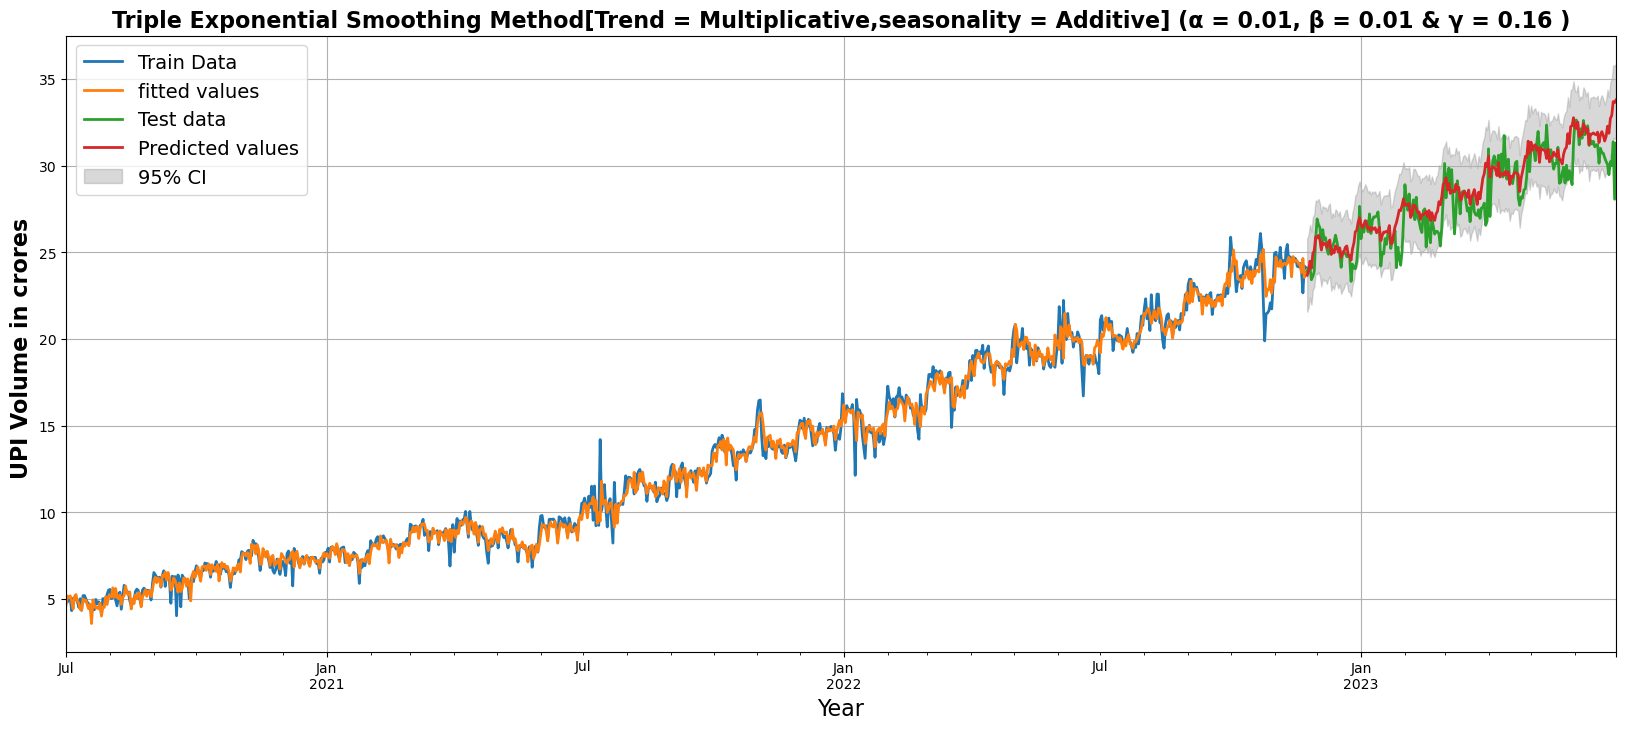

In [2260]:
### 
## with ## Confidence Interval
## Visulaization
fig,ax= plt.subplots(figsize=(20,8))
DF_train_new['Vol'].plot(kind='line',ax =ax,linewidth = 2)
DF_train_new['Final_fitted_vol'].plot(kind='line',ax = ax,linewidth = 2)
## 
DF_test['Vol'].plot(kind='line',linewidth=2,ax=ax)
DF_test['Final_predicted_vol'].plot(kind='line',linewidth=2,ax=ax)
## margin of error
ci_plus = DF_test['Final_predicted_vol'].values + ME_tes_final
ci_minus = DF_test['Final_predicted_vol'].values - ME_tes_final
plt.fill_between(DF_test.index,(ci_plus),(ci_minus),alpha = 0.3,color = 'gray')



plt.xlabel('Year',fontsize=16)
plt.ylabel("UPI Volume in crores ",fontsize=16,fontweight='bold')
plt.legend(['Train Data','fitted values','Test data','Predicted values','95% CI'],loc='upper left',fontsize=14)

plt.title("Triple Exponential Smoothing Method[Trend = Multiplicative,seasonality = Additive] (α = 0.01, β = 0.01 & γ = 0.16 )",fontsize=16,fontweight = 'bold')
plt.grid()
plt.show()

In [1456]:
DF_train_new.head()

Vol       Val  error_tes  Final_fitted  Final_fitted_vol
DATE                                                                   
2020-07-01  5.1518  11611.71   0.603665      1.207330          4.548135
2020-07-02  4.8196  10494.44   0.255436     -0.092794          5.167829
2020-07-03  5.0741  10735.45   0.249675      0.243915          5.079860
2020-07-04  4.9877  10114.58   0.058225     -0.133225          5.179150
2020-07-05  4.3252   7115.05  -0.485262     -1.028750          4.868687

In [1457]:
rmse = np.sqrt(mean_squared_error(DF_train_new['Vol'],DF_train_new['Final_fitted_vol'])).round(2)
## MAE
mae = np.round(np.mean(np.abs(DF_train_new['Vol']-DF_train_new['Final_fitted_vol'])),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(DF_train_new['Vol']-DF_train_new['Final_fitted_vol'])/DF_train_new['Vol'])*100,2)

tempResults = pd.DataFrame({'Method': [' Triple Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method  RMSE     MAE  MAPE
0   Triple Exponential Smoothing Method   0.63  0.4206  3.62

In [1458]:
rmse = np.sqrt(mean_squared_error(DF_test['Vol'],DF_test['Final_predicted_vol'])).round(2)
## MAE
mae = np.round(np.mean(np.abs(DF_test['Vol']-DF_test['Final_predicted_vol'])),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(DF_test['Vol']-DF_test['Final_predicted_vol'])/DF_test['Vol'])*100,2)

tempResults = pd.DataFrame({'Method': [' Triple Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method  RMSE     MAE  MAPE
0   Triple Exponential Smoothing Method   1.07  0.8347  2.95

## FOR UPI Value

In [2261]:
df_copy

Vol       Val
DATE                         
2020-07-01   5.1518  11611.71
2020-07-02   4.8196  10494.44
2020-07-03   5.0741  10735.45
2020-07-04   4.9877  10114.58
2020-07-05   4.3252   7115.05
...             ...       ...
2023-06-26  30.2221  48619.69
2023-06-27  29.9957  47516.37
2023-06-28  31.3701  49897.31
2023-06-29  28.0597  37961.22
2023-06-30  31.2903  57747.14

[1095 rows x 2 columns]

In [2262]:
size = int(len(DF)*0.7)
size2 = int(len(DF)*0.10)
DF_train = DF.iloc[:size]
DF_vd = DF.iloc[size:size+size2]
DF_test = DF.iloc[size+size2:]

### SES

In [2263]:
# create class
model = SimpleExpSmoothing(DF_train['Val'])

In [1222]:
for i in np.arange(0.1,0.3,0.005):
    model_fit = model.fit(smoothing_level=i,optimized=False)
    y_hat_avg = DF_vd.copy()
    y_hat_avg['SES'] = model_fit.forecast(len(DF_vd['Val']))
    rmse = np.sqrt(mean_squared_error(DF_vd.Val, y_hat_avg.SES))
    rmse = round(rmse, 4)
    abs_error = np.abs(DF_vd['Val']-y_hat_avg.SES)
    actual = DF_vd['Val']
    mape = np.round(np.mean(abs_error/actual),6)*100
    print('smoothing_level : ',np.round(i,3),'RMSE : ' ,np.round(rmse,4) ,'MAPE : ',mape)

smoothing_level :  0.1 RMSE :  5992.4612 MAPE :  12.799900000000001
smoothing_level :  0.105 RMSE :  5963.0471 MAPE :  12.7451
smoothing_level :  0.11 RMSE :  5935.0113 MAPE :  12.6991
smoothing_level :  0.115 RMSE :  5908.4236 MAPE :  12.6542
smoothing_level :  0.12 RMSE :  5883.3378 MAPE :  12.609699999999998
smoothing_level :  0.125 RMSE :  5859.791 MAPE :  12.5656
smoothing_level :  0.13 RMSE :  5837.8042 MAPE :  12.5268
smoothing_level :  0.135 RMSE :  5817.3827 MAPE :  12.4973
smoothing_level :  0.14 RMSE :  5798.5176 MAPE :  12.472900000000001
smoothing_level :  0.145 RMSE :  5781.1867 MAPE :  12.4587
smoothing_level :  0.15 RMSE :  5765.3561 MAPE :  12.451600000000001
smoothing_level :  0.155 RMSE :  5750.9817 MAPE :  12.444700000000001
smoothing_level :  0.16 RMSE :  5738.0107 MAPE :  12.439300000000001
smoothing_level :  0.165 RMSE :  5726.3831 MAPE :  12.4389
smoothing_level :  0.17 RMSE :  5716.0333 MAPE :  12.4399
smoothing_level :  0.175 RMSE :  5706.8914 MAPE :  12.4429


### alpha = 0.17

### Fitting SES

In [1223]:
size_new = int(len(DF)*0.80)
DF_train_new = DF.iloc[:size_new]
#DF_vd = DF.iloc[size:size+size2]
DF_test = DF.iloc[size_new:]

In [1224]:
import numpy as np
from scipy.stats import boxcox

# Apply Box-Cox transformation
transformed_data, lambda_value = boxcox(DF_train_new['Val'])

In [1225]:
lambda_value

0.3340098070985406

In [915]:
#transformed_data

In [1227]:
simple_exp = SimpleExpSmoothing(DF_train_new['Val'])
simple_exp_model = simple_exp.fit(smoothing_level = 0.17, optimized = False)
simple_exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                    Val   No. Observations:                  876
Model:             SimpleExpSmoothing   SSE                    12476615015.760
Optimized:                      False   AIC                          14433.258
Trend:                           None   BIC                          14442.809
Seasonal:                        None   AICC                         14433.304
Seasonal Periods:                None   Date:                 Tue, 15 Aug 2023
Box-Cox:                        False   Time:                         01:06:17
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1700000                alpha                False
initial_level              11611.710                  l.0                False
------------------------------------------------------------------------------
"""

In [1228]:
fitted_vl = simple_exp_model.fittedvalues

In [1229]:
DF_test['Predicted_Values_val']= simple_exp_model.forecast(len(DF_test))
DF_test.tail()

Vol       Val  Predicted_Values_val
DATE                                               
2023-06-26  30.2221  48619.69          37435.059238
2023-06-27  29.9957  47516.37          37435.059238
2023-06-28  31.3701  49897.31          37435.059238
2023-06-29  28.0597  37961.22          37435.059238
2023-06-30  31.2903  57747.14          37435.059238

In [1230]:
rmse = np.sqrt(mean_squared_error(DF_test['Val'],DF_test['Predicted_Values_val'])).round(2)
## MAE
mae = np.round(np.mean(np.abs(DF_test['Val']-DF_test['Predicted_Values_val'])),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(DF_test['Val']-DF_test['Predicted_Values_val'])/DF_test['Val'])*100,2)

tempResults = pd.DataFrame({'Method': [' Simple Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method      RMSE        MAE   MAPE
0   Simple Exponential Smoothing Method   10341.04  8673.1022  18.11

In [1232]:
rmse = np.sqrt(mean_squared_error(DF_train_new['Val'],fitted_vl)).round(2)
## MAE
mae = np.round(np.mean(np.abs(DF_train_new['Val']-fitted_vl)),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(DF_train_new['Val']-fitted_vl)/DF_train_new['Val'])*100,2)

tempResults = pd.DataFrame({'Method': [' Simple Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method     RMSE       MAE   MAPE
0   Simple Exponential Smoothing Method   3773.95  2739.402  13.16

## DES

In [1233]:
DF_d = df_copy.copy()
DF_d.head()

Vol       Val
DATE                        
2020-07-01  5.1518  11611.71
2020-07-02  4.8196  10494.44
2020-07-03  5.0741  10735.45
2020-07-04  4.9877  10114.58
2020-07-05  4.3252   7115.05

In [1234]:
size = int(len(DF_d)*0.7)
size2 = int(len(DF_d)*0.10)
DF_train = DF.iloc[:size]
DF_vd = DF.iloc[size:size+size2]
DF_test = DF.iloc[size+size2:]

In [1235]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [1236]:
# create class
model_double_exp = ExponentialSmoothing(np.array(DF_train['Val']), trend ='additive', seasonal = None )

In [1246]:
min_mape = float('inf')  # Initialize minimum MAPE to a large value
best_alpha_n = None
best_beta_n = None

for i in np.arange(0.01, 1, 0.1):
    for j in np.arange(0.01, 1, 0.15):
        
        alpha_n = i
        beta_n = j
    
        triple_exp_model = ExponentialSmoothing(DF_train['Val'], trend='add', seasonal=None)
        triple_exp_fit = triple_exp_model.fit(smoothing_level=alpha_n, smoothing_slope=beta_n)

        y_hat_avg = DF_vd.copy()
        y_hat_avg['TES'] = triple_exp_fit.forecast(len(DF_vd['Val']))

        abs_error = np.abs(DF_vd['Val'] - y_hat_avg.TES)
        actual = DF_vd['Val']
        mape = np.round(np.mean(abs_error / actual), 6) * 100

        if mape < min_mape:
            min_mape = mape
            best_alpha_n = alpha_n
            best_beta_n = beta_n

            #print('alpha:', np.round(i, 3), 'beta:', np.round(j, 3), 'gamma:', np.round(k, 3), 'MAPE:', mape)

print('Best alpha:', best_alpha_n, 'Best beta:', best_beta_n, 'Min MAPE:', min_mape)

Best alpha: 0.11 Best beta: 0.01 Min MAPE: 12.107999999999999


### best(alpha,beta) = (0.11,0.01)

In [1247]:
#  fitting the model

In [1248]:
size_new = int(len(DF)*0.80)
DF_train_new = DF.iloc[:size_new]
#DF_vd = DF.iloc[size:size+size2]
DF_test = DF.iloc[size_new:]

In [1240]:
# create class
model_double_exp = ExponentialSmoothing(np.array(DF_train_new['Val']), trend ='additive', seasonal = None )

In [1249]:
model_double_exp_fit_new = model_double_exp.fit(smoothing_level = 0.11, smoothing_slope = 0.01, optimized = False)
model_double_exp_fit_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    endog   No. Observations:                  876
Model:             ExponentialSmoothing   SSE                    12960423435.861
Optimized:                        False   AIC                          14470.585
Trend:                         Additive   BIC                          14489.686
Seasonal:                          None   AICC                         14470.682
Seasonal Periods:                  None   Date:                 Tue, 15 Aug 2023
Box-Cox:                          False   Time:                         01:14:51
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1100000                alpha                False
smoothing_trend            0.0100000                 beta                False
initial_level              10785.737                  l.0                False
initial_trend             -117.42721                  b.0                False
------------------------------------------------------------------------------
"""

In [1250]:
len(DF_train_new)

876

In [1251]:
fitted_valu = model_double_exp_fit_new.fittedvalues

DF_test['Predicted_values_val'] = model_double_exp_fit_new.forecast(len(DF_test))

In [1252]:
rmse = np.sqrt(mean_squared_error(DF_test['Val'],DF_test['Predicted_values_val'])).round(2)
## MAE
mae = np.round(np.mean(np.abs(DF_test['Val']-DF_test['Predicted_values_val'])),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(DF_test['Val']-DF_test['Predicted_values_val'])/DF_test['Val'])*100,2)

tempResults = pd.DataFrame({'Method': [' Simple Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method     RMSE        MAE  MAPE
0   Simple Exponential Smoothing Method   7843.95  6298.8566  13.5

In [1253]:
rmse = np.sqrt(mean_squared_error(DF_train_new['Val'],fitted_valu)).round(2)
## MAE
mae = np.round(np.mean(np.abs(DF_train_new['Val']-fitted_valu)),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(DF_train_new['Val']-fitted_valu)/DF_train_new['Val'])*100,2)

tempResults = pd.DataFrame({'Method': [' Double Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method     RMSE        MAE   MAPE
0   Double Exponential Smoothing Method   3846.43  2793.0145  13.48

## TES 

In [2134]:
size = int(len(DF_d)*0.7)
size2 = int(len(DF_d)*0.10)
DF_train = DF.iloc[:size]
DF_vd = DF.iloc[size:size+size2]
DF_test = DF.iloc[size+size2:]

In [2135]:
DF_train_new.head()

Vol       Val  error_tes  Final_fitted  Final_fitted_vol
DATE                                                                   
2020-07-01  5.1518  11611.71   0.509420      1.018840          4.642380
2020-07-02  4.8196  10494.44   0.159778     -0.189863          5.169241
2020-07-03  5.0741  10735.45   0.147906      0.136034          5.085972
2020-07-04  4.9877  10114.58  -0.036601     -0.221109          5.172207
2020-07-05  4.3252   7115.05  -0.571485     -1.106369          4.860084

In [2136]:
model_triple_exp = ExponentialSmoothing(DF_train['Val'], seasonal_periods=30, trend = 'add', seasonal= 'mul')

In [1257]:

min_mape = float('inf')  # Initialize minimum MAPE to a large value
best_alpha = None
best_beta = None
best_gamma = None

for i in np.arange(0.01, 1, 0.1):
    for j in np.arange(0.01, 1, 0.1):
        for k in np.arange(0.01, 1, 0.1):

            alpha = i
            beta = j
            gamma = k

            seasonal_period = 30  # Assuming monthly seasonality

            triple_exp_model = ExponentialSmoothing(DF_train['Val'], trend='add', seasonal='mul', seasonal_periods=seasonal_period)
            triple_exp_fit = triple_exp_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

            y_hat_avg = DF_vd.copy()
            y_hat_avg['TES'] = triple_exp_fit.forecast(len(DF_vd['Val']))

            abs_error = np.abs(DF_vd['Val'] - y_hat_avg.TES)
            actual = DF_vd['Val']
            mape = np.round(np.mean(abs_error / actual), 6) * 100

            if mape < min_mape:
                min_mape = mape
                best_alpha = alpha
                best_beta = beta
                best_gamma = gamma

            #print('alpha:', np.round(i, 3), 'beta:', np.round(j, 3), 'gamma:', np.round(k, 3), 'MAPE:', mape)

print('Best alpha:', best_alpha, 'Best beta:', best_beta, 'Best gamma:', best_gamma, 'Min MAPE:', min_mape)

Best alpha: 0.01 Best beta: 0.01 Best gamma: 0.21000000000000002 Min MAPE: 11.8583


## Best (alpha,beta,gamma)= (0.01,0.01,0.21)

In [2264]:
size_new = int(len(DF)*0.80)
DF_train_new = DF.iloc[:size_new]
#DF_vd = DF.iloc[size:size+size2]
DF_test = DF.iloc[size_new:]

In [2265]:
alpha = 0.01
beta = 0.01
gamma = 0.21
seasonal_period = 30  # Assuming monthly seasonality
triple_exp_model = ExponentialSmoothing(DF_train_new['Val'], trend='add', seasonal='mul', seasonal_periods=seasonal_period)
triple_exp_fit = triple_exp_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
triple_exp_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                      Val   No. Observations:                  876
Model:             ExponentialSmoothing   SSE                    11534646705.474
Optimized:                         True   AIC                          14428.491
Trend:                         Additive   BIC                          14590.854
Seasonal:                Multiplicative   AICC                         14431.667
Seasonal Periods:                    30   Date:                 Tue, 15 Aug 2023
Box-Cox:                          False   Time:                         22:44:24
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0100000                alpha                False
smoothing_trend               0.0100000                 beta                False
smoothing_seasonal            0.2100000                gamma                False
initial_level                 9284.4311                  l.0                 True
initial_trend                 0.1882495                  b.0                 True
initial_seasons.0             0.9914011                  s.0                 True
initial_seasons.1             1.1519072                  s.1                 True
initial_seasons.2             1.1437641                  s.2                 True
initial_seasons.3             1.0584351                  s.3                 True
initial_seasons.4             1.1852840                  s.4                 True
initial_seasons.5             1.0613455                  s.5                 True
initial_seasons.6             1.1225796                  s.6                 True
initial_seasons.7             1.0169993                  s.7                 True
initial_seasons.8             1.1329996                  s.8                 True
initial_seasons.9             1.0219857                  s.9                 True
initial_seasons.10            1.0271148                 s.10                 True
initial_seasons.11            1.1031419                 s.11                 True
initial_seasons.12            1.0316144                 s.12                 True
initial_seasons.13            1.0933574                 s.13                 True
initial_seasons.14            0.9610299                 s.14                 True
initial_seasons.15            0.9976031                 s.15                 True
initial_seasons.16            0.9609662                 s.16                 True
initial_seasons.17            0.9862213                 s.17                 True
initial_seasons.18            0.8036282                 s.18                 True
initial_seasons.19            0.9465569                 s.19                 True
initial_seasons.20            0.9922527                 s.20                 True
initial_seasons.21            0.8953702                 s.21                 True
initial_seasons.22            0.9516152                 s.22                 True
initial_seasons.23            0.9043685                 s.23                 True
initial_seasons.24            0.9527407                 s.24                 True
initial_seasons.25            0.8464457                 s.25                 True
initial_seasons.26            0.8931953                 s.26                 True
initial_seasons.27            0.8758516                 s.27                 True
initial_seasons.28            0.8926449                 s.28                 True
initial_seasons.29            0.9975802                 s.29                 True
--------------------------

In [2266]:
fitted_valu = triple_exp_fit.fittedvalues
fitted_valu

DATE
2020-07-01     9204.781581
2020-07-02    10723.482610
2020-07-03    10645.871605
2020-07-04     9852.922679
2020-07-05    11037.209536
                  ...     
2022-11-19    37021.935522
2022-11-20    38485.760096
2022-11-21    38720.189900
2022-11-22    37038.751747
2022-11-23    34542.108058
Length: 876, dtype: float64

In [2267]:
DF_test['Predicted_values_val'] = triple_exp_fit.forecast(len(DF_test))

In [2268]:
####calculating the margin of error 

error_tes = DF_test['Val']-DF_test['Predicted_values_val']

mean_tes = error_tes.mean()

se_tes = error_tes.std()

ME_tes = 1.96*se_tes

ME_tes


12190.731020170273

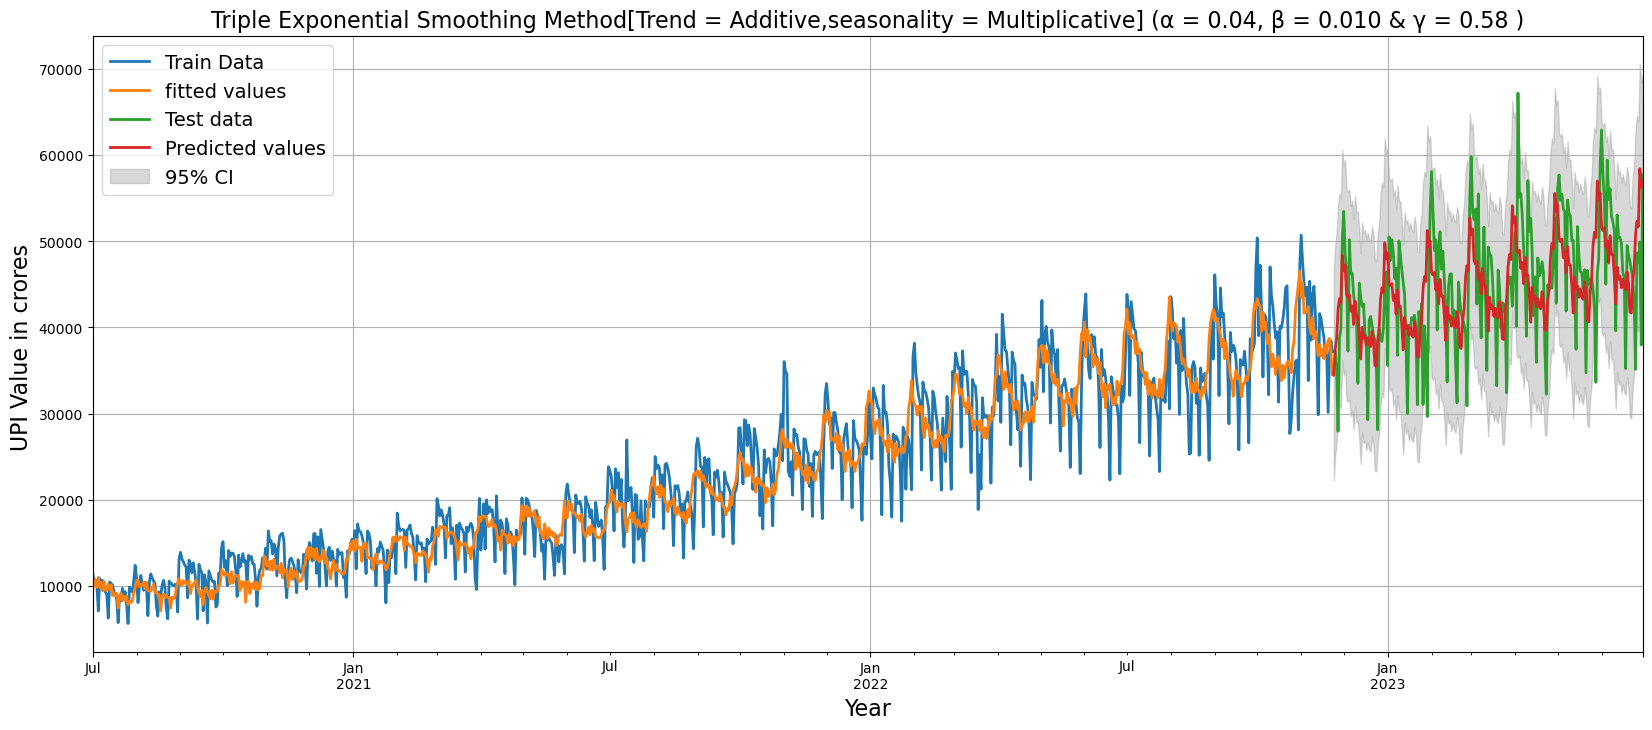

In [2269]:


### 

## with ## Confidence Interval

## Visulaization

fig,ax= plt.subplots(figsize=(20,8))

DF_train_new['Val'].plot(kind='line',ax =ax,linewidth = 2)

triple_exp_fit.fittedvalues.plot(kind='line',ax = ax,linewidth = 2)

## 

DF_test['Val'].plot(kind='line',linewidth=2,ax=ax)

DF_test['Predicted_values_val'].plot(kind='line',linewidth=2,ax=ax)

## margin of error

ci_plus = DF_test['Predicted_values_val'].values + ME_tes

ci_minus = DF_test['Predicted_values_val'].values - ME_tes

plt.fill_between(DF_test.index,(ci_plus),(ci_minus),alpha = 0.3,color = 'gray')


plt.xlabel('Year',fontsize=16)

plt.ylabel("UPI Value in crores ",fontsize=16)

plt.legend(['Train Data','fitted values','Test data','Predicted values','95% CI'],loc='upper left',fontsize=14)


plt.title("Triple Exponential Smoothing Method[Trend = Additive,seasonality = Multiplicative] (α = 0.04, β = 0.010 & γ = 0.58 )",fontsize=16)

plt.grid()

plt.show()

In [2270]:
### modelling th residuals

In [2271]:
DF_train_new['error_tes'] = DF_train_new['Val'] - fitted_valu
DF_train_new.head()

Vol       Val    error_tes
DATE                                     
2020-07-01  5.1518  11611.71  2406.928419
2020-07-02  4.8196  10494.44  -229.042610
2020-07-03  5.0741  10735.45    89.578395
2020-07-04  4.9877  10114.58   261.657321
2020-07-05  4.3252   7115.05 -3922.159536

In [2272]:
error_val = triple_exp_fit.resid

In [2273]:
# Performing the Ljung-Box test on residuals of TES model
import statsmodels.api as sm
lags = 10  # Number of lags to test
results4 = sm.stats.acorr_ljungbox(error_val, lags=lags)
print(results4)

       lb_stat     lb_pvalue
1    30.539447  3.271466e-08
2    30.727242  2.126495e-07
3    38.110301  2.678503e-08
4    46.441736  1.992943e-09
5    51.231769  7.752913e-10
6    51.260779  2.625429e-09
7   361.003437  5.429379e-74
8   361.031601  3.995910e-73
9   365.990799  2.439744e-73
10  380.222685  1.516001e-75


In [2274]:
### 

In [2275]:
error_tran = (error_val-np.mean(error_val))/error_val.std()

In [2276]:
error_tran

DATE
2020-07-01    0.565539
2020-07-02   -0.164150
2020-07-03   -0.075950
2020-07-04   -0.028315
2020-07-05   -1.186479
                ...   
2022-11-19   -0.136439
2022-11-20   -2.410521
2022-11-21   -0.568741
2022-11-22    0.290186
2022-11-23    0.623547
Length: 876, dtype: float64

In [2277]:
###

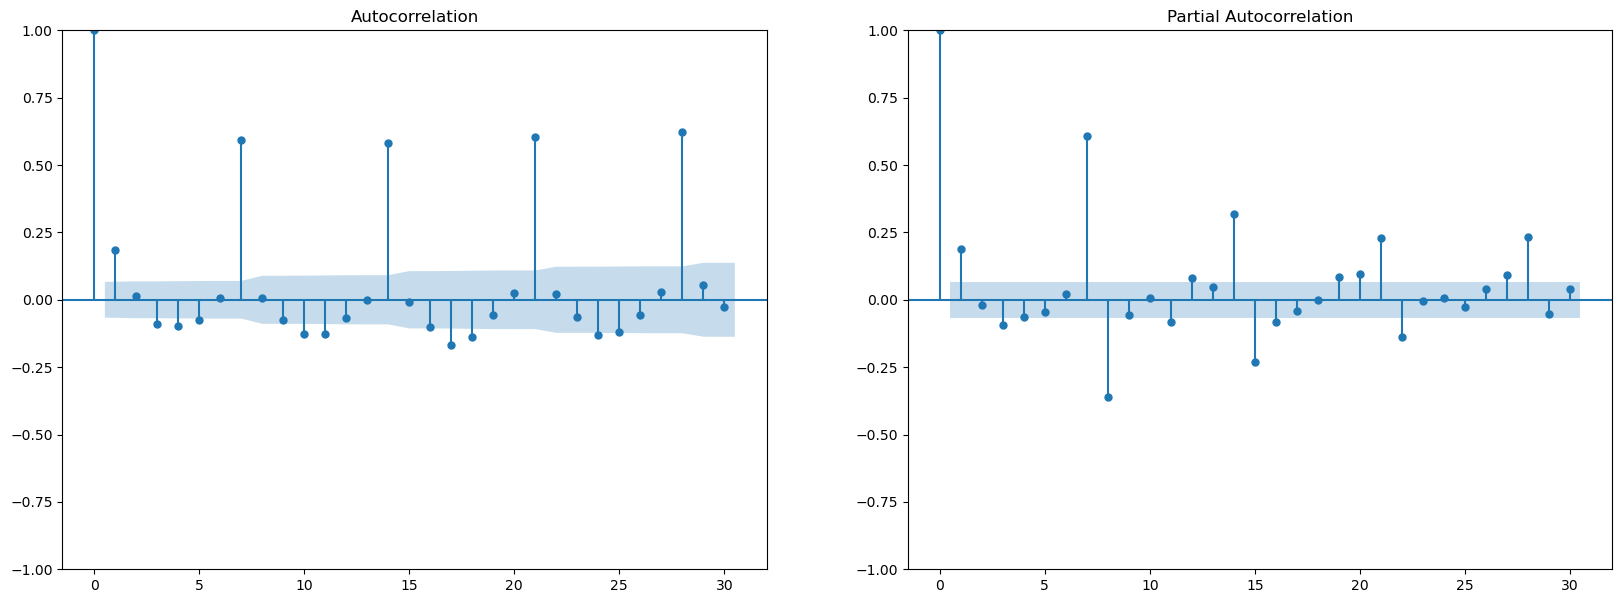

In [2278]:
###
fig,ax = plt.subplots(nrows = 1,ncols = 2 ,figsize =(20,7))
fig = plot_acf(error_tran, ax=ax[0])
fig = plot_pacf(error_tran,ax= ax[1])

In [1363]:
err_tran_s_diff = error_tran.diff(7).dropna()

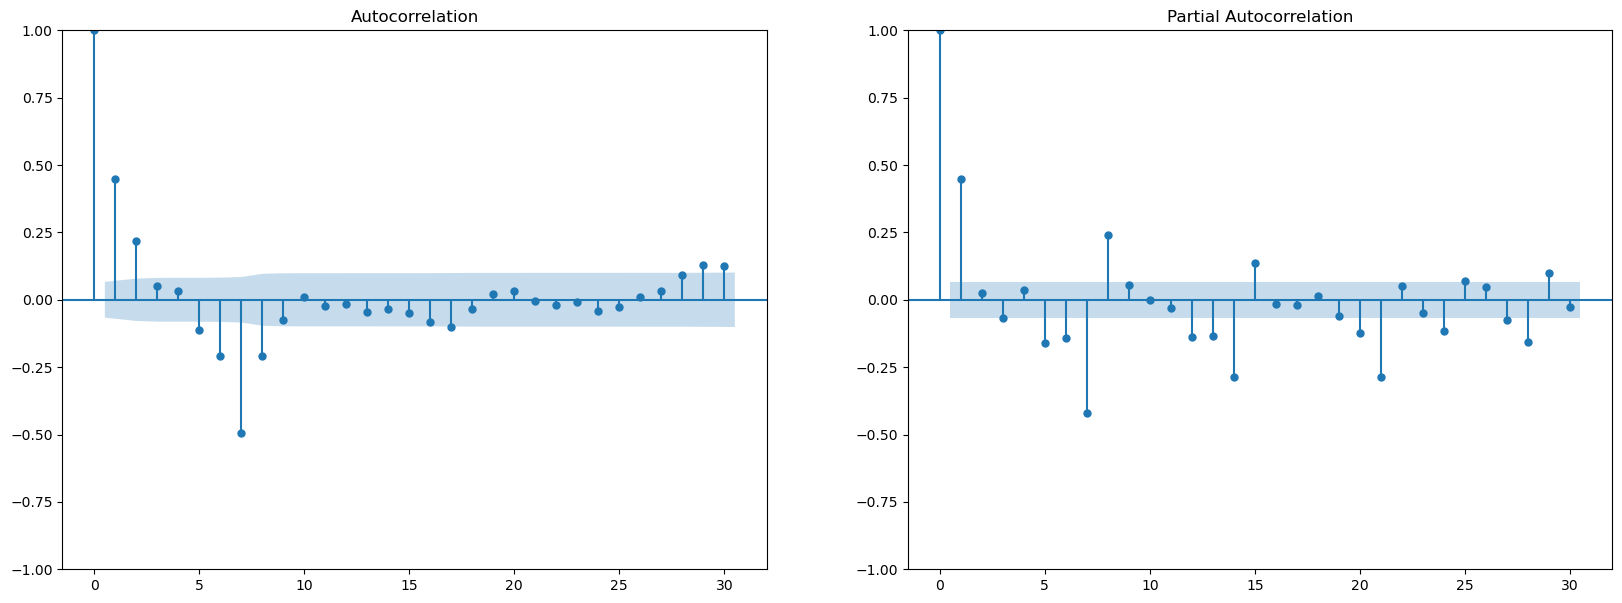

In [1364]:
###
fig,ax = plt.subplots(nrows = 1,ncols = 2 ,figsize =(20,7))
fig = plot_acf(err_tran_s_diff, ax=ax[0])
fig = plot_pacf(err_tran_s_diff,ax= ax[1])

### WE GET: Reiduals = SARIMA(1,0,2)(0,1,1)[7]

In [1365]:
## Fitting the residuals

In [2279]:
### Model Building for residuals
model_error_ar2 = SARIMAX(error_tran, order = (1,0,2),seasonal_order = (0, 1, 1, 7))
model_fit_x2 = model_error_ar2.fit()
model_fit_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  876
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 7)   Log Likelihood                -776.242
Date:                             Tue, 15 Aug 2023   AIC                           1562.485
Time:                                     22:44:44   BIC                           1586.322
Sample:                                 07-01-2020   HQIC                          1571.606
                                      - 11-23-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6011      0.085      7.087      0.000       0.435       0.767
ma.L1         -0.1571      0.089     -1.768      0.077      -0.331       0.017
ma.L2         -0.0386      0.063     -0.617      0.537      -0.161       0.084
ma.S.L7       -0.9107      0.015    -60.745      0.000      -0.940      -0.881
sigma2         0.3444      0.010     35.791      0.000       0.326       0.363
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1278.13
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2280]:
# Performing the Ljung-Box test on residuals of TES model
import statsmodels.api as sm
lags = 20  # Number of lags to test
results4 = sm.stats.acorr_ljungbox(model_fit_x2.resid, lags=lags)
print(results4)

      lb_stat  lb_pvalue
1    0.000683   0.979146
2    0.002551   0.998725
3    0.648413   0.885265
4    5.348691   0.253353
5    7.593906   0.180082
6    7.650287   0.264860
7    9.003546   0.252402
8    9.006370   0.341759
9    9.011523   0.436211
10  10.365080   0.409068
11  10.797739   0.460360
12  11.627177   0.476067
13  11.743152   0.548810
14  11.956125   0.609826
15  12.038599   0.676105
16  12.979094   0.674286
17  18.929145   0.332614
18  19.337466   0.371325
19  23.377044   0.221142
20  24.642626   0.215447


In [2281]:
DF_train_new['Final_fitted_val'] = fitted_valu + ((model_fit_x2.fittedvalues*error_val.std())+np.mean(error_val))

In [2282]:
DF_train_new.head()

Vol       Val    error_tes  Final_fitted_val
DATE                                                       
2020-07-01  5.1518  11611.71  2406.928419       9568.725276
2020-07-02  4.8196  10494.44  -229.042610      11087.427034
2020-07-03  5.0741  10735.45    89.578395      11009.815449
2020-07-04  4.9877  10114.58   261.657321      10216.866341
2020-07-05  4.3252   7115.05 -3922.159536      11401.153121

In [2283]:
DF_test['Final_predicted_val'] = DF_test['Predicted_values_val']+((model_fit_x2.predict(start = start_date,end=end_date)*error_val.std())+np.mean(error_val))
DF_test

Vol       Val  Predicted_values_val  Final_predicted_val
DATE                                                                    
2022-11-24  23.9062  37188.36          34476.488489         37450.931147
2022-11-25  24.1307  37146.94          37453.058895         38190.587940
2022-11-26  24.1445  35261.16          38705.408149         39222.080141
2022-11-27  23.4136  27955.44          42050.717550         34084.325798
2022-11-28  23.5987  38785.39          43314.370987         45495.151625
...             ...       ...                   ...                  ...
2023-06-26  30.2221  48619.69          52319.998693         54439.821486
2023-06-27  29.9957  47516.37          51690.342453         54030.101818
2023-06-28  31.3701  49897.31          58414.534253         59406.653526
2023-06-29  28.0597  37961.22          56250.563802         58619.173667
2023-06-30  31.2903  57747.14          57009.231166         57466.141259

[219 rows x 4 columns]

In [2284]:
####calculating the margin of error 

error_tes_f = DF_test['Val']-DF_test['Final_predicted_val']

mean_tes_f = error_tes_f.mean()

se_tes_f = error_tes_f.std()

ME_tes_f = 1.96*se_tes_f

ME_tes_f


9352.262594322834

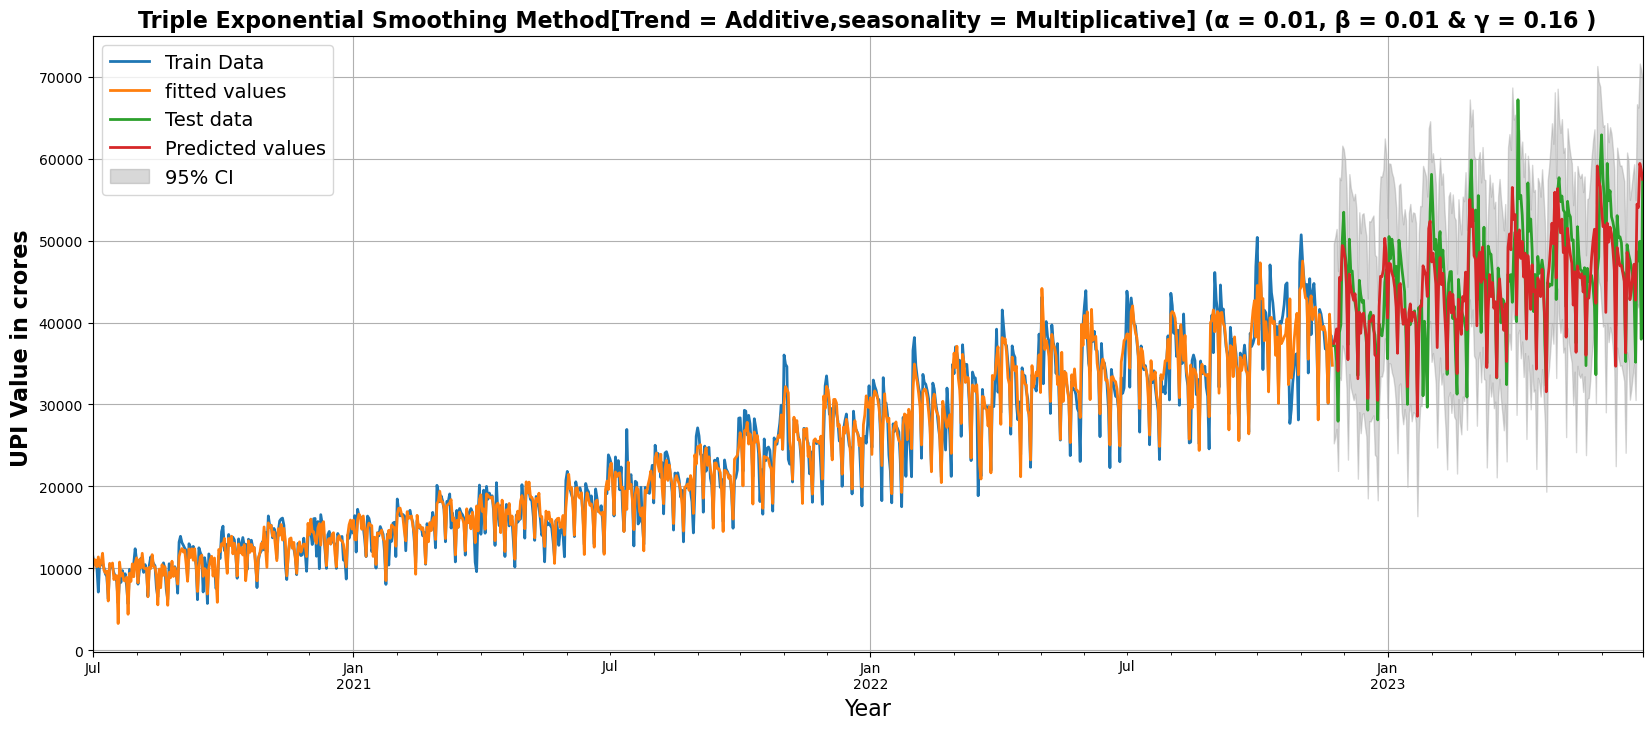

In [2287]:
## Visulaization

fig,ax= plt.subplots(figsize=(20,8))

DF_train_new['Val'].plot(kind='line',ax =ax,linewidth = 2)

DF_train_new['Final_fitted_val'].plot(kind='line',ax = ax,linewidth = 2)

## 

DF_test['Val'].plot(kind='line',linewidth=2,ax=ax)

DF_test['Final_predicted_val'].plot(kind='line',linewidth=2,ax=ax)

## margin of error

ci_plus = DF_test['Final_predicted_val'].values + ME_tes

ci_minus = DF_test['Final_predicted_val'].values - ME_tes

plt.fill_between(DF_test.index,(ci_plus),(ci_minus),alpha = 0.3,color = 'gray')


plt.xlabel('Year',fontsize=16)

plt.ylabel("UPI Value in crores ",fontsize=16,fontweight='bold')

plt.legend(['Train Data','fitted values','Test data','Predicted values','95% CI'],loc='upper left',fontsize=14)


plt.title("Triple Exponential Smoothing Method[Trend = Additive,seasonality = Multiplicative] (α = 0.01, β = 0.01 & γ = 0.16 )",fontsize=16,fontweight='bold')

plt.grid()

plt.show()

In [2286]:
rmse = np.sqrt(mean_squared_error(DF_train_new['Val'],DF_train_new['Final_fitted_val'])).round(2)
## MAE
mae = np.round(np.mean(np.abs(DF_train_new['Val']-DF_train_new['Final_fitted_val'])),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(DF_train_new['Val']-DF_train_new['Final_fitted_val'])/DF_train_new['Val'])*100,2)

tempResults = pd.DataFrame({'Method': [' Triple Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method    RMSE        MAE  MAPE
0   Triple Exponential Smoothing Method   2120.9  1470.1555  6.94

In [1374]:
rmse = np.sqrt(mean_squared_error(DF_test['Val'],DF_test['Final_predicted_val'])).round(2)
## MAE
mae = np.round(np.mean(np.abs(DF_test['Val']-DF_test['Final_predicted_val'])),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(DF_test['Val']-DF_test['Final_predicted_val'])/DF_test['Val'])*100,2)

tempResults = pd.DataFrame({'Method': [' Triple Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method     RMSE        MAE  MAPE
0   Triple Exponential Smoothing Method   4774.72  3594.8844  8.09

### Plotting the Adequacy metrics 

In [14]:
evmetrics_val_train = pd.read_excel('C:/Users/gauta/Downloads/Value_new_train_metrics.xlsx')

In [23]:
evmetrics_vol_train = pd.read_excel('C:/Users/gauta/OneDrive/Desktop/Vol_xyz.xlsx')

In [16]:
evmetrics_val_test = pd.read_excel('C:/Users/gauta/Downloads/Value_new_test_metrcs.xlsx')
evmetrics_vol_test = pd.read_excel('C:/Users/gauta/Downloads/value_new_matrices.xlsx')

In [17]:
evmetrics_val_train

Method             RMSE  \
0                              Polynomial Regression        3875.462   
1                                       ARIMA(1,1,1)         3631.17   
2  SARIMA(2,1,2)(0,1,1)[30]+SARIMA(2,0,2)(0,1,1)[...          2983.8   
3                                            Method   RMSE(70:10:20)   
4                Simple Exponential Smoothing Method         3773.95   
5                Double Exponential Smoothing Method         3846.43   
6                Triple Exponential Smoothing Method          2120.9   

             MAE            MAPE      Unnamed: 4     Unnamed: 5  \
0      2860.0646         13.7525             NaN            NaN   
1      2661.0734           12.72             NaN            NaN   
2        1705.55            9.14             NaN            NaN   
3  MAE(70:10:20)  MAPE(70:10:20)  RMSE(70:15:15)  MAE(70:15:15)   
4       2739.402           13.16         3877.89      2817.7471   
5      2793.0145           13.48          4286.2      3212.0898   
6      1470.1555            6.94         2143.17      1501.6859   

       Unnamed: 6  
0             NaN  
1             NaN  
2             NaN  
3  MAPE(70:15:15)  
4           13.01  
5            14.8  
6            6.86

In [24]:
evmetrics_vol_train

Method             RMSE  \
0                              Polynomial Regression          0.9144   
1                                       ARIMA(3,1,1)            0.71   
2  SARIMA(2,1,1)(0,1,1)[30]+SARIMA(0,0,0)(0,1,1)[...            1.15   
3                                            Method   RMSE(70:10:20)   
4                Simple Exponential Smoothing Method            0.71   
5                Double Exponential Smoothing Method            0.75   
6                Triple Exponential Smoothing Method            0.68   

             MAE            MAPE      Unnamed: 4     Unnamed: 5  \
0         0.6941          6.1452             NaN            NaN   
1         0.4818            4.33             NaN            NaN   
2           0.96            3.22             NaN            NaN   
3  MAE(70:10:20)  MAPE(70:10:20)  RMSE(70:15:15)  MAE(70:15:15)   
4         0.4843            4.26            3.84         3.3165   
5         0.5181            4.51            0.81         0.5905   
6         0.4555            3.91            0.64         0.4386   

       Unnamed: 6  
0             NaN  
1             NaN  
2             NaN  
3  MAPE(70:15:15)  
4           11.07  
5             4.9  
6            3.66

In [19]:
evmetrics_val_train_test

Method             RMSE  \
0                              Polynomial Regression       6602.7598   
1                                       ARIMA(1,1,1)         6668.49   
2  SARIMASARIMA(2,1,2)(0,1,1)[30]+SARIMA(2,0,2)(0...         4873.92   
3                                            Method   RMSE(70:10:20)   
4               Simple Exponential Smoothing Method(        10341.04   
5                Simple Exponential Smoothing Method         7843.95   
6                Triple Exponential Smoothing Method         4774.72   

             MAE            MAPE      Unnamed: 4     Unnamed: 5  \
0      5223.1367         12.4358             NaN            NaN   
1      5138.4154           11.57             NaN            NaN   
2        3627.45            8.34             NaN            NaN   
3  MAE(70:10:20)  MAPE(70:10:20)  RMSE(70:15:15)  MAE(70:15:15)   
4      8673.1022           18.11         9114.18      7500.8699   
5      6298.8566            13.5         7659.57      6019.3562   
6      3594.8844            8.09         4498.61      3125.3085   

       Unnamed: 6  
0             NaN  
1             NaN  
2             NaN  
3  MAPE(70:15:15)  
4           15.47  
5           14.08  
6            6.87

In [20]:
evmetrics_vol_train_test

Method             RMSE  \
0                              Polynomial Regression           1.669   
1                                       ARIMA(3,1,1)            1.81   
2  SARIMA(2,1,1)(0,1,1)[30]+SARIMA(0,0,0)(0,1,1)[...             0.7   
3                                             Method  RMSE(70:10:20)   
4                Simple Exponential Smoothing Method            4.72   
5                Double Exponential Smoothing Method            1.18   
6                Triple Exponential Smoothing Method            1.43   

             MAE            MAPE      Unnamed: 4     Unnamed: 5  \
0         1.3539          4.9127             NaN            NaN   
1         1.4635            5.02             NaN            NaN   
2           0.45            4.25             NaN            NaN   
3  MAE(70:10:20)  MAPE(70:10:20)  RMSE(70:15:15)  MAE(70:15:15)   
4         4.0923           13.99            0.72         0.4921   
5         0.9812            3.49             1.4         1.1398   
6         0.9934            3.61            1.02         0.7186   

       Unnamed: 6  
0             NaN  
1             NaN  
2             NaN  
3  MAPE(70:15:15)  
4            4.15  
5            4.02  
6            2.52

## TRAINING THE FINAL MODEL WITH TES AND FORECASTING

### 1. UPI Volume

In [2065]:
df_copy

Vol       Val
DATE                         
2020-07-01   5.1518  11611.71
2020-07-02   4.8196  10494.44
2020-07-03   5.0741  10735.45
2020-07-04   4.9877  10114.58
2020-07-05   4.3252   7115.05
...             ...       ...
2023-06-26  30.2221  48619.69
2023-06-27  29.9957  47516.37
2023-06-28  31.3701  49897.31
2023-06-29  28.0597  37961.22
2023-06-30  31.2903  57747.14

[1095 rows x 2 columns]

In [2066]:
### 
start_date = datetime.strptime('2023-07-01','%Y-%m-%d')
end_date = datetime.strptime('2023-12-31','%Y-%m-%d')

In [2067]:
import pandas as pd

# Generate a date range from '2023-05-13' to '2023-11-13' (inclusive)
date_range = pd.date_range(start='2023-07-01', end='2023-12-31', freq='D')

# Create a DataFrame with the date column
df_forecast = pd.DataFrame({'Date': date_range})

# Display the DataFrame
df_forecast.head()

Date
0 2023-07-01
1 2023-07-02
2 2023-07-03
3 2023-07-04
4 2023-07-05

In [2068]:
df_forecast.set_index('Date', inplace = True)

In [2069]:
df_forecast.head()

Empty DataFrame
Columns: []
Index: [2023-07-01 00:00:00, 2023-07-02 00:00:00, 2023-07-03 00:00:00, 2023-07-04 00:00:00, 2023-07-05 00:00:00]

In [2070]:
df_final = df_copy.copy()

In [2071]:
## Building the model
alpha = 0.01
beta = 0.01
gamma = 0.16
seasonal_period = 30  # Assuming monthly seasonality
triple_exp_model_final = ExponentialSmoothing(df_final['Vol'], trend='mul', seasonal='add', seasonal_periods=seasonal_period)
triple_exp_fit_final = triple_exp_model_final.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
triple_exp_fit_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                      Vol   No. Observations:                 1095
Model:             ExponentialSmoothing   SSE                            838.312
Optimized:                         True   AIC                           -224.496
Trend:                   Multiplicative   BIC                            -54.546
Seasonal:                      Additive   AICC                          -221.978
Seasonal Periods:                    30   Date:                 Tue, 15 Aug 2023
Box-Cox:                          False   Time:                         20:00:02
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0100000                alpha                False
smoothing_trend               0.0100000                 beta                False
smoothing_seasonal            0.1600000                gamma                False
initial_level                 26.286685                  l.0                 True
initial_trend                 1.0005257                  b.0                 True
initial_seasons.0            -21.690338                  s.0                 True
initial_seasons.1            -21.691240                  s.1                 True
initial_seasons.2            -21.448321                  s.2                 True
initial_seasons.3            -21.360259                  s.3                 True
initial_seasons.4            -21.496296                  s.4                 True
initial_seasons.5            -21.412683                  s.5                 True
initial_seasons.6            -21.317921                  s.6                 True
initial_seasons.7            -21.295054                  s.7                 True
initial_seasons.8            -21.161141                  s.8                 True
initial_seasons.9            -21.277442                  s.9                 True
initial_seasons.10           -21.322393                 s.10                 True
initial_seasons.11           -21.204005                 s.11                 True
initial_seasons.12           -21.126504                 s.12                 True
initial_seasons.13           -21.188958                 s.13                 True
initial_seasons.14           -21.393114                 s.14                 True
initial_seasons.15           -21.323244                 s.15                 True
initial_seasons.16           -21.492284                 s.16                 True
initial_seasons.17           -21.553456                 s.17                 True
initial_seasons.18           -21.925767                 s.18                 True
initial_seasons.19           -21.513416                 s.19                 True
initial_seasons.20           -21.556404                 s.20                 True
initial_seasons.21           -21.690936                 s.21                 True
initial_seasons.22           -21.618292                 s.22                 True
initial_seasons.23           -21.727036                 s.23                 True
initial_seasons.24           -21.674731                 s.24                 True
initial_seasons.25           -21.825907                 s.25                 True
initial_seasons.26           -21.827860                 s.26                 True
initial_seasons.27           -21.998518                 s.27                 True
initial_seasons.28           -21.858697                 s.28                 True
initial_seasons.29           -21.780519                 s.29                 True
--------------------------

In [2072]:
df_forecast['Forecasted_values_vol_ini'] = triple_exp_fit_final.forecast(len(df_forecast))

In [2073]:
## Modeeling the residuals

In [2074]:
df_final['error'] = df_final['Vol']-triple_exp_fit_final.fittedvalues

In [2075]:
# ###
# fig,ax = plt.subplots(nrows = 1,ncols = 2 ,figsize =(20,7))
# fig = plot_acf(df_final['error'], ax=ax[0])
# fig = plot_pacf(df_final['error'],ax= ax[1])

In [2076]:
# ## test for stationary on the Residuals of the TES model for UPI Value
# import statsmodels.tsa.stattools as sts
# sts.adfuller(df_final['error'])

In [2077]:
#err_tr_diff = df_final['error'].diff().dropna()

In [2078]:
#err_ses_diff = err_tr_diff.diff(7).dropna()

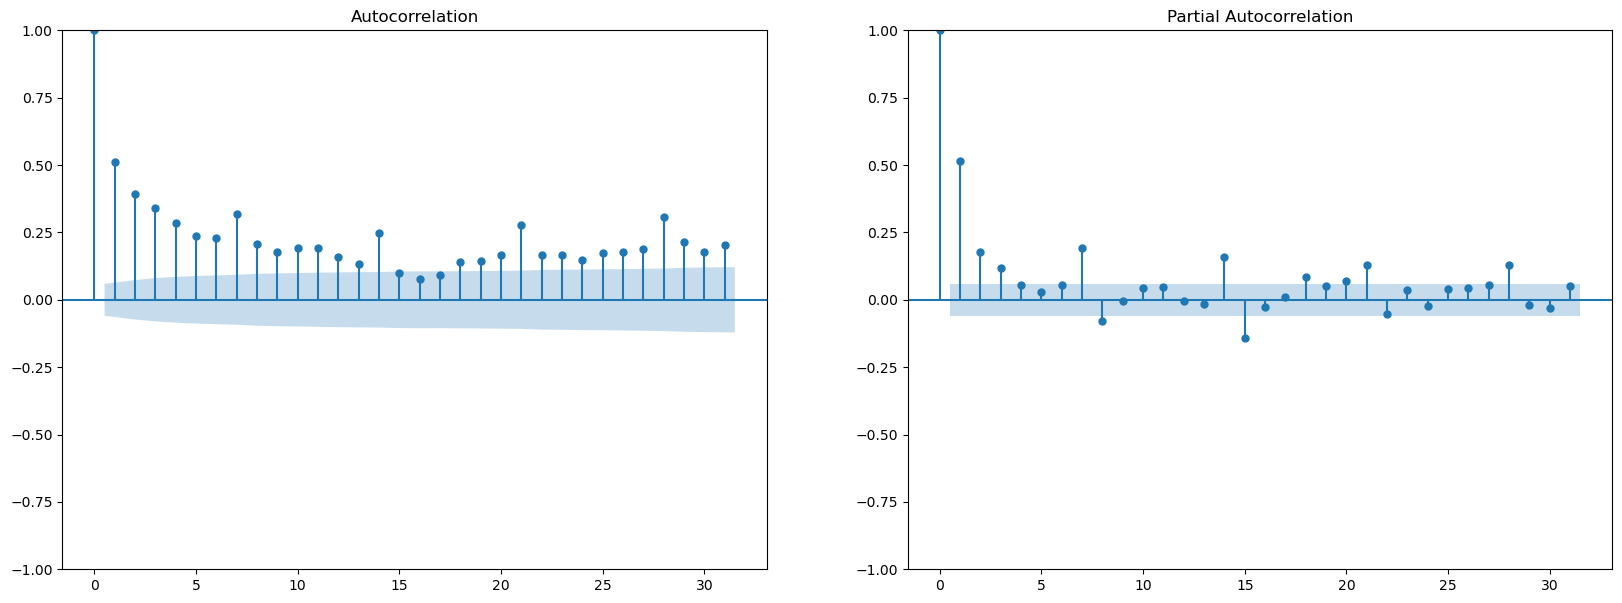

In [2079]:
###
fig,ax = plt.subplots(nrows = 1,ncols = 2 ,figsize =(20,7))
fig = plot_acf(df_final['error'], ax=ax[0])
fig = plot_pacf(df_final['error'],ax= ax[1])

In [2080]:
## test for stationary on the Residuals of the TES model for UPI Value
import statsmodels.tsa.stattools as sts
sts.adfuller(df_final['error'])

(-3.8463886059624404,
 0.00246680651854856,
 21,
 1073,
 {'1%': -3.436459052172655,
  '5%': -2.864237372528562,
  '10%': -2.568206176974609},
 2293.1769635867076)

In [2081]:
##3

In [2082]:
errr_ses_diff = df_final['error'].diff(7).dropna()

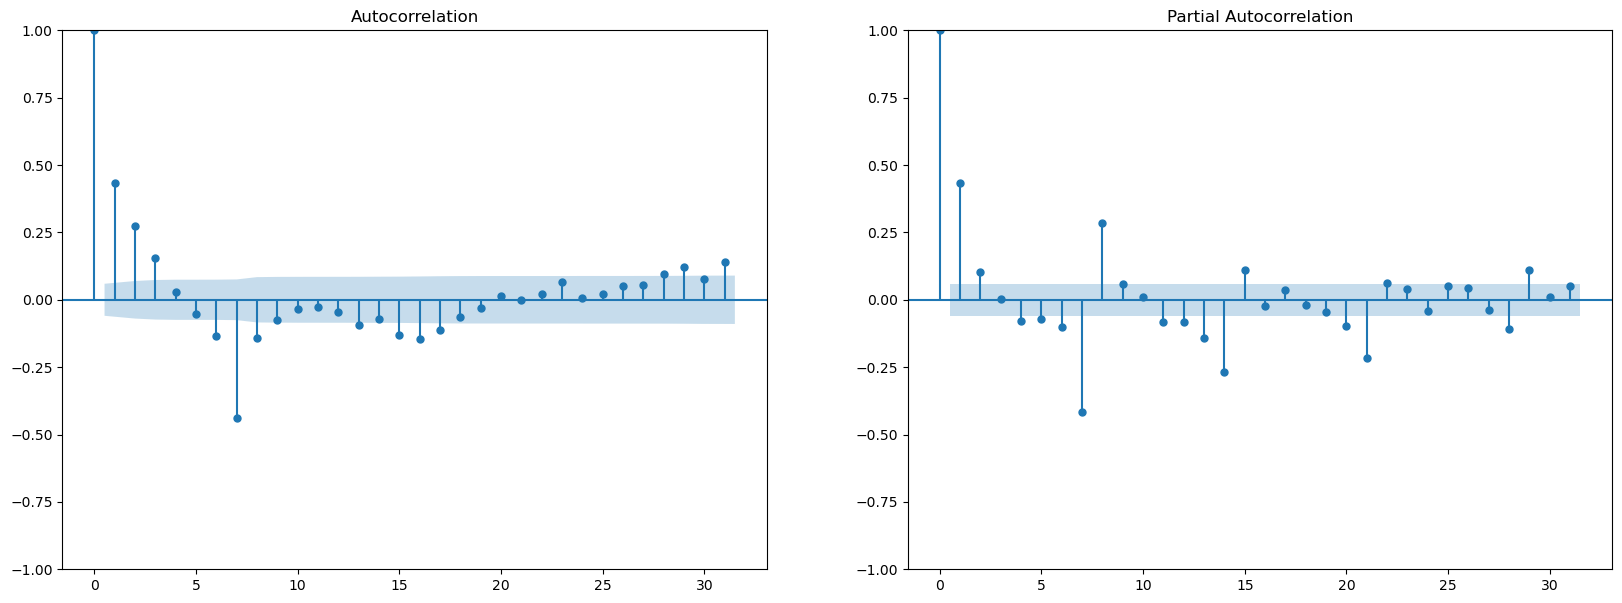

In [2083]:
fig,ax = plt.subplots(nrows = 1,ncols = 2 ,figsize =(20,7))
fig = plot_acf(errr_ses_diff, ax=ax[0])
fig = plot_pacf(errr_ses_diff,ax= ax[1])

In [2084]:
### Model Building for residuals
model_error = SARIMAX(df_final['error'], order = (1,0,3),seasonal_order = (0, 1, 1, 7))
model_fit_x = model_error.fit()
model_fit_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               error   No. Observations:                 1095
Model:             SARIMAX(1, 0, 3)x(0, 1, [1], 7)   Log Likelihood               -1111.361
Date:                             Tue, 15 Aug 2023   AIC                           2234.723
Time:                                     20:00:26   BIC                           2264.675
Sample:                                 07-01-2020   HQIC                          2246.060
                                      - 06-30-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8962      0.024     37.491      0.000       0.849       0.943
ma.L1         -0.4566      0.030    -15.339      0.000      -0.515      -0.398
ma.L2         -0.0944      0.030     -3.184      0.001      -0.153      -0.036
ma.L3         -0.0231      0.027     -0.852      0.394      -0.076       0.030
ma.S.L7       -0.9630      0.009   -102.123      0.000      -0.981      -0.945
sigma2         0.4443      0.010     44.777      0.000       0.425       0.464
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1820.69
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.08   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2085]:
forecasted_error_ar1 = model_fit_x.predict(start = start_date,end=end_date)
forecasted_error_ar1

2023-07-01   -0.963480
2023-07-02   -1.806968
2023-07-03   -1.124833
2023-07-04   -0.966865
2023-07-05   -0.599924
                ...   
2023-12-27    0.153992
2023-12-28   -0.166505
2023-12-29   -0.014712
2023-12-30    0.252468
2023-12-31   -0.766929
Freq: D, Name: predicted_mean, Length: 184, dtype: float64

In [2086]:
df_forecast['Final_forecast_vol'] = df_forecast['Forecasted_values_vol_ini']+forecasted_error_ar1

In [2087]:
df_fianl['Fitted_values'] = model_fit_x.fittedvalues + triple_exp_fit_final.fittedvalues

In [2088]:
## margin of error
####calculating the margin of error 
error_fin = df_final['Vol']-df_fianl['Fitted_values']
mean_tes = error_fin.mean()
se_fin = error_fin.std()
ME_fin = 1.645*se_fin
ME_fin

1.0966535316379247

In [2089]:
rmse = np.sqrt(mean_squared_error(df_final['Vol'],df_fianl['Fitted_values'])).round(2)
## MAE
mae = np.round(np.mean(np.abs(df_final['Vol']-df_fianl['Fitted_values'])),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(df_final['Vol']-df_fianl['Fitted_values'])/df_final['Vol'])*100,2)

tempResults = pd.DataFrame({'Method': [' Triple Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method  RMSE     MAE  MAPE
0   Triple Exponential Smoothing Method   0.67  0.4505  3.28

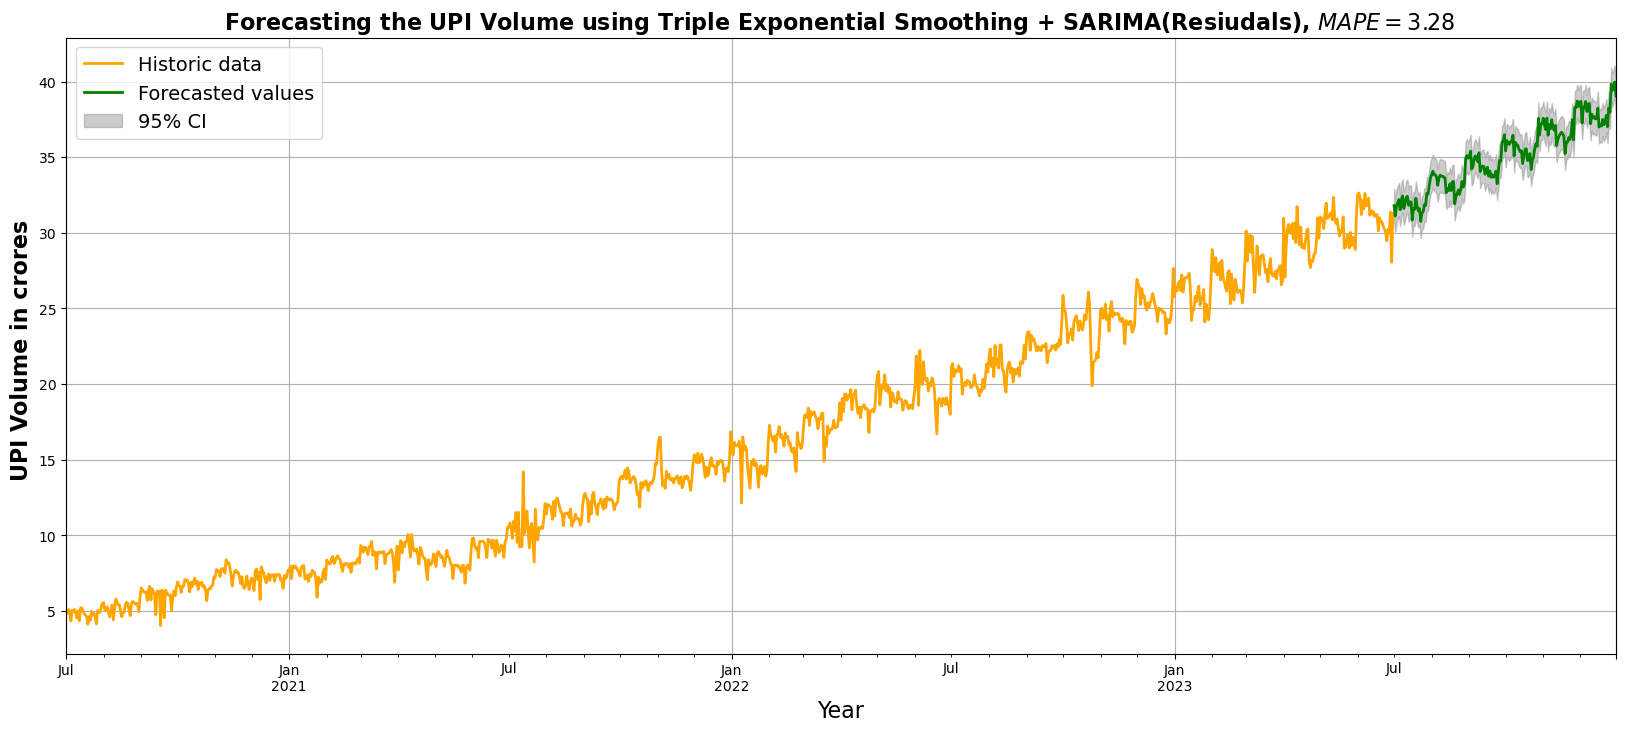

In [2090]:
### 
## with ## Confidence Interval
## Visulaization
fig,ax= plt.subplots(figsize=(20,8))
df_final['Vol'].plot(kind='line',ax =ax,linewidth = 2,color = 'orange')
## 
df_forecast['Final_forecast_vol'].plot(kind='line',linewidth=2,ax=ax,color='green')
## margin of error
ci_plus = df_forecast['Final_forecast_vol'].values + ME_fin
ci_minus = df_forecast['Final_forecast_vol'].values - ME_fin
plt.fill_between(df_forecast.index,(ci_plus),(ci_minus),alpha = 0.4,color = 'gray')



plt.xlabel('Year',fontsize=16)
plt.ylabel("UPI Volume in crores ",fontsize=16,fontweight ='bold')
plt.legend(['Historic data','Forecasted values','95% CI'],loc='upper left',fontsize=14)

plt.title("Forecasting the UPI Volume using Triple Exponential Smoothing + SARIMA(Resiudals), $ MAPE = 3.28 $ ",fontsize=16,fontweight ='bold')
plt.grid()
plt.show()

In [2091]:
## Storing the forecasted values

In [2092]:
df_forecast.head()

Forecasted_values_vol_ini  Final_forecast_vol
Date                                                     
2023-07-01                  32.761794           31.798314
2023-07-02                  32.916386           31.109418
2023-07-03                  32.869063           31.744230
2023-07-04                  32.958633           31.991768
2023-07-05                  32.793906           32.193982

In [2093]:
del df_forecast['Forecasted_values_vol_ini']

In [2094]:
Final_forecast = df_forecast.copy()
Final_forecast.head()

Final_forecast_vol
Date                          
2023-07-01           31.798314
2023-07-02           31.109418
2023-07-03           31.744230
2023-07-04           31.991768
2023-07-05           32.193982

In [2095]:
Final_forecast['Lower_bound_90%'] = Final_forecast['Final_forecast_vol']-ME_fin
Final_forecast['Upper_bound_90%'] = Final_forecast['Final_forecast_vol']+ME_fin


In [2096]:
Final_forecast.head(30)

Final_forecast_vol  Lower_bound_90%  Upper_bound_90%
Date                                                            
2023-07-01           31.798314        30.701661        32.894968
2023-07-02           31.109418        30.012765        32.206072
2023-07-03           31.744230        30.647576        32.840883
2023-07-04           31.991768        30.895115        33.088422
2023-07-05           32.193982        31.097329        33.290636
2023-07-06           31.523741        30.427087        32.620394
2023-07-07           32.223478        31.126824        33.320131
2023-07-08           32.442791        31.346137        33.539444
2023-07-09           31.608545        30.511892        32.705199
2023-07-10           31.894335        30.797682        32.990989
2023-07-11           32.318053        31.221399        33.414706
2023-07-12           32.420050        31.323397        33.516704
2023-07-13           31.812985        30.716331        32.909638
2023-07-14           32.043417        30.946764        33.140071
2023-07-15           32.026488        30.929835        33.123142
2023-07-16           30.836774        29.740120        31.933427
2023-07-17           31.605393        30.508739        32.702046
2023-07-18           31.562687        30.466033        32.659340
2023-07-19           32.289165        31.192511        33.385818
2023-07-20           31.739739        30.643086        32.836393
2023-07-21           31.440945        30.344292        32.537599
2023-07-22           31.602754        30.506101        32.699408
2023-07-23           30.748898        29.652244        31.845551
2023-07-24           31.302710        30.206056        32.399363
2023-07-25           31.399177        30.302523        32.495830
2023-07-26           31.861564        30.764911        32.958218
2023-07-27           31.808475        30.711822        32.905129
2023-07-28           32.612307        31.515654        33.708961
2023-07-29           32.556750        31.460096        33.653403
2023-07-30           33.112920        32.016267        34.209574

In [2097]:
s1 = np.sum(Final_forecast['Final_forecast_vol'][:31].values)

In [2098]:
s1

989.2460210848857

In [2099]:
excel_file_path = "C:/Users/gauta/OneDrive/Desktop//VOLUME_90%.xlsx"

In [2100]:
Final_forecast.to_excel(excel_file_path, index=True)

`## 2. UPI Value

## 2. UPI Value

In [2038]:
import pandas as pd

# Generate a date range from '2023-05-13' to '2023-11-13' (inclusive)
date_range = pd.date_range(start='2023-07-01', end='2023-12-31', freq='D')

# Create a DataFrame with the date column
df_forecast = pd.DataFrame({'Date': date_range})

# Display the DataFrame
df_forecast.head()

Date
0 2023-07-01
1 2023-07-02
2 2023-07-03
3 2023-07-04
4 2023-07-05

In [2039]:
df_forecast.set_index('Date', inplace = True)

In [2040]:
df_final = df_copy.copy()

In [2041]:
## Building the model
alpha = 0.01
beta = 0.01
gamma = 0.16
seasonal_period = 30  # Assuming monthly seasonality
triple_exp_model_final_val = ExponentialSmoothing(df_final['Val'], trend='add', seasonal='mul', seasonal_periods=seasonal_period)
triple_exp_fit_final_val = triple_exp_model_final_val.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
triple_exp_fit_final_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                      Val   No. Observations:                 1095
Model:             ExponentialSmoothing   SSE                    19075113254.822
Optimized:                         True   AIC                          18325.089
Trend:                         Additive   BIC                          18495.038
Seasonal:                Multiplicative   AICC                         18327.607
Seasonal Periods:                    30   Date:                 Tue, 15 Aug 2023
Box-Cox:                          False   Time:                         19:55:26
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0100000                alpha                False
smoothing_trend               0.0100000                 beta                False
smoothing_seasonal            0.1600000                gamma                False
initial_level                 9284.4311                  l.0                 True
initial_trend                 0.1882495                  b.0                 True
initial_seasons.0             0.9914011                  s.0                 True
initial_seasons.1             1.1519072                  s.1                 True
initial_seasons.2             1.1437641                  s.2                 True
initial_seasons.3             1.0584351                  s.3                 True
initial_seasons.4             1.1852840                  s.4                 True
initial_seasons.5             1.0613455                  s.5                 True
initial_seasons.6             1.1225796                  s.6                 True
initial_seasons.7             1.0169993                  s.7                 True
initial_seasons.8             1.1329996                  s.8                 True
initial_seasons.9             1.0219857                  s.9                 True
initial_seasons.10            1.0271148                 s.10                 True
initial_seasons.11            1.1031419                 s.11                 True
initial_seasons.12            1.0316144                 s.12                 True
initial_seasons.13            1.0933574                 s.13                 True
initial_seasons.14            0.9610299                 s.14                 True
initial_seasons.15            0.9976031                 s.15                 True
initial_seasons.16            0.9609662                 s.16                 True
initial_seasons.17            0.9862213                 s.17                 True
initial_seasons.18            0.8036282                 s.18                 True
initial_seasons.19            0.9465569                 s.19                 True
initial_seasons.20            0.9922527                 s.20                 True
initial_seasons.21            0.8953702                 s.21                 True
initial_seasons.22            0.9516152                 s.22                 True
initial_seasons.23            0.9043685                 s.23                 True
initial_seasons.24            0.9527407                 s.24                 True
initial_seasons.25            0.8464457                 s.25                 True
initial_seasons.26            0.8931953                 s.26                 True
initial_seasons.27            0.8758516                 s.27                 True
initial_seasons.28            0.8926449                 s.28                 True
initial_seasons.29            0.9975802                 s.29                 True
--------------------------

In [2042]:
# ## Building the model
# alpha = 0.01
# beta = 0.01
# gamma = 0.16
# seasonal_period = 30  # Assuming monthly seasonality
# triple_exp_model_final_val = ExponentialSmoothing(df_final['Val'], trend='add', seasonal='mul', seasonal_periods=seasonal_period,boxcox = True)
# triple_exp_fit_final_val = triple_exp_model_final_val.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
# triple_exp_fit_final_val.summary()

In [2043]:
df_forecast['Forecasted_values_val_ini'] = triple_exp_fit_final_val.forecast(len(df_forecast))

In [2044]:
df_final['error'] = df_final['Val']-triple_exp_fit_final_val.fittedvalues

In [2045]:
df_final['error']

DATE
2020-07-01     2406.928419
2020-07-02     -229.042610
2020-07-03       89.578395
2020-07-04      261.657321
2020-07-05    -3922.159536
                  ...     
2023-06-26     1076.522346
2023-06-27     -565.175705
2023-06-28    -3516.869945
2023-06-29   -16798.387098
2023-06-30       54.421488
Name: error, Length: 1095, dtype: float64

In [2046]:
## test for stationary on the Residuals of the TES model for UPI Value
import statsmodels.tsa.stattools as sts
sts.adfuller(df_final['error'])

(-6.797807782525151,
 2.277238959316969e-09,
 21,
 1073,
 {'1%': -3.436459052172655,
  '5%': -2.864237372528562,
  '10%': -2.568206176974609},
 19965.917465098784)

In [2047]:
errr_ses_diff = df_final['error'].diff(7).dropna()

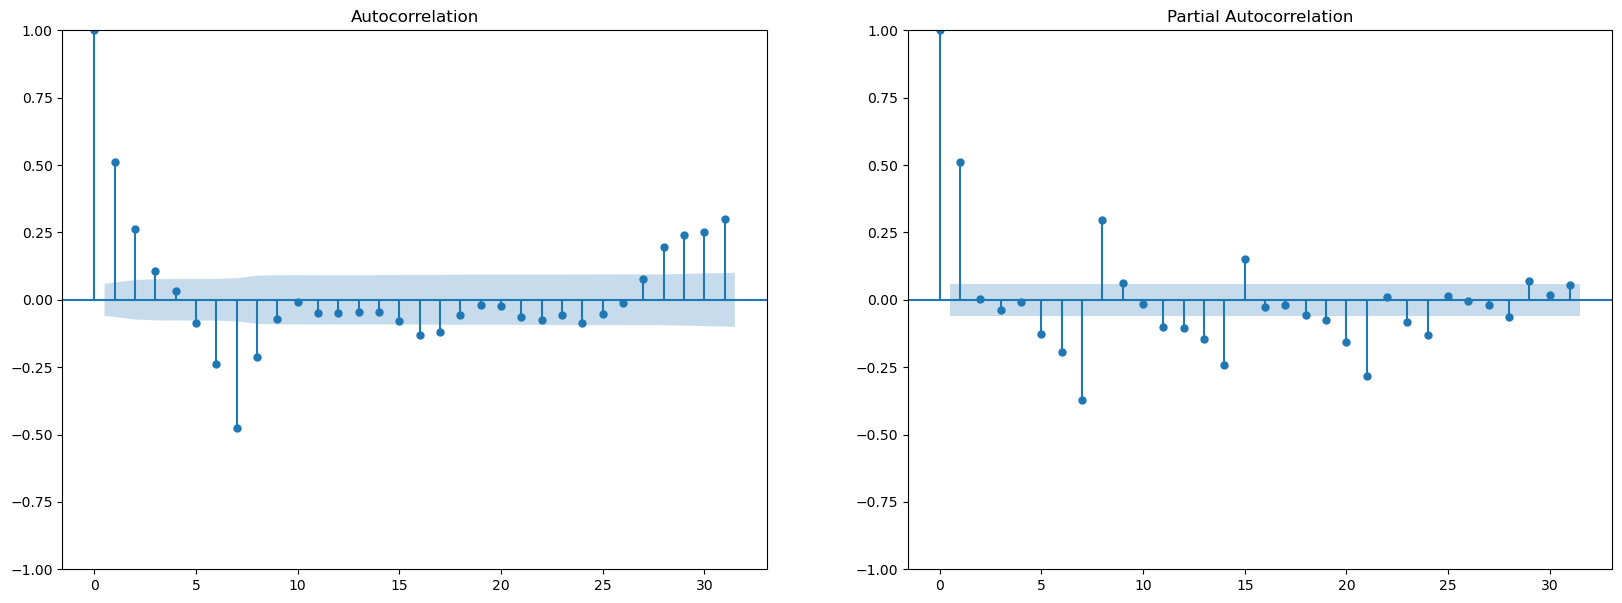

In [2048]:
fig,ax = plt.subplots(nrows = 1,ncols = 2 ,figsize =(20,7))
fig = plot_acf(errr_ses_diff, ax=ax[0])
fig = plot_pacf(errr_ses_diff,ax= ax[1])

In [2049]:
err_tra = (df_final['error']-np.mean(df_final['error'].values))/df_final['error'].values.std()

In [2050]:
### Model Building for residuals
model_error = SARIMAX(err_tra, order = (1,0,3),seasonal_order = (0, 1, 1, 7))
model_fit_x = model_error.fit()
model_fit_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               error   No. Observations:                 1095
Model:             SARIMAX(1, 0, 3)x(0, 1, [1], 7)   Log Likelihood                -968.005
Date:                             Tue, 15 Aug 2023   AIC                           1948.010
Time:                                     19:55:43   BIC                           1977.963
Sample:                                 07-01-2020   HQIC                          1959.348
                                      - 06-30-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5628      0.132      4.259      0.000       0.304       0.822
ma.L1         -0.0746      0.133     -0.559      0.576      -0.336       0.187
ma.L2         -0.0049      0.073     -0.066      0.947      -0.149       0.139
ma.L3          0.0010      0.050      0.021      0.983      -0.097       0.099
ma.S.L7       -0.9190      0.011    -81.269      0.000      -0.941      -0.897
sigma2         0.3428      0.008     44.868      0.000       0.328       0.358
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2147.83
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.76   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2051]:
forecasted_error_ar1 = model_fit_x.predict(start = start_date,end=end_date)
forecasted_error_ar1

2023-07-01   -0.365504
2023-07-02   -2.689993
2023-07-03    0.792094
2023-07-04    0.586854
2023-07-05    0.369369
                ...   
2023-12-27    0.386534
2023-12-28    0.132366
2023-12-29   -0.039578
2023-12-30   -0.212192
2023-12-31   -2.589830
Freq: D, Name: predicted_mean, Length: 184, dtype: float64

In [2052]:
df_final['Final_predicted'] = ((model_fit_x.fittedvalues*df_final['error'].values.std())+np.mean(df_final['error']))+triple_exp_fit_final_val.fittedvalues

In [2053]:
df_forecast['Fianl_forecast_val'] =df_forecast['Forecasted_values_val_ini'] + (forecasted_error_ar1*df_final['error'].values.std())+ np.mean(df_final['error'].values)

In [2054]:
## margin of error
####calculating the margin of error 
error_fin = df_final['Val']-df_final['Final_predicted']
mean_tes = error_fin.mean()
se_fin = error_fin.std()
ME_fin = 1.645*se_fin
ME_fin

4007.676433611407

In [2055]:
## FINAL MAPE

In [2056]:
rmse = np.sqrt(mean_squared_error(df_final['Val'],df_final['Final_predicted'])).round(2)
## MAE
mae = np.round(np.mean(np.abs(df_final['Val']-df_final['Final_predicted'])),4)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(df_final['Val']-df_final['Final_predicted'])/df_final['Val'])*100,2)

tempResults = pd.DataFrame({'Method': [' Triple Exponential Smoothing Method '], 'RMSE':[rmse],'MAE': [mae], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
#tempResults = pd.concat([tempResults,simple_exp])
tempResults

Method     RMSE        MAE  MAPE
0   Triple Exponential Smoothing Method   2435.24  1652.7358  6.65

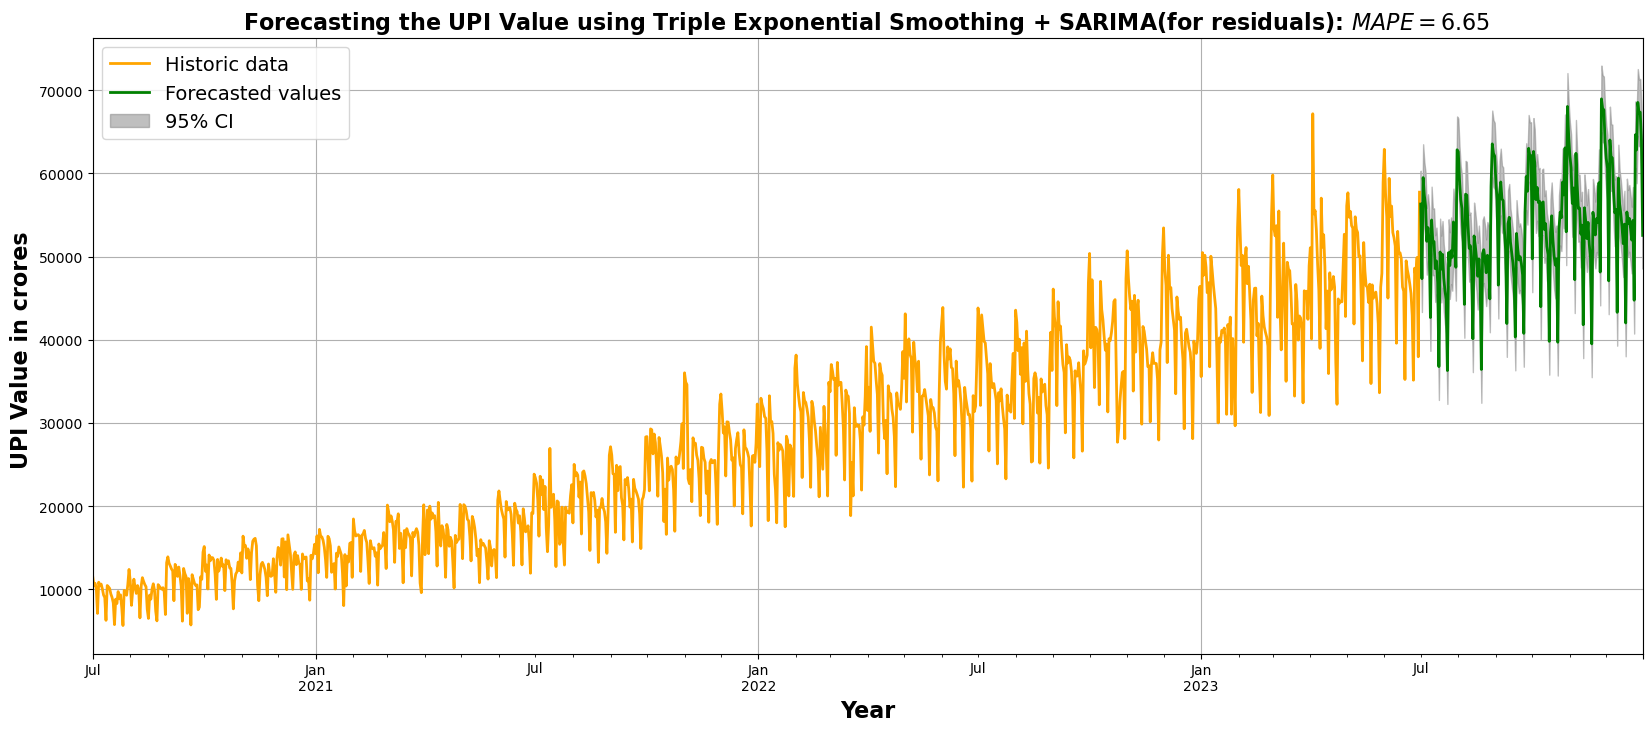

In [2057]:
### 
## with ## Confidence Interval
## Visulaization
fig,ax= plt.subplots(figsize=(20,8))
df_final['Val'].plot(kind='line',ax =ax,linewidth = 2,color = 'orange')
## 
df_forecast['Fianl_forecast_val'].plot(kind='line',linewidth=2,ax=ax,color='green')
## margin of error
ci_plus = df_forecast['Fianl_forecast_val'].values + ME_fin
ci_minus = df_forecast['Fianl_forecast_val'].values - ME_fin
plt.fill_between(df_forecast.index,(ci_plus),(ci_minus),alpha = 0.5,color = 'gray')



plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel("UPI Value in crores ",fontsize=16,fontweight='bold')
plt.legend(['Historic data','Forecasted values','95% CI'],loc='upper left',fontsize=14)

plt.title("Forecasting the UPI Value using Triple Exponential Smoothing + SARIMA(for residuals): $ MAPE = 6.65 $ ",fontsize=16,fontweight='bold' )
plt.grid()
plt.show()

In [2058]:
df_forecast.head()

Forecasted_values_val_ini  Fianl_forecast_val
Date                                                     
2023-07-01               57521.158768        56319.124553
2023-07-02               58224.199913        47348.711470
2023-07-03               55885.320205        59500.675410
2023-07-04               54600.120594        57361.361372
2023-07-05               54251.750901        56107.920946

In [2059]:
del df_forecast['Forecasted_values_val_ini']

In [2060]:
Final_forecast = df_forecast.copy()
Final_forecast.head()

Fianl_forecast_val
Date                          
2023-07-01        56319.124553
2023-07-02        47348.711470
2023-07-03        59500.675410
2023-07-04        57361.361372
2023-07-05        56107.920946

In [2061]:
Final_forecast['Lower_bound_90%'] = Final_forecast['Fianl_forecast_val']-ME_fin
Final_forecast['Upper_bound_90%'] = Final_forecast['Fianl_forecast_val']+ME_fin

In [2062]:
Final_forecast.head()

Fianl_forecast_val  Lower_bound_90%  Upper_bound_90%
Date                                                            
2023-07-01        56319.124553     52311.448119     60326.800987
2023-07-02        47348.711470     43341.035036     51356.387903
2023-07-03        59500.675410     55492.998977     63508.351844
2023-07-04        57361.361372     53353.684938     61369.037805
2023-07-05        56107.920946     52100.244512     60115.597379

In [2063]:
excel_file_path = "C:/Users/gauta/OneDrive/Desktop//UPI_Value_90%.xlsx"

In [2064]:
Final_forecast.to_excel(excel_file_path, index=True)

In [2011]:
df_check = Df_copy[1125:].copy()

In [2012]:
df_check.DATE = pd.to_datetime(df_check.DATE,dayfirst=True)
df_check.set_index('DATE',inplace = True)

In [2013]:
df_check

Vol        Val
DATE                         
2023-07-01  3395.43  61917.81
2023-07-02  3292.24  47229.91
2023-07-03  3289.63  59189.38
2023-07-04  3304.41  59449.73
2023-07-05  3312.82  59459.28
2023-07-06  3256.93  56399.50
2023-07-07  3298.22  55271.86
2023-07-08  3264.78  50571.15
2023-07-09  3195.43  41980.62
2023-07-10  3317.95  60484.85
2023-07-11  3266.74  53967.69
2023-07-12  3314.67  53590.28
2023-07-13  3237.53  50613.67
2023-07-14  3225.96  47947.78
2023-07-15  3175.55  47729.74
2023-07-16  3208.67  38071.82
2023-07-17  3170.26  48124.93
2023-07-18  3117.13  46846.49
2023-07-19  3154.42  47849.70
2023-07-20  3153.75  47608.52
2023-07-21  3152.82  45577.50
2023-07-22  3136.92  42238.88
2023-07-23  3093.14  34416.57
2023-07-24  3110.05  48206.15
2023-07-25  3079.47  46984.69
2023-07-26  3107.65  46067.19
2023-07-27  3140.61  45734.03
2023-07-28  3152.33  46273.69
2023-07-29  3167.06  42690.11
2023-07-30  3172.10  36936.18
2023-07-31  3377.89  64106.76
2023-08-01  3552.48  66969.23
2023-08-02  3456.88  62307.11
2023-08-03  3485.69  59287.21
2023-08-04  3447.93  57716.61
2023-08-05  3562.42  57820.12
2023-08-06  2988.15  36438.50
2023-08-07  3591.07  63298.71
2023-08-08  3492.43  55950.61

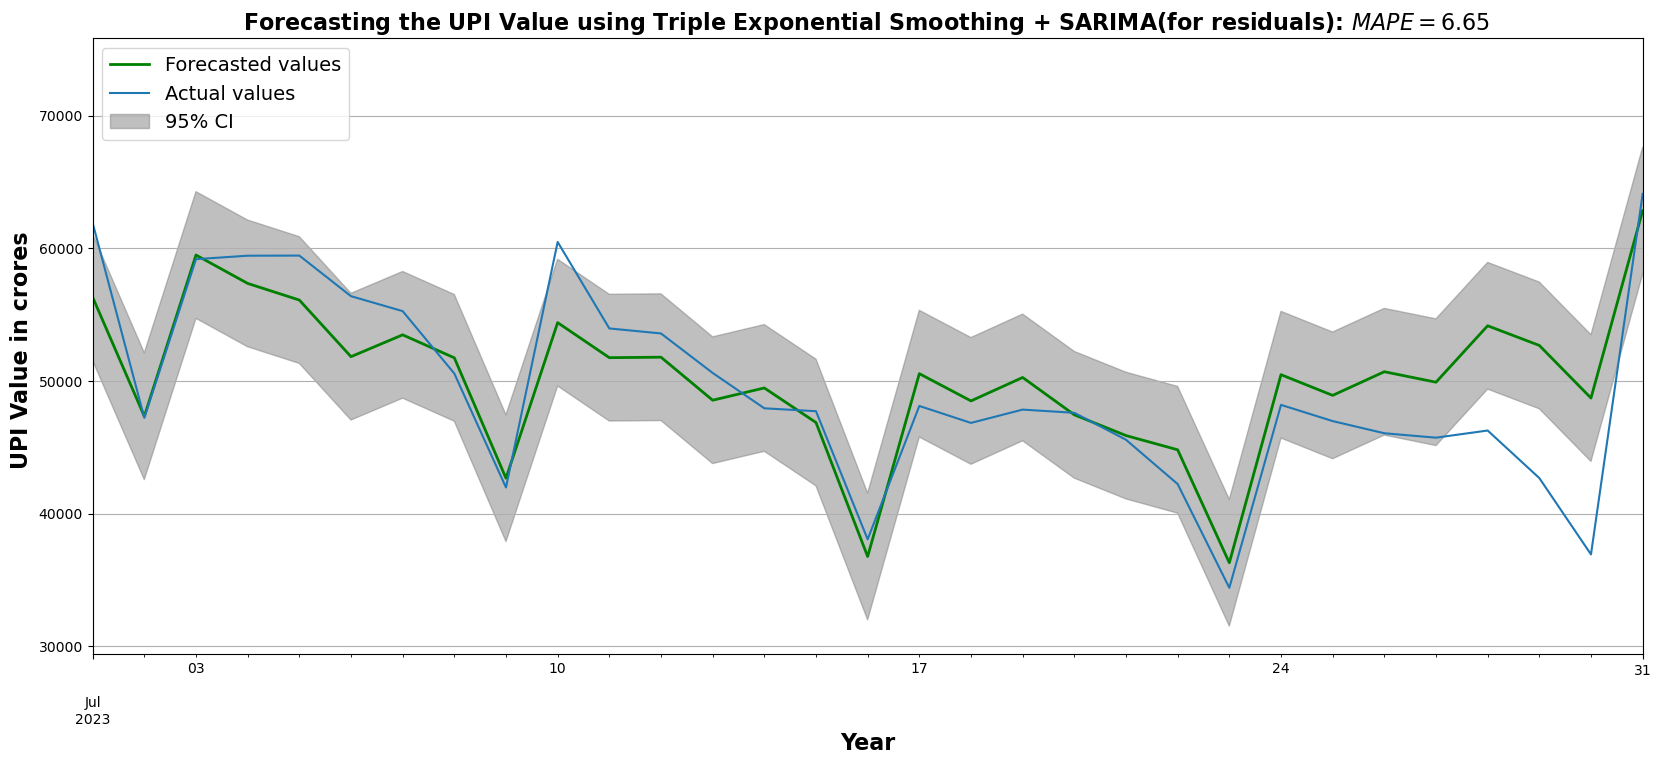

In [2014]:
## with ## Confidence Interval
## Visulaization
fig,ax= plt.subplots(figsize=(20,8))
#df_final['Val'].plot(kind='line',ax =ax,linewidth = 2,color = 'orange')
## 
df_forecast['Fianl_forecast_val'][:31].plot(kind='line',linewidth=2,ax=ax,color='green')
df_check['Val'][:31].plot(kind = 'line')
## margin of error
ci_plus = df_forecast['Fianl_forecast_val'].values + ME_fin
ci_minus = df_forecast['Fianl_forecast_val'].values - ME_fin
plt.fill_between(df_forecast.index,(ci_plus),(ci_minus),alpha = 0.5,color = 'gray')



plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel("UPI Value in crores ",fontsize=16,fontweight='bold')
plt.legend(['Forecasted values','Actual values','95% CI'],loc='upper left',fontsize=14)

plt.title("Forecasting the UPI Value using Triple Exponential Smoothing + SARIMA(for residuals): $ MAPE = 6.65 $ ",fontsize=16,fontweight='bold' )
plt.grid()
plt.show()

In [2019]:
s1 = np.sum(df_forecast['Fianl_forecast_val'][:39].values)
s2 = np.sum(df_check['Val'][:39].values)

In [2020]:
s1

2003753.8332017572

In [2021]:
s2

1993324.5600000003

In [2022]:
d = s1-s2
d

10429.273201756878

### Monthly forecasting

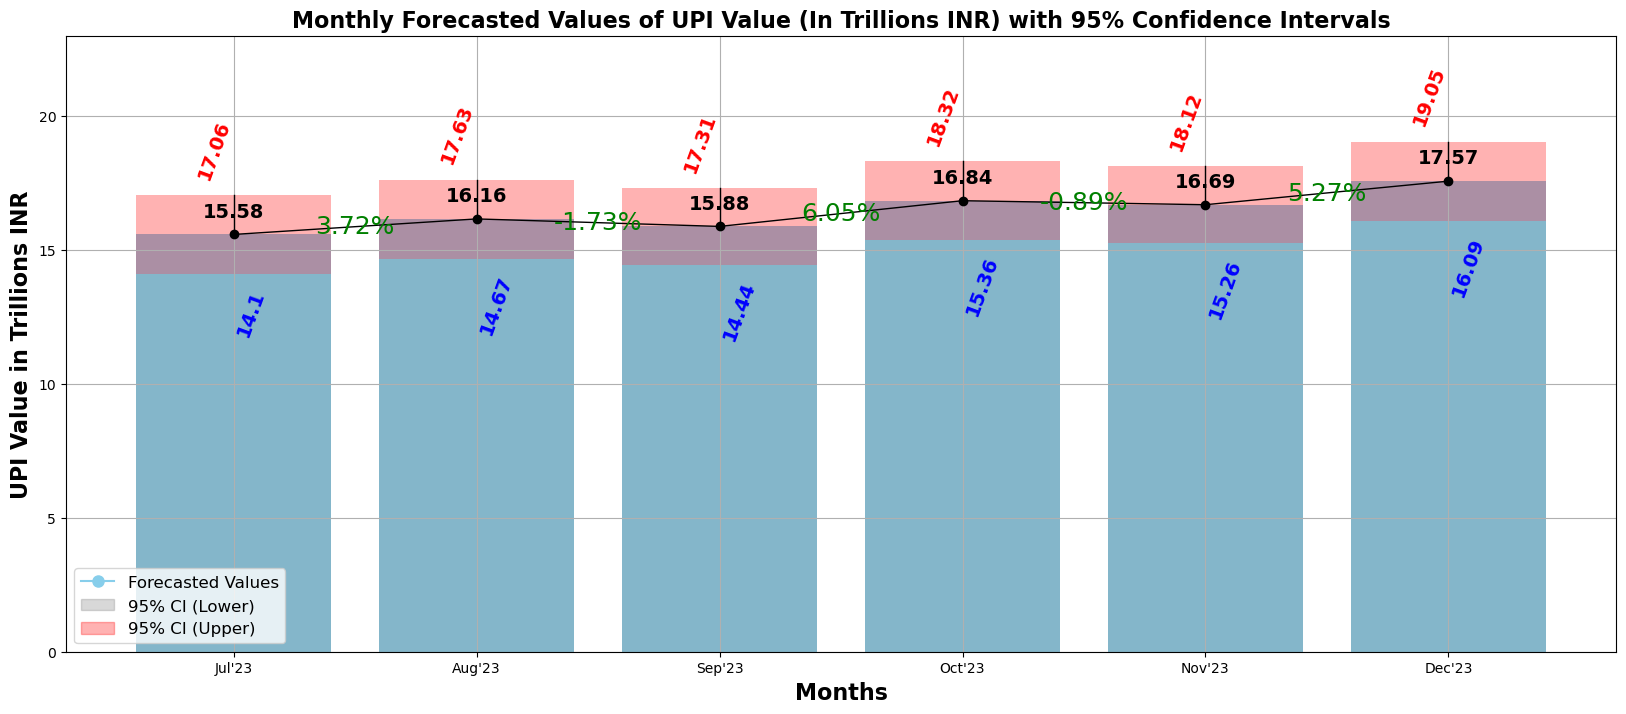

In [2118]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20, 8))

months = ["Jul'23" , "Aug'23", "Sep'23", "Oct'23", "Nov'23", "Dec'23"]
forecasted_values = [15.58, 16.16, 15.88, 16.84, 16.69, 17.57]
confidence_intervals = [(14.10, 17.06), (14.67, 17.63), (14.44, 17.31), (15.36, 18.32), (15.26, 18.12), (16.09, 19.05)]

lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

x = np.arange(len(months))

plt.bar(x, forecasted_values, color='skyblue', label='Forecasted Values')
plt.bar(x, lower_bounds, color='gray', alpha=0.3, label='95% CI (Lower)')
plt.bar(x, np.array(upper_bounds) - np.array(lower_bounds), bottom=lower_bounds, color='red', alpha=0.3, label='95% CI (Upper)')

for i in range(len(months)):
    plt.plot([x[i], x[i]], [forecasted_values[i], upper_bounds[i]], color='black', linestyle='-', linewidth=1)
    plt.text(x[i], forecasted_values[i] + 0.5, str(forecasted_values[i]), ha='center', rotation=0, va='bottom', fontweight='bold', color='black', fontsize=14)
    plt.text(x[i], lower_bounds[i] - 0.5, str(lower_bounds[i]), ha='left', rotation=70, va='top', fontweight='bold', color='blue', fontsize=14)
    plt.text(x[i], upper_bounds[i] + 0.5, str(upper_bounds[i]), ha='right', rotation=70, va='bottom', fontweight='bold',color='red', fontsize=14)

plt.plot(x, forecasted_values, marker='o', color='black', label='Percentage Change to Previous Month', linewidth=1)

percentage_labels = []
for i in range(1, len(forecasted_values)):
    percentage_increase = ((forecasted_values[i] - forecasted_values[i-1]) / forecasted_values[i-1]) * 100
    percentage_labels.append(round(percentage_increase, 2))

for i in range(1, len(months)):
    x_mid = (x[i-1] + x[i]) / 2
    y_mid = (forecasted_values[i-1] + forecasted_values[i]) / 2
    plt.text(x_mid, y_mid, f'{percentage_labels[i-1]}%', ha='center', va='center', color='green', fontsize=18)

# Create a custom legend with desired entries
custom_legend = plt.legend(handles=[plt.Line2D([0], [0], color='skyblue', marker='o', markersize=8, label='Forecasted Values'),
                                    plt.Rectangle((0,0),1,1, color='gray', alpha=0.3, label='95% CI (Lower)'),
                                    plt.Rectangle((0,0),1,1, color='red', alpha=0.3, label='95% CI (Upper)')],
                            loc='lower left', fontsize=12)

# Add text entries to the custom legend
custom_legend.get_texts()[0].set_text('Forecasted Values')
custom_legend.get_texts()[1].set_text('95% CI (Lower)')
custom_legend.get_texts()[2].set_text('95% CI (Upper)')

plt.xlabel('Months',fontsize=16, fontweight='bold')
plt.ylabel('UPI Value in Trillions INR',fontsize=16, fontweight='bold')
plt.title('Monthly Forecasted Values of UPI Value (In Trillions INR) with 95% Confidence Intervals', fontsize=16, fontweight='bold')
plt.xticks(x, months)
plt.ylim(0, 23)
plt.grid()

# Display the plot
plt.show()

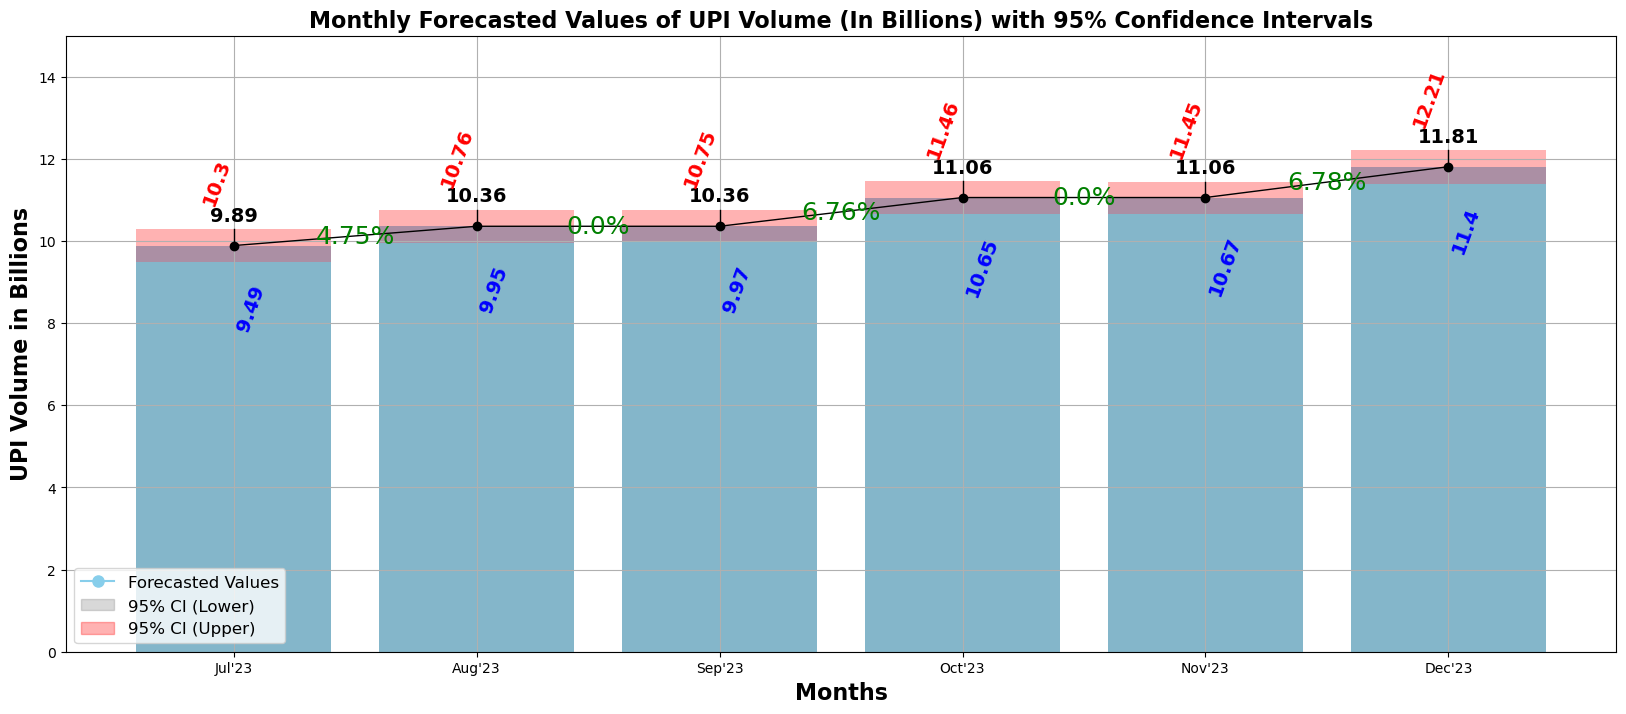

In [2119]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20, 8))

months = ["Jul'23" , "Aug'23", "Sep'23", "Oct'23", "Nov'23", "Dec'23"]
forecasted_values = [9.89,  10.36, 10.36, 11.06,11.06,11.81]
confidence_intervals = [(9.49, 10.30), (9.95, 10.76), (9.97, 10.75), (10.65, 11.46), (10.67, 11.45), (11.40, 12.21)]

lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

x = np.arange(len(months))

plt.bar(x, forecasted_values, color='skyblue', label='Forecasted Values')
plt.bar(x, lower_bounds, color='gray', alpha=0.3, label='95% CI (Lower)')
plt.bar(x, np.array(upper_bounds) - np.array(lower_bounds), bottom=lower_bounds, color='red', alpha=0.3, label='95% CI (Upper)')

for i in range(len(months)):
    plt.plot([x[i], x[i]], [forecasted_values[i], upper_bounds[i]], color='black', linestyle='-', linewidth=1)
    plt.text(x[i], forecasted_values[i] + 0.5, str(forecasted_values[i]), ha='center', rotation=0, va='bottom', fontweight='bold', color='black', fontsize=14)
    plt.text(x[i], lower_bounds[i] - 0.5, str(lower_bounds[i]), ha='left', rotation=70, va='top', fontweight='bold', color='blue', fontsize=14)
    plt.text(x[i], upper_bounds[i] + 0.5, str(upper_bounds[i]), ha='right', rotation=70, va='bottom', fontweight='bold',color='red', fontsize=14)

plt.plot(x, forecasted_values, marker='o', color='black', label='Percentage Change to Previous Month', linewidth=1)

percentage_labels = []
for i in range(1, len(forecasted_values)):
    percentage_increase = ((forecasted_values[i] - forecasted_values[i-1]) / forecasted_values[i-1]) * 100
    percentage_labels.append(round(percentage_increase, 2))

for i in range(1, len(months)):
    x_mid = (x[i-1] + x[i]) / 2
    y_mid = (forecasted_values[i-1] + forecasted_values[i]) / 2
    plt.text(x_mid, y_mid, f'{percentage_labels[i-1]}%', ha='center', va='center', color='green', fontsize=18)

# Create a custom legend with desired entries
custom_legend = plt.legend(handles=[plt.Line2D([0], [0], color='skyblue', marker='o', markersize=8, label='Forecasted Values'),
                                    plt.Rectangle((0,0),1,1, color='gray', alpha=0.3, label='95% CI (Lower)'),
                                    plt.Rectangle((0,0),1,1, color='red', alpha=0.3, label='95% CI (Upper)')],
                            loc='lower left', fontsize=12)

# Add text entries to the custom legend
custom_legend.get_texts()[0].set_text('Forecasted Values')
custom_legend.get_texts()[1].set_text('95% CI (Lower)')
custom_legend.get_texts()[2].set_text('95% CI (Upper)')

plt.xlabel('Months',fontsize=16, fontweight='bold')
plt.ylabel('UPI Volume in Billions',fontsize=16, fontweight='bold')
plt.title('Monthly Forecasted Values of UPI Volume (In Billions) with 95% Confidence Intervals', fontsize=16, fontweight='bold')
plt.xticks(x, months)
plt.ylim(0, 15)
plt.grid()

# Display the plot
plt.show()

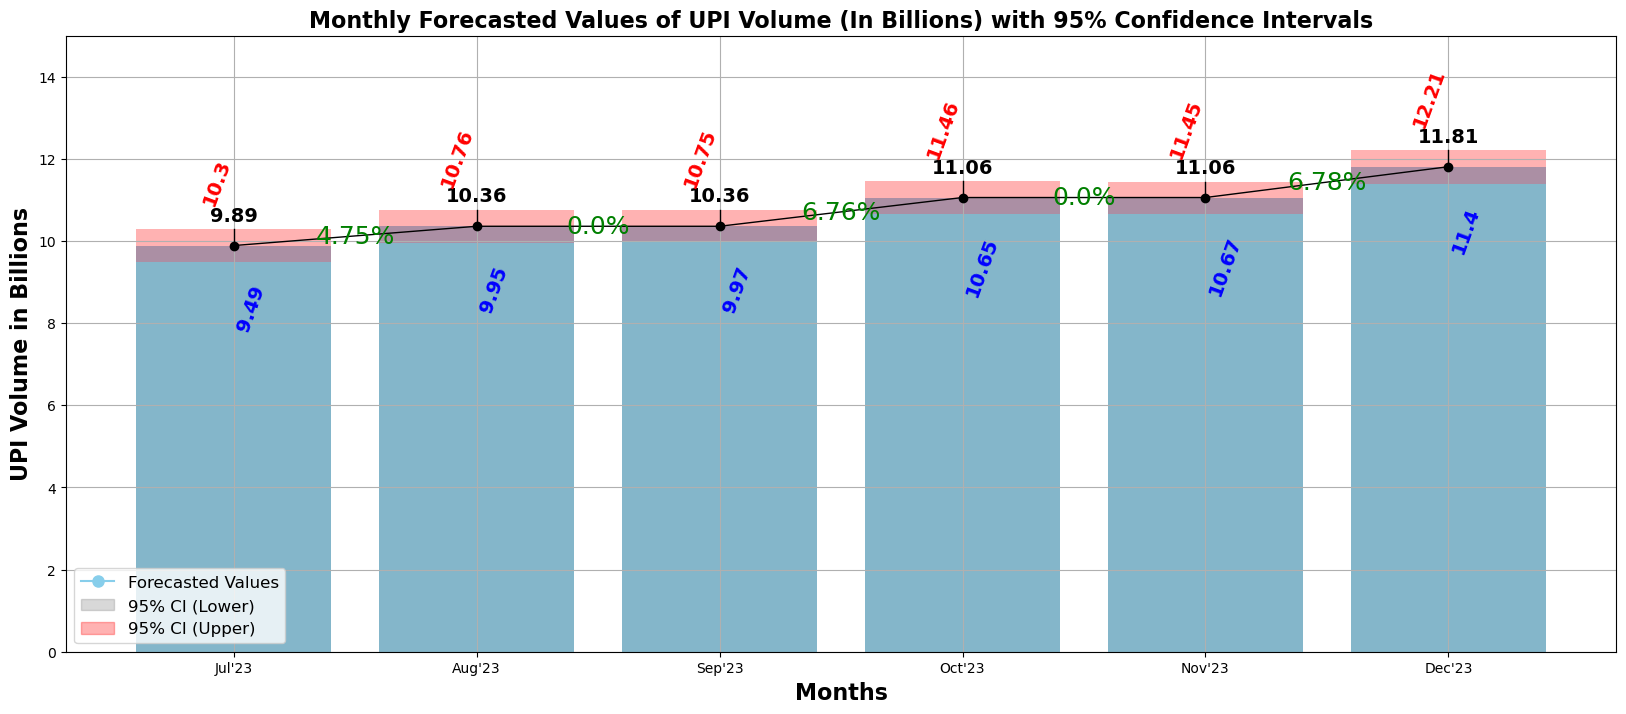

In [2120]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20, 8))

months = ["Jul'23" , "Aug'23", "Sep'23", "Oct'23", "Nov'23", "Dec'23"]
forecasted_values = [9.89,  10.36, 10.36, 11.06,11.06,11.81]
confidence_intervals = [(9.49, 10.30), (9.95, 10.76), (9.97, 10.75), (10.65, 11.46), (10.67, 11.45), (11.40, 12.21)]

lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

x = np.arange(len(months))

plt.bar(x, forecasted_values, color='skyblue', label='Forecasted Values')
plt.bar(x, lower_bounds, color='gray', alpha=0.3, label='95% CI (Lower)')
plt.bar(x, np.array(upper_bounds) - np.array(lower_bounds), bottom=lower_bounds, color='red', alpha=0.3, label='95% CI (Upper)')

for i in range(len(months)):
    plt.plot([x[i], x[i]], [forecasted_values[i], upper_bounds[i]], color='black', linestyle='-', linewidth=1)
    plt.text(x[i], forecasted_values[i] + 0.5, str(forecasted_values[i]), ha='center', rotation=0, va='bottom', fontweight='bold', color='black', fontsize=14)
    plt.text(x[i], lower_bounds[i] - 0.5, str(lower_bounds[i]), ha='left', rotation=70, va='top', fontweight='bold', color='blue', fontsize=14)
    plt.text(x[i], upper_bounds[i] + 0.5, str(upper_bounds[i]), ha='right', rotation=70, va='bottom', fontweight='bold',color='red', fontsize=14)

plt.plot(x, forecasted_values, marker='o', color='black', label='Percentage Change to Previous Month', linewidth=1)

percentage_labels = []
for i in range(1, len(forecasted_values)):
    percentage_increase = ((forecasted_values[i] - forecasted_values[i-1]) / forecasted_values[i-1]) * 100
    percentage_labels.append(round(percentage_increase, 2))

for i in range(1, len(months)):
    x_mid = (x[i-1] + x[i]) / 2
    y_mid = (forecasted_values[i-1] + forecasted_values[i]) / 2
    plt.text(x_mid, y_mid, f'{percentage_labels[i-1]}%', ha='center', va='center', color='green', fontsize=18)

# Create a custom legend with desired entries
custom_legend = plt.legend(handles=[plt.Line2D([0], [0], color='skyblue', marker='o', markersize=8, label='Forecasted Values'),
                                    plt.Rectangle((0,0),1,1, color='gray', alpha=0.3, label='95% CI (Lower)'),
                                    plt.Rectangle((0,0),1,1, color='red', alpha=0.3, label='95% CI (Upper)')],
                            loc='lower left', fontsize=12)

# Add text entries to the custom legend
custom_legend.get_texts()[0].set_text('Forecasted Values')
custom_legend.get_texts()[1].set_text('95% CI (Lower)')
custom_legend.get_texts()[2].set_text('95% CI (Upper)')

plt.xlabel('Months',fontsize=16, fontweight='bold')
plt.ylabel('UPI Volume in Billions',fontsize=16, fontweight='bold')
plt.title('Monthly Forecasted Values of UPI Volume (In Billions) with 95% Confidence Intervals', fontsize=16, fontweight='bold')
plt.xticks(x, months)
plt.ylim(0, 15)
plt.grid()

# Display the plot
plt.show()

### Rate

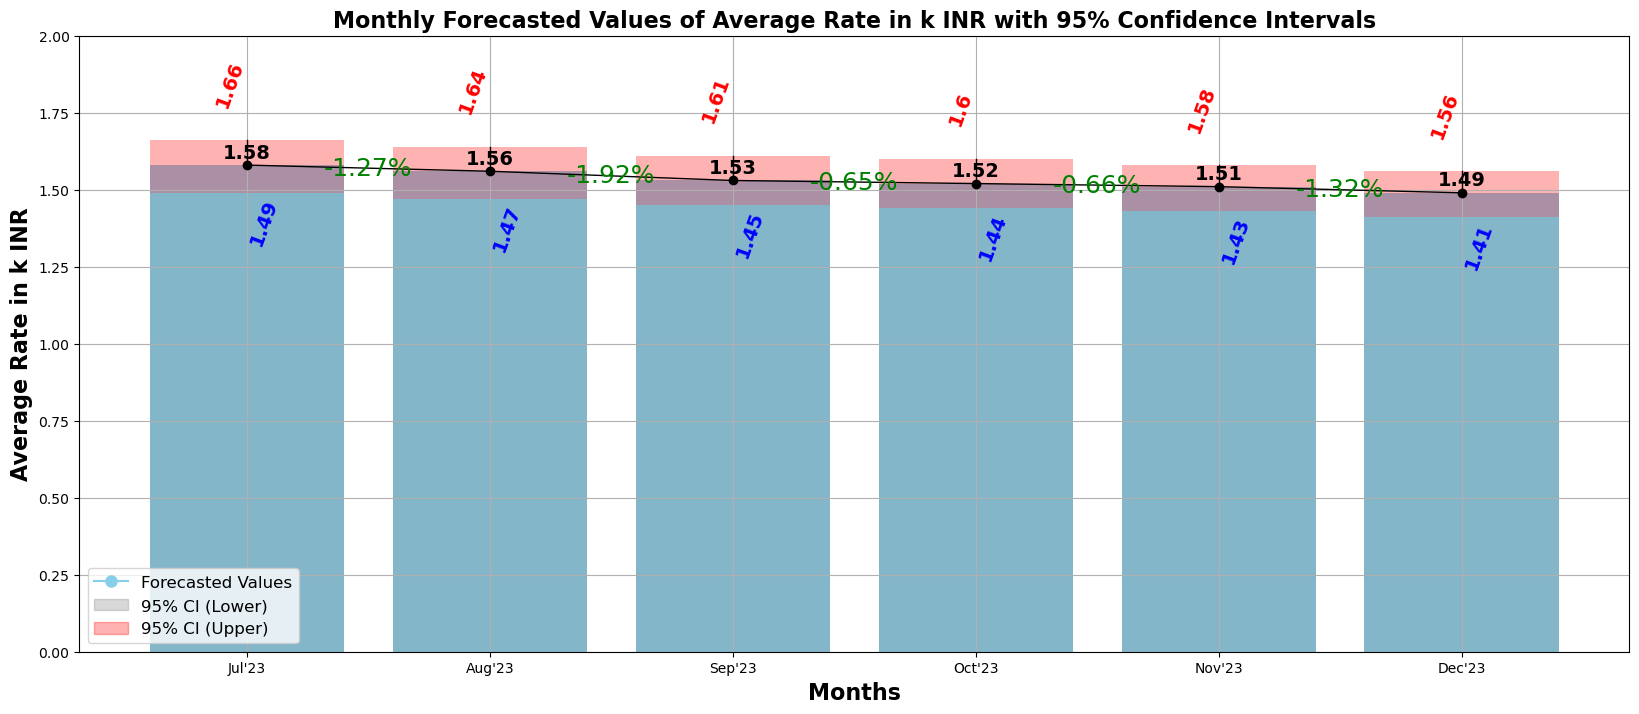

In [2034]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20, 8))

months = ["Jul'23" , "Aug'23", "Sep'23", "Oct'23", "Nov'23", "Dec'23"]
forecasted_values = [1.58,  1.56, 1.53, 1.52,1.51,1.49]
confidence_intervals = [(1.49, 1.66), (1.47, 1.64), (1.45, 1.61), (1.44, 1.60), (1.43, 1.58), (1.41, 1.56)]

lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

x = np.arange(len(months))

plt.bar(x, forecasted_values, color='skyblue', label='Forecasted Values')
plt.bar(x, lower_bounds, color='gray', alpha=0.3, label='95% CI (Lower)')
plt.bar(x, np.array(upper_bounds) - np.array(lower_bounds), bottom=lower_bounds, color='red', alpha=0.3, label='95% CI (Upper)')

for i in range(len(months)):
    plt.plot([x[i], x[i]], [forecasted_values[i], upper_bounds[i]], color='black', linestyle='-', linewidth=1)
    plt.text(x[i], forecasted_values[i] + 0.01, str(forecasted_values[i]), ha='center', rotation=0, va='bottom', fontweight='bold', color='black', fontsize=14)
    plt.text(x[i], lower_bounds[i] - 0.01, str(lower_bounds[i]), ha='left', rotation=70, va='top', fontweight='bold', color='blue', fontsize=14)
    plt.text(x[i], upper_bounds[i] + 0.1, str(upper_bounds[i]), ha='right', rotation=70, va='bottom', fontweight='bold',color='red', fontsize=14)

plt.plot(x, forecasted_values, marker='o', color='black', label='Percentage Change to Previous Month', linewidth=1)

percentage_labels = []
for i in range(1, len(forecasted_values)):
    percentage_increase = ((forecasted_values[i] - forecasted_values[i-1]) / forecasted_values[i-1]) * 100
    percentage_labels.append(round(percentage_increase, 2))

for i in range(1, len(months)):
    x_mid = (x[i-1] + x[i]) / 2
    y_mid = (forecasted_values[i-1] + forecasted_values[i]) / 2
    plt.text(x_mid, y_mid, f'{percentage_labels[i-1]}%', ha='center', va='center', color='green', fontsize=18)

# Create a custom legend with desired entries
custom_legend = plt.legend(handles=[plt.Line2D([0], [0], color='skyblue', marker='o', markersize=8, label='Forecasted Values'),
                                    plt.Rectangle((0,0),1,1, color='gray', alpha=0.3, label='95% CI (Lower)'),
                                    plt.Rectangle((0,0),1,1, color='red', alpha=0.3, label='95% CI (Upper)')],
                            loc='lower left', fontsize=12)

# Add text entries to the custom legend
custom_legend.get_texts()[0].set_text('Forecasted Values')
custom_legend.get_texts()[1].set_text('95% CI (Lower)')
custom_legend.get_texts()[2].set_text('95% CI (Upper)')

plt.xlabel('Months',fontsize=16, fontweight='bold')
plt.ylabel('Average Rate in k INR',fontsize=16, fontweight='bold')
plt.title('Monthly Forecasted Values of Average Rate in k INR with 95% Confidence Intervals', fontsize=16, fontweight='bold')
plt.xticks(x, months)
plt.ylim(0, 2)
plt.grid()

# Display the plot
plt.show()

### Line Chart Plot

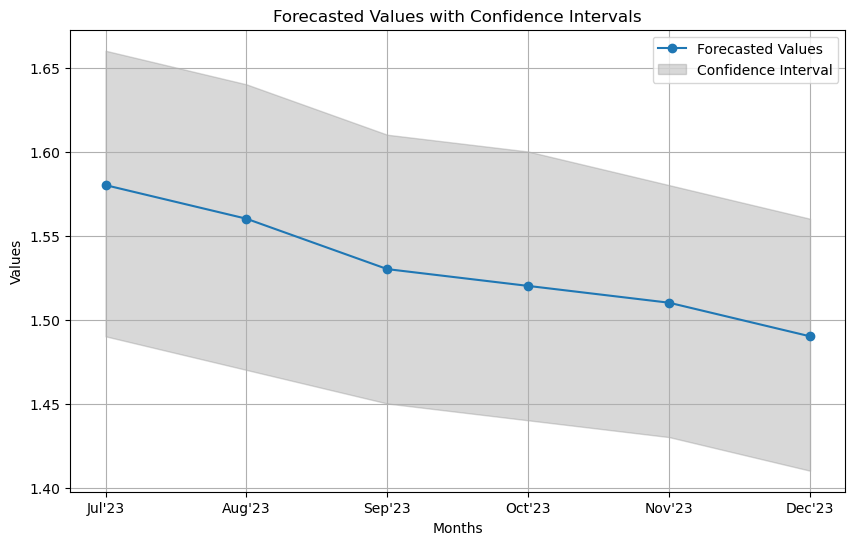

In [2035]:
import matplotlib.pyplot as plt

months = ["Jul'23", "Aug'23", "Sep'23", "Oct'23", "Nov'23", "Dec'23"]
forecasted_values = [1.58, 1.56, 1.53, 1.52, 1.51, 1.49]
confidence_intervals = [(1.49, 1.66), (1.47, 1.64), (1.45, 1.61), (1.44, 1.60), (1.43, 1.58), (1.41, 1.56)]

# Extract lower and upper bounds of confidence intervals
lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

# Create the line chart with shaded confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(months, forecasted_values, marker='o', label='Forecasted Values')
plt.fill_between(months, lower_bounds, upper_bounds, color='gray', alpha=0.3, label='Confidence Interval')
plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Forecasted Values with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

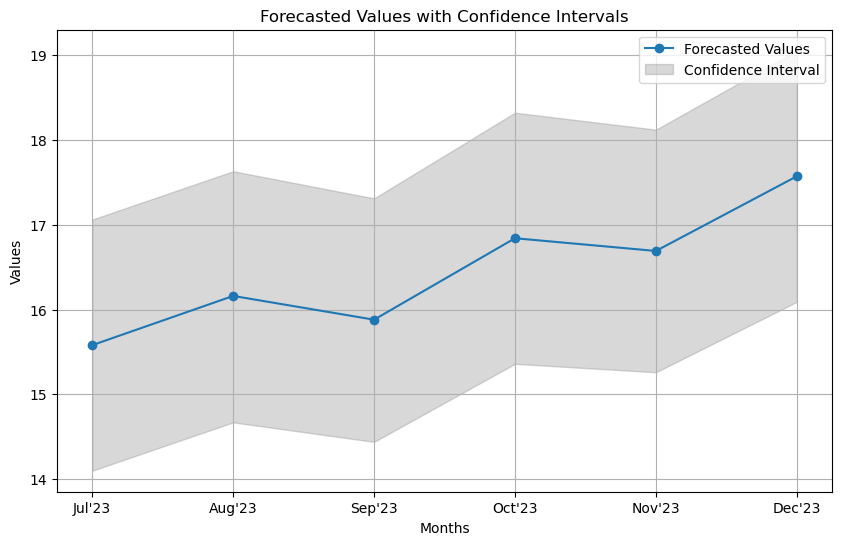

In [2037]:
import matplotlib.pyplot as plt

months = ["Jul'23" , "Aug'23", "Sep'23", "Oct'23", "Nov'23", "Dec'23"]
forecasted_values = [15.58, 16.16, 15.88, 16.84, 16.69, 17.57]
confidence_intervals = [(14.10, 17.06), (14.67, 17.63), (14.44, 17.31), (15.36, 18.32), (15.26, 18.12), (16.09, 19.05)]


# Extract lower and upper bounds of confidence intervals
lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

# Create the line chart with shaded confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(months, forecasted_values, marker='o', label='Forecasted Values')
plt.fill_between(months, lower_bounds, upper_bounds, color='gray', alpha=0.3, label='Confidence Interval')
plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Forecasted Values with Confidence Intervals')
plt.ylim
plt.legend()
plt.grid(True)
plt.show()

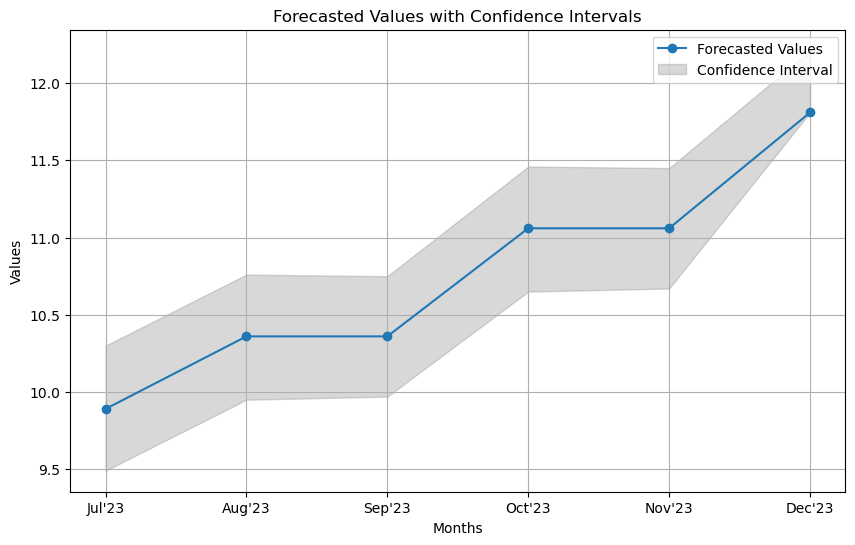

In [2036]:
import matplotlib.pyplot as plt

months = ["Jul'23" , "Aug'23", "Sep'23", "Oct'23", "Nov'23", "Dec'23"]
forecasted_values = [9.89,  10.36, 10.36, 11.06,11.06,11.81]
confidence_intervals = [(9.49, 10.30), (9.95, 10.76), (9.97, 10.75), (10.65, 11.46), (10.67, 11.45), (11.40, 12.21)]
# Extract lower and upper bounds of confidence intervals
lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

# Create the line chart with shaded confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(months, forecasted_values, marker='o', label='Forecasted Values')
plt.fill_between(months, lower_bounds, upper_bounds, color='gray', alpha=0.3, label='Confidence Interval')
plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Forecasted Values with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

In [2101]:
### 


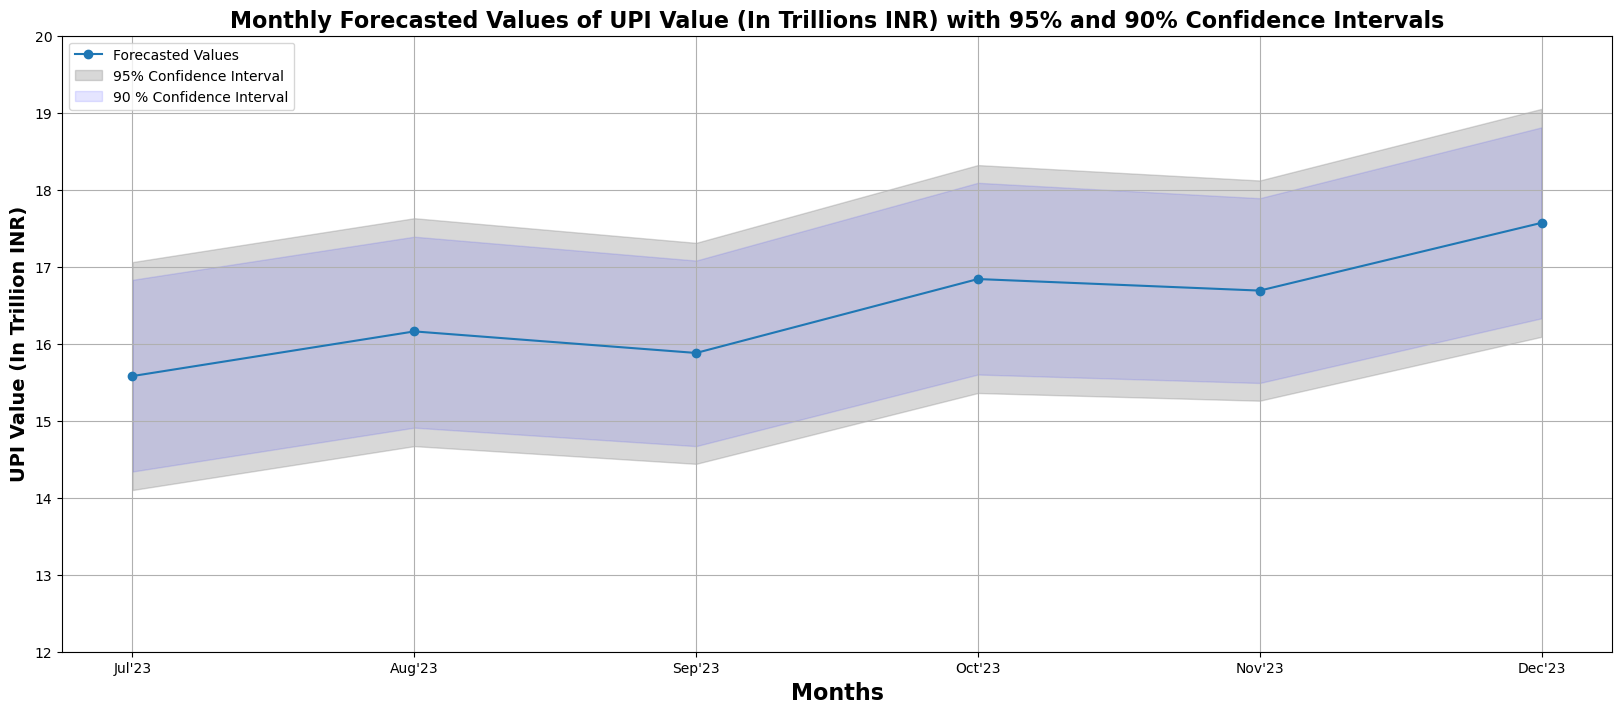

In [2128]:
import matplotlib.pyplot as plt

months = ["Jul'23" , "Aug'23", "Sep'23", "Oct'23", "Nov'23", "Dec'23"]
forecasted_values = [15.58, 16.16, 15.88, 16.84, 16.69, 17.57]
confidence_intervals_set1 = [(14.10, 17.06), (14.67, 17.63), (14.44, 17.31), (15.36, 18.32), (15.26, 18.12), (16.09, 19.05)]
confidence_intervals_set2 = [(14.34, 16.83), (14.91, 17.39), (14.67, 17.08), (15.60, 18.09), (15.49, 17.89), (16.33, 18.81)]

# Extract lower and upper bounds of confidence intervals
lower_bounds_set1 = [ci[0] for ci in confidence_intervals_set1]
upper_bounds_set1 = [ci[1] for ci in confidence_intervals_set1]

lower_bounds_set2 = [ci[0] for ci in confidence_intervals_set2]
upper_bounds_set2 = [ci[1] for ci in confidence_intervals_set2]

# Create the line chart with multiple shaded confidence intervals
plt.figure(figsize=(20, 8))
plt.plot(months, forecasted_values, marker='o', label='Forecasted Values')
plt.fill_between(months, lower_bounds_set1, upper_bounds_set1, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.fill_between(months, lower_bounds_set2, upper_bounds_set2, color='blue', alpha=0.1, label='90 % Confidence Interval')
plt.xlabel('Months',fontsize=16, fontweight='bold')
plt.ylabel('UPI Value (In Trillion INR)',fontsize=14, fontweight='bold')
plt.title('Monthly Forecasted Values of UPI Value (In Trillions INR) with 95% and 90% Confidence Intervals', fontsize=16, fontweight='bold')
plt.ylim(12,20)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

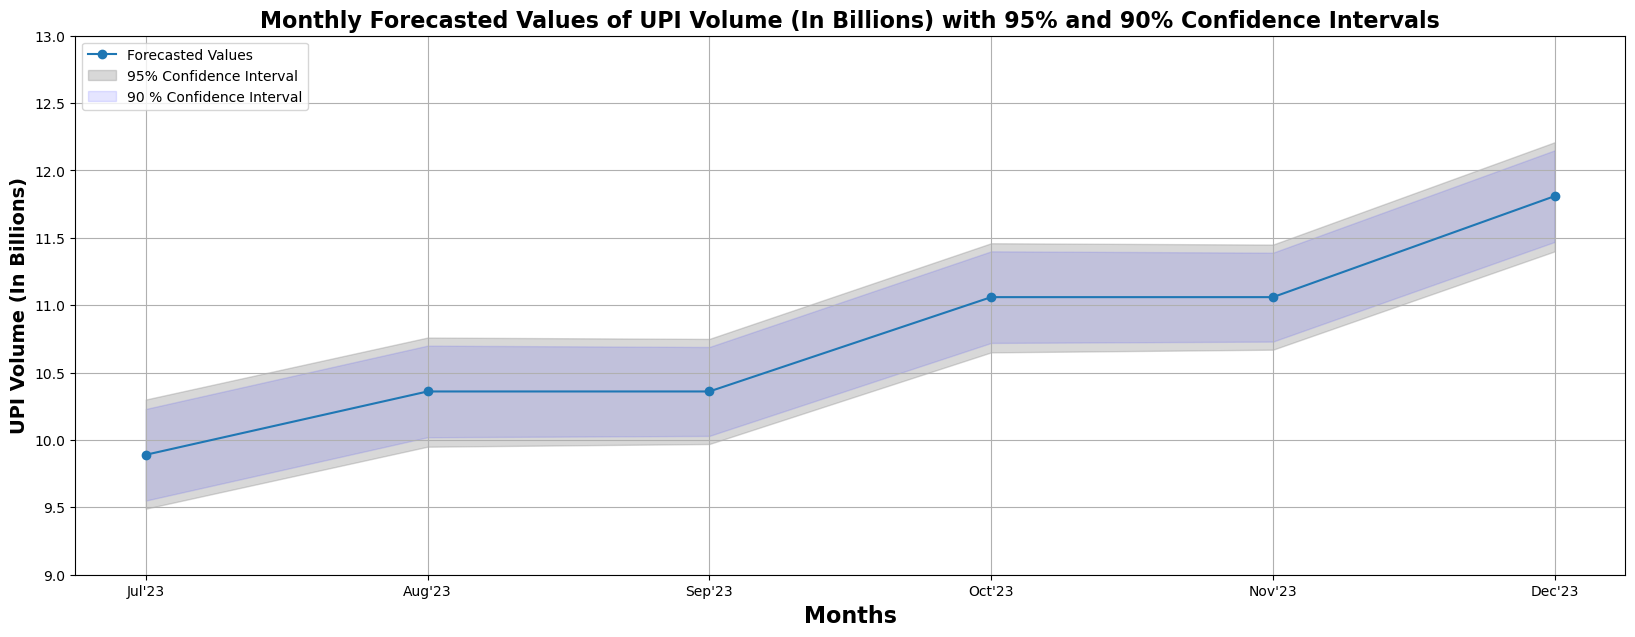

In [2125]:
import matplotlib.pyplot as plt

months = ["Jul'23" , "Aug'23", "Sep'23", "Oct'23", "Nov'23", "Dec'23"]
forecasted_values = [9.89,  10.36, 10.36, 11.06,11.06,11.81]
confidence_intervals_set1 = [(9.49, 10.30), (9.95, 10.76), (9.97, 10.75), (10.65, 11.46), (10.67, 11.45), (11.40, 12.21)]
confidence_intervals_set2 = [(9.55,10.23 ), (10.02,10.70 ), (10.03, 10.69), (10.72, 11.40), (10.73, 11.39), (11.47, 12.15)]

# Extract lower and upper bounds of confidence intervals
lower_bounds_set1 = [ci[0] for ci in confidence_intervals_set1]
upper_bounds_set1 = [ci[1] for ci in confidence_intervals_set1]

lower_bounds_set2 = [ci[0] for ci in confidence_intervals_set2]
upper_bounds_set2 = [ci[1] for ci in confidence_intervals_set2]

# Create the line chart with multiple shaded confidence intervals
plt.figure(figsize=(20, 7))
plt.plot(months, forecasted_values, marker='o', label='Forecasted Values')
plt.fill_between(months, lower_bounds_set1, upper_bounds_set1, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.fill_between(months, lower_bounds_set2, upper_bounds_set2, color='blue', alpha=0.1, label='90 % Confidence Interval')
plt.xlabel('Months',fontsize=16, fontweight='bold')
plt.ylabel('UPI Volume (In Billions)',fontsize=14, fontweight='bold')
plt.title('Monthly Forecasted Values of UPI Volume (In Billions) with 95% and 90% Confidence Intervals', fontsize=16, fontweight='bold')
plt.ylim(9,13)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

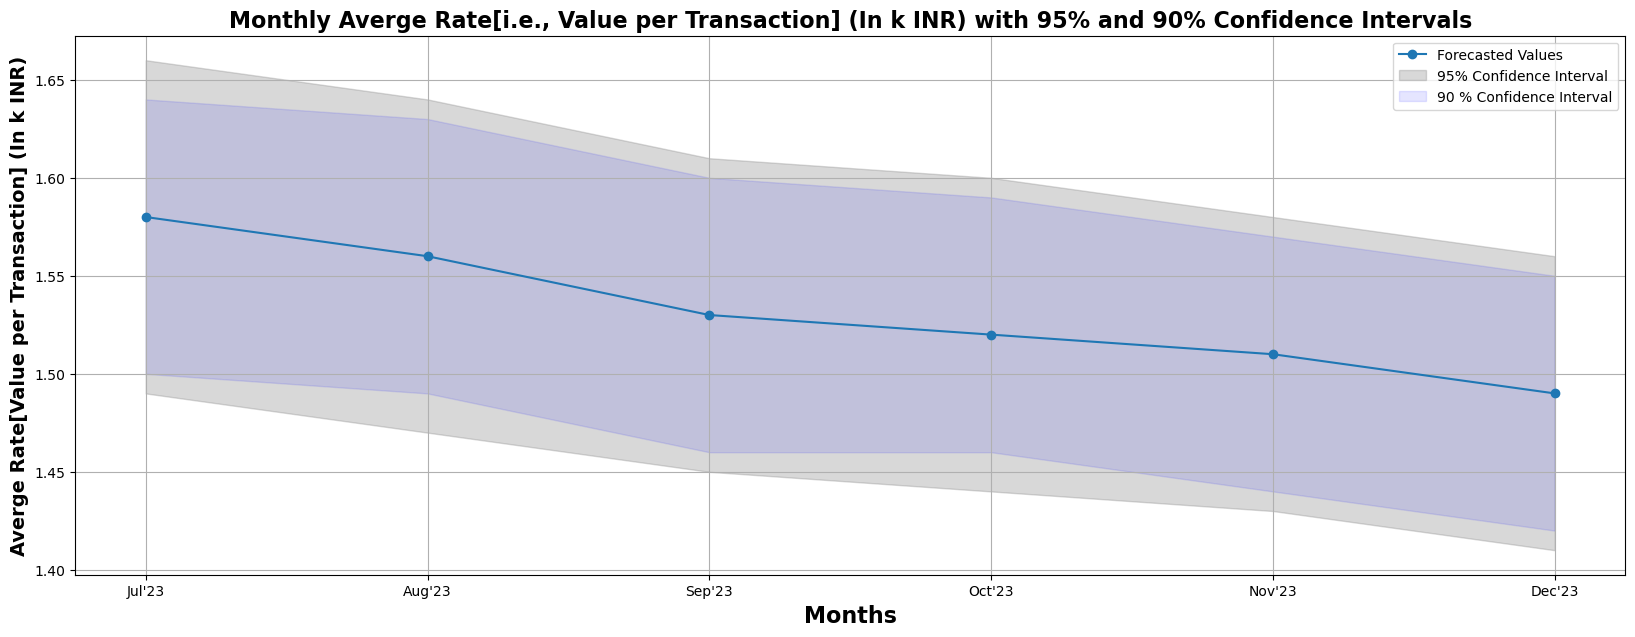

In [2133]:
import matplotlib.pyplot as plt

months = ["Jul'23", "Aug'23", "Sep'23", "Oct'23", "Nov'23", "Dec'23"]
forecasted_values = [1.58, 1.56, 1.53, 1.52, 1.51, 1.49]
confidence_intervals_set1 = [(1.49, 1.66), (1.47, 1.64), (1.45, 1.61), (1.44, 1.60), (1.43, 1.58), (1.41, 1.56)]

confidence_intervals_set2 = [(1.50,1.64 ), (1.49,1.63 ), (1.46, 1.60), (1.46, 1.59), (1.44, 1.57), (1.42, 1.55)]

# Extract lower and upper bounds of confidence intervals
lower_bounds_set1 = [ci[0] for ci in confidence_intervals_set1]
upper_bounds_set1 = [ci[1] for ci in confidence_intervals_set1]

lower_bounds_set2 = [ci[0] for ci in confidence_intervals_set2]
upper_bounds_set2 = [ci[1] for ci in confidence_intervals_set2]

# Create the line chart with multiple shaded confidence intervals
plt.figure(figsize=(20, 7))
plt.plot(months, forecasted_values, marker='o', label='Forecasted Values')
plt.fill_between(months, lower_bounds_set1, upper_bounds_set1, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.fill_between(months, lower_bounds_set2, upper_bounds_set2, color='blue', alpha=0.1, label='90 % Confidence Interval')
plt.xlabel('Months',fontsize=16, fontweight='bold')
plt.ylabel('Averge Rate[Value per Transaction] (In k INR)',fontsize=14, fontweight='bold')
plt.title('Monthly Averge Rate[i.e., Value per Transaction] (In k INR) with 95% and 90% Confidence Intervals', fontsize=16, fontweight='bold')
#plt.ylim(9,13)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()